In [1493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [176]:
def norm(x):
    return (x ** 2).sum() ** 0.5

In [360]:
# X - d x n
# y - 1 x n
# th - d x 1

def loss(X, y, th):
    return ((th.T.dot(X) - y) ** 2).mean()

In [359]:
# X - d x n
# y - 1 x n
# th - d x 1

def d_loss(X, y, th):
    n = X.shape[1]
    return 2 / n * X.dot((th.T.dot(X) - y).T)

In [1180]:
# X - d x n
# y - 1 x n
# th - d x 1

def batch_sgd(X, y, f, df, th0, lam, b_size, epochs):
    fs = [f(X, y, th0)]
    ths = [th0]
    d = X.shape[0]
    n = X.shape[1]
    
    data = np.vstack([X, y])
    
    iters = range(1, n//b_size)
    
    for _ in range(epochs):
        np.random.shuffle(data.T)
        for i in iters:
            X_b = data[:-1, (i-1) * b_size:i*b_size]
            y_b = data[-1:, (i-1) * b_size:i*b_size]
            th = ths[-1] - lam * df(X_b, y_b, ths[-1])
            fs.append(f(X, y, th))
            ths.append(th)
            if norm(ths[-1] - ths[-2]) < 0.000001:
                break
    return fs, ths

In [2844]:
data = pd.read_csv('train.csv')
data.drop(['index'], axis=1, inplace=True)

In [635]:
scaler = StandardScaler()

data = scaler.fit_transform(data)

In [2846]:
y = np.array(data)[:, -1].reshape(1, data.shape[0])

In [2847]:
X = np.vstack([np.array(data)[:, :-1].T, np.ones(data.shape[0])])

In [1334]:
th0 = np.random.uniform(-1, 1, X.shape[0]).reshape(X.shape[0], 1)

In [2848]:
th0 = np.zeros(X.shape[0]).reshape(X.shape[0], 1)

In [3031]:
# X - d x n
# y - 1 x n
# th - d x 1

def batch_sgd_1(X, y, f, df, th0, lam, b_size, epochs):
    fs = [f(X, y, th0)]
    ths = [th0]
    th = th0.copy()
    d = X.shape[0]
    n = X.shape[1]
    
    iters = np.array(range(n//b_size))
    
    for _ in range(epochs):
        np.random.shuffle(iters)
        for i in iters:
            X_b = X[:, i * b_size:(i+1)*b_size]
            y_b = y[:, i * b_size:(i+1)*b_size]
            th -= lam * df(X_b, y_b, th)
        fs.append(f(X, y, th))
        ths.append(th)
        print(fs[-1])
    return fs, ths

In [3373]:
fs, ths = batch_sgd_1(X, y, loss, d_loss, ths[-8], 0.0128, 128, 128000)

24.39629462732372
24.009167930251074
25.74670136942197
24.298127281282124
24.15939285643662
23.932143868213306
23.91553911178704
25.37839415218617
25.19125438521439
24.125512417101806
24.295256416181946
26.882639353315724
23.926354774944816
25.853144981703753
23.905254932903905
26.659449002386484
23.93916452958997
25.782076379247215
24.155424280965413
25.41930659915536
24.12832482418101
27.432946928926146
26.039958112667083
23.94960957602144
23.975095656312654
24.226068087697005
24.091657476572205
24.54255565444269
24.0635181483559
26.435186580302858
23.91416618353326
23.918279674501953
23.92207523943101
25.364318913675888
24.018634684093495
24.493290927546344
32.56194932864767
24.01891344469384
24.243643091251194
24.042962667080424
26.752117349737155
23.952495415124158
24.023382895967522
24.200233693532223
24.19957835570117
24.918973077809184
24.06450437075831
24.214615099062353
24.102119244013338
24.008347638576254
24.938616502110552
23.97318102747839
25.444543429604543
28.0769310008

25.66157548151102
26.338202255521953
23.97143758369645
24.008926174079797
23.971183850920543
27.31629640351264
24.251531534495264
23.924762141577965
24.860932151220958
23.902336803567806
23.94159546340912
24.2342074252965
24.225207035813902
25.868288702696997
24.504838761707244
24.281273687154133
23.90310891987782
24.29354619210594
23.91778237064782
27.73191765950042
23.928675222022118
25.056440539886676
28.757492977560645
24.86444825487607
28.909708063220126
24.19521699212681
24.10743417560314
24.246710978499987
24.485346551473324
24.071546103198877
24.038337879308568
25.531680262829944
25.590608817994394
25.658639126602857
24.147904467765947
24.475829688057708
23.899006133039155
24.595477081225766
24.295259039517745
24.870952308119904
23.931426307088724
23.925793990273995
23.98150451491044
26.866490101465736
25.984393054132052
23.903471794316605
24.138024724397695
24.457222172259275
24.201041793884713
25.01421017774012
27.29657467103738
25.38723247223103
24.214362254497953
23.9321781

38.7719146388884
25.401659046330288
24.097863237620306
23.972582791859143
23.971026550825652
23.901794858414963
24.059357875408722
24.274631319612368
25.197736193318715
24.115729179666136
24.436003293397448
25.814966274448167
29.63761740252695
25.632416033663716
25.482837905469314
23.94399088332615
24.827737391793143
25.434965421119593
26.920395920795077
24.039255970944254
24.501393643722125
25.155565148917354
23.923604321510066
27.26149214893567
24.259480031840685
24.140428975100804
24.16550925460267
24.623474972973455
23.99149539729254
24.457516021481894
31.8764362766353
28.73033725593502
23.967603828086542
23.970307879338176
23.99441957103719
24.022901630511658
23.931500688899323
24.19998850192584
26.62020635203129
24.02639267738473
23.909362259496458
24.864933449390435
23.943220509854402
24.212825471720375
25.093031652012016
24.81026724762139
23.968289420830494
29.487067139071247
23.907077608150075
24.135844853245572
24.799609089833137
27.071633506193677
24.12196298972837
24.510127

24.021996623755683
23.92225975789072
24.55562067424091
23.954724816889208
24.59621141661114
24.14767730319733
23.921969270409274
27.653017379442918
23.90994746243352
25.07239192924229
24.078512471952838
24.03127523928495
24.279046355807786
23.97129016966814
25.86615540997496
23.896861341757955
23.920903757808404
25.569804105324312
24.251480879287342
25.26749212911578
23.902894559818016
23.94928601649672
24.401631947275874
26.831058940562688
24.01749600440886
24.963916529466566
23.91559362395673
24.605727861304878
24.586674931549336
23.91824074630099
24.03419717504338
25.4655829011857
24.163600566990535
24.043441811332922
24.07065853934029
26.491977099983938
23.956825374738187
25.533092320541893
24.181174775884422
29.682191937626058
23.93645278254053
24.135262897320047
26.046987858521067
24.241392057819127
25.822445829990997
25.314976258056923
23.884449466710397
26.563435066271254
26.416950367525235
25.063754745003273
23.947694535504194
24.391396071650565
26.106906973336017
26.101138330

25.824870448839405
27.307965362344245
24.04170359413319
27.054988458806143
24.95531472292676
25.530233943587874
24.58821622332159
23.99082198684301
23.91831775346471
24.029454343135544
23.912367924624462
23.989800532331596
24.85399936375367
24.1810187864099
23.89139278064012
24.103022947520618
25.840119705626687
24.01228573572732
24.344239647505297
25.593572922817007
24.475673413403598
24.17596378068543
25.703107245610358
27.334942869304466
26.083751341291542
24.072183741020744
30.018801700627115
25.53441163842514
30.406669267468452
24.184782526491546
24.08883908778008
24.167417734171135
24.044603597160496
23.883603813581956
23.904443145756414
23.943208735681615
23.981764516739407
23.969439136502384
24.129063923709058
24.38714963988142
25.865714088633815
37.14741024245526
24.051152897654912
26.07732316074134
23.89501231684253
23.90066110319042
24.153577087123065
25.57653372070577
23.95168665802283
24.288132232745877
24.40122133278442
24.02844309122573
24.66580095932865
23.9142957334307

24.272150926194247
24.56007153554895
27.168516560674448
25.86943139571396
23.93020130197001
23.87508937655212
24.345537952152334
26.867177034297097
23.91841208377816
23.919845753972247
24.068911545020867
24.586630173209443
25.58001954399102
23.98083860823918
24.132841790371952
23.998859808627095
23.925896338578667
24.036096995720577
26.306849215592088
25.75161316017518
23.93044986198764
27.02975361325871
24.09302288485214
24.203135351864887
23.902495637693495
26.989173247449916
24.46430724655634
24.03858436273981
26.051680898511062
27.157748762173167
23.939071491469416
23.902707657805742
24.732244031655686
25.83769959648327
23.883788515882625
24.49102082664892
23.937378185823743
23.888124507913865
24.021491933854495
23.90634745603421
28.81283306054873
25.819855053367775
24.11660077184367
25.396432768208236
23.900824790197436
24.01180801946015
24.483543293795005
25.65551913184859
28.778774101492246
23.97076324387409
24.24914835642492
24.16434958695875
24.915570478302612
24.0626223300522

24.420387342437962
23.904351250008727
24.03765308056012
25.091051755499567
23.87097738631396
23.948376708172493
24.289571123315223
23.90900854906358
24.068251879426025
23.889355331783083
26.037247048536862
25.682072047740373
23.88943277350849
24.412397999738268
24.134647630005404
24.548358966057823
28.045774863670076
23.894192320287765
25.958980701960225
25.237430693719734
24.254944340139076
24.03771596171734
27.81406136091077
24.571359946592434
29.536460638104717
25.328360216197233
24.051909460642317
24.202608497738396
24.950191461176747
23.903399775709442
25.230058971027585
24.027379077297596
28.681855045627334
24.562831213355018
24.20628854924161
23.884735124038368
24.149948420381158
25.00007127204527
26.356217065841918
23.87124063115634
23.87407393306571
24.27269471619947
23.89706487425316
23.8881379577893
26.64836009052468
25.15262512551229
25.584816585313245
23.90468217551465
24.202128827930082
24.516001167664434
26.671348065464812
23.942691812195054
24.31308277292433
25.96149557

23.854503412619238
23.91097612808922
23.870981034997797
23.866452451832885
23.866233839321985
23.88773851610259
23.905630692759257
24.620905471660294
24.020218782724598
23.952597344696763
24.45459290331672
25.136375390967554
25.091471789433
24.314159075568693
23.94096750689785
25.4243173702207
24.81255854293124
24.62979688606938
23.86036135489941
24.299425273739487
24.279580675233305
23.887212689322997
25.53245372559341
26.71756206022096
25.893508647251938
23.881330765000747
25.661655916390604
24.068571944337176
24.010450102438547
23.901673312710603
23.974840253702613
24.615999808037163
24.214910872548316
23.874803718430417
24.575034429283466
23.914666445727352
23.89821970435109
24.202680430305655
24.20239898966401
24.511710977332385
24.71506548499366
23.91963984112989
23.973934250763772
23.933500430893318
23.871125394551118
24.292757562920514
27.399838676214802
25.729560564800877
23.904995482120967
24.04028894449978
24.19438532305866
24.000887756226454
24.090859331814187
23.9446823198

24.61115942977965
23.87355731267204
23.997263641629203
24.228545233203377
23.882265588670382
24.44772575311623
23.86806743991513
25.392819117631817
23.908723264278706
24.125747710699873
24.711318029830217
24.93277347833518
23.95039498384045
24.163276847360784
24.09533277342385
24.154601734956653
25.200285085023296
24.88835141375111
23.91734512972926
24.302076904501604
24.140013854649375
23.904930122617948
24.357100026847636
24.000868916006734
24.247003104440786
24.162649103179827
23.90923931284422
23.933511298602834
24.421128533097903
23.864268082542708
24.761089105040362
23.948526788182956
23.863046899720924
24.40320879280479
25.041928705225523
24.199694683839667
24.169546914072747
24.030307015549784
23.862426881690574
24.587023602761032
24.522214656384165
24.341360072463555
25.376337343613457
24.125932584386803
23.861862131403683
24.580142867159413
24.584107777514912
24.178583127226588
25.96534395328402
23.881773428039434
23.89313675834344
23.871520631739525
23.988870239415448
24.206

24.001409295460004
23.84743772043581
31.894261863192078
25.459799443640247
24.590263408904757
24.091985697956893
28.06352773654859
27.732617945683216
23.89574810821715
24.243593996403405
23.894385212728004
23.96478475923826
27.006938003569058
23.869136774647046
23.86193842714716
28.185521867062374
24.2084880922374
24.20626466698937
23.85169462278309
23.92898105427247
23.996408998530377
23.87853020043364
24.09019452708934
23.842154896223903
24.39796400274317
23.94127052325486
27.494284718311057
25.94816283937368
23.92335229441265
23.881964338403662
27.309903812840922
24.10759042916689
23.896550522002045
28.849401202850355
24.12629394644334
23.8513254382815
26.947061469327544
23.98436237952299
26.545131822908967
25.645002623267132
24.277568791892183
25.076895386093522
23.87130724325832
24.29798637528904
25.190903822288988
23.86559470516126
23.995043583341356
23.898326532762887
24.31833080695546
24.043750008745718
23.846195686099815
23.885348111974164
24.372462077784952
23.854542360846608

25.296407276138144
24.605299750010996
24.085052445628268
26.328932998786545
23.862677869447346
24.48491854223433
24.097675293350914
23.83342843069688
24.626987396555954
24.09124717767268
23.892764640792603
24.796334722035116
24.310815691516897
30.281509249181894
23.919381475087725
23.846052375957132
36.39406236011944
23.967632828162106
24.079570979763005
24.921280634805903
23.84315217313911
24.537530309814457
24.694051290822507
24.01689403051245
23.899354232909833
29.41097403228897
23.85766877487412
23.863265934006677
25.160126539886253
24.08867933785264
24.398729161116233
23.83976272426371
24.220405500945606
23.86393166601668
24.01801130104773
23.947702589011612
23.861322135768066
23.87727326949064
24.820488081697178
23.90365708185289
24.51683056601179
23.893143933629304
24.485004060238744
24.499100065228504
25.391182978045354
27.021406939185766
23.87930915140156
24.08419857177053
23.866557809490295
24.21575143089953
24.02968564770975
25.427967242747222
24.005997200080323
23.845308173

23.84205202330872
27.626789231922505
24.094540038327764
24.70101727440965
24.01594344994005
24.081798063774496
24.650273155326698
24.248128955718652
24.31666318057571
23.835420341272933
24.362465023626555
25.961821648304056
24.231470455775938
26.293442115518186
25.840844480452667
26.76278927510214
23.900405471946826
27.26013148940632
24.251994100574343
24.033637923586873
24.530839535679696
24.23720470902005
24.21475080614239
24.010190574543092
23.825432994979277
23.88526955148542
24.852267767088186
24.61755726698376
23.863848704561562
24.36883941031484
23.828305706171108
26.78508699270199
23.861967451635817
24.040389200001993
24.493158139988942
23.92793980616839
23.831743546570504
23.92163608449406
28.50996237400674
23.83227688773787
23.88126902577186
23.847491238743377
23.932771664881507
23.82760085912427
24.017479785149416
24.182263898732536
25.413818786150582
24.127399356663137
23.906242249837245
23.83978181699098
25.109108612955424
23.89374498747198
24.483127447977918
25.1226429670

23.992971601999127
23.932396763071495
23.851778920877514
23.956259582084208
23.997967413099097
24.031440395585445
23.8916749041482
25.098979891040557
24.362907607514238
24.650053240846162
26.116868892788343
23.861533420584887
24.575002308961572
25.04012370993841
26.159176812593316
24.01104709096274
24.288090816967085
23.831145468533705
24.429349708732857
24.296078580855312
23.890690175838536
23.90426153504386
23.955478374136668
24.140585317150965
24.634611824623185
27.910804712362452
26.107898003198716
24.167464067421907
24.113632649068805
23.847832312236587
24.459500578796547
23.858482756396107
24.947925677914974
23.81865566621343
26.462269874161738
26.04301741681763
24.0982015373157
24.629808651564495
25.673169823502178
23.886165180875405
24.002265564020973
24.618529185398582
25.09394312240223
26.035071672379008
23.836555482421332
24.126701902468067
23.998438055870384
26.67269635051985
24.42965908506748
23.969686286307105
23.842612007326334
23.818152935014577
37.930687793599674
24.60

23.83889528595297
24.591811623010933
23.880241307111923
24.0100433968493
26.94900847934367
23.860285807679826
24.90842470792124
23.81186872101088
24.268272502298647
24.04150634862975
23.902134889795416
23.9807926387477
24.00803149396485
23.967338954139613
23.82467120790352
23.94580810982482
23.84962940846569
23.859079702961534
24.293725632895544
24.094043392809613
24.935728604771597
25.60256955274834
28.33193764106767
25.83904921243581
24.343411212456974
24.785419843125545
23.953400194978194
23.89078403505147
23.956222088151538
24.336313860653107
26.672554868401352
24.404225393074093
23.895210541040292
23.81063182318617
23.820226462988288
24.43207880935731
24.02193791062256
23.93813819940499
24.112399774299256
25.981585410956598
24.076273111038034
24.13348839760959
23.839809548814483
23.89248381351844
23.899951158041723
24.436100088972907
24.215604150210723
23.815559250945526
26.06299942083073
24.544330284671798
25.531755111297734
23.806667899841855
24.487705071742084
23.95741548286068

23.811988791099843
24.357335200828523
24.848353425655258
26.095002196071167
24.574526565612135
23.807245636925398
26.95164246798596
24.643807931436466
25.80814752109871
24.361652287678897
23.84330299213525
23.85120831099706
23.92927200184115
24.12528092377801
23.93751003207657
23.872517751797734
24.23881761412016
23.87334789887624
23.879005934835874
26.039776670453914
24.906338564701613
24.146894673048966
23.811118379117186
23.884711595672638
25.22286966848393
24.760653127040097
24.856250198807707
24.33702324581062
24.366744459186624
25.577108141286306
23.813461270004876
27.5630813332423
23.812726652005004
24.060153222857185
24.18166872575961
24.36266920872579
27.351231556151596
23.92576919194301
23.96590391355322
24.04276340079429
24.515866203997508
24.184914185320665
26.793663995369084
24.428379119489723
24.723400378636335
24.10836967352067
24.37147974382407
24.207322709103273
24.370492691315786
24.923240279412315
24.05073320207125
24.01405992352413
25.639801037521007
24.296439991017

23.94927594071538
23.822433184902465
23.849538876304496
24.515119472714485
23.860262294992374
23.832926771227203
24.63955539145852
24.693905460028773
23.82375587958949
24.956060982150028
28.144292204628805
23.817322679554895
23.80039349657489
23.99597106089551
24.425925670374674
24.053220817749217
23.904455081559124
25.57109868141304
25.201396418561426
24.193284780835494
25.18478698227301
24.933770474421486
23.89608583452458
24.087380760026825
25.327242918344723
23.832754646525856
25.01585493844763
24.039670996412912
24.906610120254648
23.804585210898217
24.952580482330834
23.815413004185427
25.768591195841072
23.858483780230834
24.39017774536539
23.828164911889356
24.00684770721933
23.80531937734776
24.07639846230168
24.855683818316017
25.421681939188076
27.693485709839937
27.01148270348439
24.03551097057673
24.148580932812745
23.802624720594928
23.795767582489265
24.40437320356816
24.14537789005803
25.04302715809424
26.866084092011288
24.072963480130426
23.82663839584367
25.016473035

24.525083365911662
24.29438088381155
23.817124874851437
23.805759493549626
28.034018390216765
24.858021421757577
24.07210076210421
24.028769552785263
23.808284809044427
23.971688487931402
24.259480787887682
24.39851554500293
23.943817597029163
23.83490043384844
28.56213542478417
23.89197548709678
23.904572703520003
24.80195111375415
23.89803784596087
23.988812989892924
24.09702314599949
23.820639885741027
23.824871340457378
23.94094264870097
23.921359872763592
23.802758692213832
23.807033707712304
24.17997024365766
23.801743702531937
25.876043294942754
24.23190271180074
25.84548922726819
24.494518873063583
23.796615803675277
23.923893096015565
24.176884952363718
24.00314034466682
24.709544598444825
24.01101412402231
23.99030797951121
24.539832509831623
24.79105962529089
24.003203311158742
24.323024946833424
28.192386305796266
23.900650172826246
24.09338400598096
24.463460892000523
24.322065416467886
24.073781233879465
24.2260751644784
23.91268383267975
26.704813479278265
23.85443186764

23.797440060401463
24.902648350881687
23.855057547041625
23.991995144706713
23.91611969057392
24.90465393256001
23.808985349255046
23.852297755795046
26.894685735735333
24.513873004379814
23.81937780290314
24.380808354006113
24.72561279889542
24.30789875877827
23.96727488730375
24.075888942517402
23.88242174798263
25.463921723807854
25.89967437172474
25.076839894408952
23.79198072046676
23.88215543698674
24.64334845763424
23.799517689269756
23.808932843540425
24.29397361384338
27.284417399480446
25.831760793037155
23.876630726806873
24.526556489302667
24.674182185128508
23.86974021799654
24.348009741631827
24.159857405847514
23.924918458474846
24.32714631472444
23.93664569833202
24.463160462466252
24.998604177099235
23.92810506829321
24.001365982253198
27.699381413052713
24.180133873055407
28.74650927499454
24.03850962744069
23.95675603068005
23.824273670181586
23.850182117940125
23.801016038458794
24.114713442279545
24.126733497486278
23.949803066606346
23.94657601568383
25.1229742967

23.851135251386857
23.78577316918324
25.173268990631485
27.416136827682028
25.279943814142705
25.399796195839162
25.73786647468679
26.475093122723344
25.502771202176085
24.043257830376508
23.925003909688268
24.148128267660017
25.60840308268888
28.854214729555586
23.94936655498729
23.909386554127963
23.83851657505447
24.224036246808872
24.388707677614953
23.820413097160234
26.274942371606237
23.852466408936806
26.36247624404725
24.505777689458693
24.33232135486944
25.60729705035017
25.7683902334027
23.99677101748265
23.80426849110455
23.789068934956585
25.792708709238603
24.18994840080512
24.079913486893616
24.06798448603341
23.79580048453641
24.333423291971183
23.799372458521624
24.20645570996676
23.79718213116073
23.947921508557553
23.840041730345447
24.57018455013944
24.183847730537508
25.870121461782517
23.810767195590884
25.121983720673263
24.30272844255609
23.78732825324811
23.933589358520944
24.503541732765086
28.56624250723284
24.573877610391893
24.119712531089252
25.66632520619

25.661632320207477
26.00856338139998
24.038551706255266
25.54770814669467
24.1691370124705
23.907545150346127
24.838073834032755
26.724823859379406
24.04529064720583
23.819574205460288
23.79916280030917
23.94887925100433
23.828459038405843
24.996178906276757
24.38770698533633
23.809941045229788
23.83530825000359
31.565280340131977
24.668999852081342
26.94576368077866
24.831409329050235
24.285188342239042
24.48226795190399
23.97127090872386
23.778588006122654
23.96021132171571
24.3377183860521
24.02362700199121
23.921669978079546
23.851218703140052
24.154927576438507
24.297865007707
24.054828103165015
23.887905751946338
24.449638421530118
28.657040851282552
23.999829791469853
24.06767703133358
25.16803879959621
26.16829585649651
23.785985188171253
25.201302729094984
26.261211360558264
23.776308727227804
28.87625436208912
23.92368736986315
24.068897195752445
24.169855149037836
23.826487868946202
25.981822145300338
23.849976893082104
23.934752237684794
23.796041105570502
24.55933461762928

23.82023691448313
24.045163488909154
24.51663310310101
24.05671197826597
26.491250455698523
23.776401257148486
25.10450057109946
23.90317014237486
24.523783699769893
23.97209023225569
23.896578224244585
25.45203502642211
27.83054513911274
24.753579317600845
23.834185376460503
23.794276675135947
23.899415980000423
23.90315460583895
28.083257904991253
24.116010974670495
23.77419758902284
24.754038754236813
23.764047729754402
24.112883702795454
23.77733100152199
24.519611880837132
23.86246192001991
23.7805558205034
23.89891860825778
23.94776846123808
24.3968215834598
25.28914614014938
24.81440955966268
23.8161117452789
24.847922082028408
23.83085430624355
29.573722688625267
24.487389106133225
23.78875713756111
25.170037946063186
23.789511718844317
26.402064705327213
24.672302001870683
23.797132546401144
25.318809321052594
23.779335196899023
23.91238974428456
25.32418479736748
23.884428867596863
25.684712962803882
23.783991589585316
27.601899805561267
23.99295814845421
24.909880134271276
2

23.819607808136624
24.138376830947387
23.881365434310535
23.774983511055833
24.117596538573952
24.579024162235722
23.82460163587732
25.04462256812192
23.762771472987136
24.329985701604375
24.767597226552745
25.64806658245752
25.3507550074109
23.905458878926524
23.83180681453347
25.14251923571144
23.949586572598097
24.377532508675852
24.320527359734083
23.77744696911392
23.90462901218741
24.25130258797956
26.062587398420686
23.98973060002526
23.78497710918829
23.906606558742943
23.93072313873617
23.87522819696963
25.37962960973162
24.807944993935585
24.0842913491474
24.00958106620419
24.16015519581969
23.85291234674957
25.367494049308277
24.151361560062856
23.782656038858836
24.27185693721426
23.79193239172416
24.007615076098713
27.04554830151171
24.097045549824173
23.766925157162127
23.768806804326665
23.816055283161766
24.258884738047392
23.76873905987393
23.754244359948277
24.038976384070278
24.025544242957753
24.1438080635707
24.39937064447422
24.414491723340532
24.05023358958331
24

24.578457344664272
25.415716256770725
27.25946239993796
24.828071774591507
24.449092654162904
23.744168762984305
24.25499576021773
23.76578324111684
25.670988526919594
24.261364192774227
24.44529243330858
24.139251171985627
23.797645834039702
24.689643998385964
23.952658909391904
23.750611143198896
24.395215653208307
24.430691064133676
23.90629044550689
24.945956381864605
23.844490375780577
23.794443962477956
23.92120057991238
23.829713229713704
23.930727351121885
24.409214385590417
23.978138693211882
24.271866293847108
24.12588012121409
23.76364915642025
25.07359489085259
24.61205963140584
24.012779675130798
23.897285606395307
24.472620665995347
23.776139071027938
23.83151109038732
23.796292270901393
25.247233293560264
24.895150809990852
26.652516933191304
23.861762473194204
23.833483967595587
24.034781651699795
24.438262462403785
24.758912872643123
31.277958216945073
25.191429663819218
24.08135353730151
24.193825664117423
24.294889921289307
23.986448263043528
24.918549175825117
23.80

27.843572084338025
25.455535070226528
24.334527581927887
24.30295486843507
24.434332248490918
23.799483767773953
24.0822360737556
24.190770724946233
24.58740323014022
23.768950887854803
26.039908278977666
26.712436960450212
27.00306202769976
23.904624171936472
25.443797858136033
23.895307070640555
23.939568281460268
23.778282586099802
25.263890848104367
23.77344657435342
24.337817528835572
24.010873305615906
24.540662746317174
23.777840200287983
34.04558360372611
25.247098136164478
27.06106444491622
23.781861487802495
23.89257615460049
24.19445755433577
24.272908165998576
23.880036008629162
23.805851196284994
24.776212125217594
26.918141452630387
23.75342928095478
24.281214851273774
24.07766295055209
23.835721368220195
24.04172405407088
23.941518302202656
23.80514187161196
23.765534410263218
23.899505552023072
24.829503278886357
23.83861725033349
24.344505639879202
24.23377099790117
24.016555756594858
24.686222703156094
26.13192913048991
23.93730686033189
23.738708013859334
25.73988713

25.321659177199482
23.72959814241896
23.860343071739067
23.86482166537845
23.886994346030143
24.677228201783834
23.990853008784473
24.2289153774755
23.909262097082486
24.21102540447927
23.767982417062097
24.39835542198974
24.14954205109301
23.88520038473255
24.349889579580488
23.93453562143845
23.758702552726866
23.939177772663193
24.871157770097227
26.691910361378984
25.933911482062694
26.177886855467253
26.435261222330325
24.82859403674057
24.17557694589368
25.738360742343335
24.56077538344954
23.761370190608666
24.585415458974378
23.78761165622384
24.369175823792457
25.174282376488968
23.88643265756474
23.743808162967078
25.383439635668633
28.396638131467604
25.299505968259083
23.817921122985897
24.329787047880913
24.065447255408003
25.942864852899138
23.94968687451983
23.750601886415808
23.836147917095463
24.005091522133576
23.942261547954995
23.921847709307798
23.74744729475044
27.23818101902508
24.020775103895875
24.226464853417127
24.519546900180043
23.9133804228447
25.961234084

23.93943429459409
25.544875421807504
23.737108775912358
24.465293736408874
23.950857854490145
23.759323978684385
27.698972533054295
23.826696409489795
23.761743740124224
24.402250516939063
23.773960787503768
23.90782699357909
25.454622497923744
24.620208842758565
24.79289669727876
25.38906467135874
24.75088558455809
24.486665620492467
24.285713420274092
24.828982083401822
24.353185195596144
23.812622572589074
23.725746844795836
23.826575022971717
27.063382537224474
25.362854045921818
23.780338921061446
24.020988024556868
27.061480730125716
26.07537655945587
23.74068244723433
26.26540881086886
27.68086635513927
24.775391377953003
24.08230668749087
24.02759529784375
24.1470303800276
30.333673937173334
23.981423297096075
23.975777623202767
23.721185303664942
25.857020794611152
25.01373597037076
23.918756436035146
25.100225885145136
23.788136734111482
24.741991105313296
24.443250223399094
23.795973035162984
28.554457761863258
23.73759388702491
23.86842080717956
24.407533228682542
24.151735

24.61431750385854
23.733675239131355
24.561714269184737
23.7353859298992
24.18847047941509
24.945492971817085
23.775164468361268
23.87769198131841
23.739884183351432
26.52583457568784
23.91302448844892
26.13394655182702
24.217694194713975
25.731690634535767
24.71290325355147
23.946345374129294
23.751795924240913
23.912262434539745
23.859165851341817
23.786609633735793
23.811873216214877
23.726081822075155
25.392652193152866
24.154453355750388
24.229994884479517
23.759104018076115
25.406635623279616
25.904701085339617
23.813327430239262
23.880424782829614
23.969778594123838
24.526119909238194
23.722857443429408
23.822294311256627
23.730372706204484
23.869848335261786
23.774732125634394
24.658209388417117
23.9371461247951
23.908133920260543
24.748715158072628
26.133949892006992
24.565502192307697
24.079274615641896
23.734444710941872
23.76435307884144
24.101510911334124
23.873204289752046
24.174155513269614
23.81813112095151
24.919886855703282
24.058785485615594
23.836609287579126
23.772

24.360701632887462
24.054188625170962
23.786623249216053
24.037194414217154
24.145545985498146
23.951418542650906
23.730220930810926
23.7453420561043
23.742409519457667
23.742394583865533
27.63243509725844
23.98952709439591
28.860432357081425
23.73959608757596
24.19717360217442
24.121004104146103
23.721720704579237
23.77603725325862
23.718335701181363
23.747183810270617
24.789058861687227
23.71780732347295
23.742283032883506
23.826265485673556
23.945976241741885
23.754082019708036
23.764679466341498
23.738411348015557
27.220291142611433
24.154171413731323
23.714858184186518
24.231536199120292
24.69896475605533
24.522682572918196
24.761060060767726
23.892907186583475
23.792925286284962
23.93521486017727
24.472712945781367
25.160471957939556
28.92663973577464
23.99061692499412
26.018741164039806
24.81567943719188
23.8728832757015
23.950590679631095
23.838356496643502
23.985066059027474
25.700917194437
24.190206983900353
23.786403656956374
24.820279036133396
23.975254827160303
28.98941120

23.730088536556902
24.464362786817976
23.73400035302194
24.061237107130534
25.004098479192002
29.039621254901625
23.76413129750493
24.10352650350651
24.160275712463744
23.94646584502814
23.706232584429117
24.177543505243015
24.906137018323964
24.37346264169839
23.708888338827478
23.764788115877135
24.316302243041598
23.783196571812155
23.727293464593767
25.256089307741014
23.757551101297523
25.534665892452267
24.565968135585756
23.768141243319203
24.54186979131251
24.752139415135385
23.747792664151042
24.680152530721987
23.982542439458143
24.478812068634287
23.879377120356796
23.76416884123392
24.137171357779675
25.145660218204878
25.707097072342837
24.11347578158334
24.76592799955215
23.91479116229565
25.019131273339994
23.926379651171246
24.015698176360072
23.709772872977194
26.2740004168071
26.193157751430736
24.462361897482882
24.29891566834677
23.81300160878309
24.66762733769869
23.707115636409853
23.901177289738044
23.944915401401214
23.744248331478868
23.786250351159378
23.73403

23.765882060424275
23.762980376654966
24.214449658083144
24.0430768161217
23.895890203889405
24.267946447684587
23.829588141668747
24.176500143172294
23.769805943632775
23.701827353493826
24.032276331674524
28.6554983909116
23.716075188255328
25.17084180854104
23.79355950406241
23.819825290826273
23.775349860405772
23.786373952507976
24.555579528101838
23.799157841739227
24.29000942192659
25.415731701590545
24.253789255605046
24.99062860441925
23.804499207969183
23.977080809480103
23.772397337323625
23.719957754521584
25.475110987909673
23.964934706481454
26.158989471074204
23.71092821811838
25.018148595818428
24.072864963172478
23.812347370579015
24.82705703759644
23.995172254354276
24.42015562382108
23.757456369129265
23.993463493079584
27.78701287380016
23.707928502814458
24.201883500002356
26.82629913459361
23.768089938421394
24.0886483725331
23.980793191405223
24.379166442308286
24.1561567942948
28.148354284648573
24.20227627401152
23.79547546186902
25.97405588415504
24.0293112530

26.793442291221794
30.593951439925448
23.714408746263675
23.987152732214817
23.705743200004694
23.958038200131547
23.698959461867638
25.964626586362133
26.461940016206093
23.803023413952474
23.783674889369703
24.049817450696352
23.726620602168612
23.814719952491764
23.708785655102055
24.44136715566916
25.207631500556666
24.27382982086562
24.102933672572327
23.7376004229271
23.740142920517552
23.701900382018312
24.32043436250698
24.00946881909543
25.661430153718957
23.986381638425932
23.726617915270584
24.047884838755667
24.241459061045283
25.23194805813163
24.67853923912912
26.321220387158874
25.83962832760406
24.212596447483104
24.92947277632809
27.449210965930867
24.101214981127175
24.991192015761143
25.184702618070236
23.96130503060266
23.70482963417133
26.981885398685925
24.070707911608167
23.792636951615755
24.176063529267903
24.80810714024694
24.864911088060648
24.063935600974137
24.763427143604375
23.705471982501297
24.066830809844184
24.72676420996285
26.08479505245591
23.74845

24.02741172279347
24.151345104181182
24.70156941534899
27.563704805764534
23.809949319054326
23.69236124314977
25.69395386365581
23.685162071414737
23.735592781150068
23.868759243683982
23.86347012524641
25.486023348423274
24.38410741162526
23.70829029019965
23.92679200667513
25.110952198845688
23.755177658127472
23.76948522194971
23.915501569594532
23.70943902776309
24.005359664887553
23.703455447490473
23.717425478391835
23.74665978325716
24.85637047840667
23.772631160531436
24.088549109549575
25.105204711453407
25.29548741898145
23.876182552232013
24.05390423273803
23.696600482555596
23.757256653024683
23.75420425236248
26.468701854255087
23.74560644436645
25.075979497640738
23.72679052622378
24.27311061853982
23.70741629776933
23.79558394622024
24.155370519107162
23.783679876028348
25.816884866674155
23.826183500193125
23.71721569750901
23.735787314917335
23.727667802756834
24.304724336989025
23.886723444123117
24.128653678330284
25.233967052006932
23.727889280696882
23.83237237839

24.012677951358327
23.866511208290557
23.901986936807532
24.231616557618626
23.819462270783838
25.84013219521132
23.73733333556249
31.227133843926048
23.942946050582265
23.7534510814949
24.325586640800083
24.459916251202873
25.15271381437352
25.033676489927675
24.719125981355468
23.87958129887089
24.583829822146786
23.690532706291634
23.842152519219912
23.698091253408016
23.745126237613864
23.712586817240865
25.345354852305988
23.904307650246235
24.068673254804253
23.839939369015585
24.349948724112664
23.749552265888756
24.037423731281933
25.475324172329778
24.794223122987614
25.30668602879187
23.75593514913642
24.38319933649578
23.68720497336816
24.098768909884885
23.752149828971284
23.82304566766308
23.702999663816183
23.867329641133683
23.738556604260477
23.820380560763002
23.696410998185197
24.115997954958416
23.93941127253773
24.41049769613512
24.29970530041151
24.15550654043295
23.74109289039705
27.512969050240052
23.69959955130945
25.89500402290641
23.79181929004423
23.676229534

24.174873129096635
23.854322486650034
23.686523222526773
23.70998804813566
23.697506960408898
25.702181773253965
23.994255685203544
23.92299515596607
24.6703422786343
26.589951924500035
23.720189358108055
26.632424468262634
23.886159877091576
23.799785367156957
23.928628506946126
24.925821527916003
23.696707883385912
24.281568447727324
23.97680572825231
23.78699848138283
23.678861620990183
26.594817623150075
25.10282827244278
23.673632244282846
24.996668817727677
23.676804415748087
23.727765213116022
24.68790305873122
25.06230217716081
23.89943240637484
23.686160359968707
24.448494888598166
24.661400844827348
23.908401632286356
23.70349281473501
24.6258207718737
25.125368345667468
23.705477985678556
24.747004841904555
23.79295620333296
24.900926469263837
25.514135788343246
26.69207356519618
23.66763757200444
24.481084021359845
24.56654126299987
24.377460567150315
24.362612482236127
23.899321417319438
23.847537564039893
23.816395522313563
23.759931265894984
23.693622163838352
24.9810704

25.38193325521927
23.71552783866325
24.1515045681103
23.69449487519375
23.66039957305804
24.898023859840634
23.660826441194686
24.1012530410784
23.717796349566637
24.725046905432276
24.045225072017214
23.675754768222976
23.803049436116513
28.265791478389747
24.209638666252218
23.79484936289561
23.668384593001637
23.820667143301684
23.762011708562017
23.713273388331345
29.78426096712539
24.05854829973899
24.26615711278722
24.33918200357336
23.784817287030606
23.847227128364725
24.09655803783411
24.121085679176957
23.8784147408961
23.796449258269995
26.87104816829761
25.20766887871117
23.733569496027815
23.804856336148152
23.9878489509451
23.718234360459103
24.139263061520886
24.03678839134219
23.687420486464188
24.29535411423881
24.083920993116614
23.68206727557679
23.900376318837687
24.407810160994753
24.939749818657216
23.682426105530293
24.627133616479927
25.61284613358029
24.198294006670174
23.680021573829993
23.889540842423603
23.860022923737567
26.83574878597375
23.70228611453027


24.576225582732743
26.506924092930632
24.119497974655555
23.959007260350067
23.740481490517496
23.663254891790057
24.025306531701766
23.669428163741834
23.838801876407228
23.663311652246776
23.783882023727227
25.96579224551973
23.858481164403113
23.86447156287476
24.037733667000968
23.673999666884388
23.707168458520453
23.66265002642636
23.671498023351404
24.061861365012113
23.678402777709067
24.201348329341137
25.189214830339886
23.795175335772534
23.744979265498344
23.73479389899945
24.207379712069397
24.365401094941742
24.686394375490007
23.66872007361474
24.561326611446393
23.76092896293094
24.906419630605157
24.049985792920737
25.088879450222702
23.679003863829
24.259568097128206
24.73885920375499
24.03264459481592
23.912665886836788
24.19250849789719
24.64959084912709
23.831988680126294
23.672748179560436
23.87557012241469
24.333180965428973
24.084585129447603
24.36120905747168
25.106937997221873
23.782376389615447
23.83993574281355
23.8788497559457
23.671010691774885
23.66702158

26.0308084978095
24.69755980316037
24.529810035783893
24.03853614606046
25.29984428581665
23.82840187523115
24.12746867760089
28.7151359235446
25.041095129449694
24.822286055279836
24.077321473750303
23.655979747042057
23.764013703647382
23.67169828413301
23.751897375293257
23.675908237480325
23.68853608830018
24.62860708418029
23.715282135527495
24.052789199933294
23.656317472807615
25.012369572587147
24.44086242309538
24.165496506584
26.02526245027237
24.85875352222714
23.691215463475487
23.72248991257371
24.188215455649942
23.96765915065156
24.705821132979104
24.072360041307608
24.618970866241806
26.738120420947844
24.173037349846588
25.339366569568767
24.491078979355613
24.05666514562951
24.942049783255765
23.920278714450806
24.117120125947
24.47647017285083
23.81697410844349
27.783008088013954
24.835660923362656
23.661256352727058
24.486537967690726
26.10196502198028
24.808643983146233
23.69108806546721
23.6624265147235
26.52376673003763
23.67153234814353
23.669633041632753
23.731

26.790340473744056
24.840696692211306
24.450740735047727
25.691476281011493
27.377544372065767
23.672142433839028
23.650972686882294
23.78574920752306
23.757706687869543
24.23406674378279
25.717301557195643
23.984482633277764
27.22255527635206
23.83895968927792
23.867618843869128
24.047692025543192
24.432363429554158
23.737164488026416
24.498282914958757
23.672115987986167
23.671053131268472
23.663788211066326
24.804813553369797
23.728977565758232
27.388137615774454
25.577097906565815
27.693068625353508
31.266500624061706
24.584442012299927
24.334147416341974
23.640889549652666
23.673588618322714
24.106597369193114
27.66587101680728
25.423920444682185
24.834804361716728
24.07656500623746
25.627365598916548
24.226148011606163
23.992075533926606
23.703706883974842
25.060951689770295
25.25218095858634
24.136288242088582
24.698951443572565
24.158405869087645
24.06542238485865
23.68846271353032
23.825223588690463
25.775230000663754
26.785289759951212
23.684363367621962
23.71990747055874
24.

28.078066111257915
25.774715201268993
23.698379275535707
24.97244050658734
23.659922905812657
24.996115993634724
27.338579649126622
24.231786924223147
24.25974778127318
24.626926118999283
23.689328804955483
24.13344815588195
24.864263210550245
23.799772812644914
30.556590631420075
24.031668976262505
26.17171074833138
23.73168119371078
23.891398108172027
23.880245350974498
27.828511022395986
24.478621079190667
25.08359645054996
24.693148543265316
25.274282213855088
24.09187031043629
23.66182660723158
23.637926086105047
28.788646676844582
24.508933336885004
24.23699508485331
24.195582960140086
24.43146135444695
23.776124530447344
23.804795219922372
23.685884605323896
26.096752365155503
23.68144658176537
24.67848084870544
23.71619591850523
26.845572254421324
23.792718159564405
23.747193759584356
23.783477296907453
23.702174101092414
24.612815688089647
25.315798507608488
23.936730665808817
24.408145974343746
24.76165887878173
24.05229822302123
24.334098646467982
23.72960872419004
24.124225

23.867872362145025
23.652212152105367
24.064993023794653
23.658808224053583
23.84712221120003
24.899588528924912
23.939406487956674
23.931608457146993
24.107078297428576
24.42712663635289
23.73940742042629
23.98606429784339
23.72244989344528
23.655323027593372
23.737280298186686
23.655667378110042
24.15792599402658
23.645982530375232
23.63645131182832
23.917719211852745
23.773062841038907
24.652324913885195
24.322996256614328
23.763275122944737
23.742000485520865
23.72690835494743
23.773225292637175
24.41422288825582
23.94447034517665
25.587527449250995
23.684088308889773
23.637286332281544
23.819226114633917
24.033273972459057
24.3333246918525
23.834347163797855
24.452299063341332
28.24731565130442
23.866128843971147
23.62820323482477
25.210716833579017
24.00447738617297
23.81329951660557
23.62661917773702
23.641805337449693
24.057417510515364
23.64781880510417
24.122930958768855
23.79288029655258
24.363718038065592
24.123410479238018
24.758120941138763
23.638442257610006
23.881133574

23.751461035325303
23.689777063397432
23.757962508768184
26.866184865289704
23.654147899282904
23.805639066420337
23.64834552269529
23.728873703040307
24.046662750442096
23.88033286281187
23.635984114835626
23.635396489573264
23.661210975434766
23.94433795846665
23.63592403680762
23.63641477729045
26.74524478860961
23.716278365530915
24.862959024948783
23.903449046913938
23.73699690629687
24.625946657579806
23.951211282601122
23.74796038743357
23.62579973352672
27.264809395750948
23.954020099722147
23.644267175076052
23.687129686380914
24.2761699273291
29.327191567441442
23.91210366094892
23.796663165479053
24.018844394561864
24.35982489551464
23.726810591330892
27.36821164942973
24.020634095802922
24.497940274552448
23.723548443872264
23.990059671635436
25.737603572671453
23.64792262996651
23.662845988838537
23.80022980950353
23.656177723482692
23.96023761078438
24.567680909403336
23.70753340941228
25.17615716610032
24.894343093930026
24.40237862695006
23.834420949158957
23.6299511155

26.04832329695848
29.012679236839208
24.55618157826999
24.32087318168429
23.649691500497156
24.333848989291987
25.896312858495342
26.277949176652672
24.013041520069674
24.70005948450368
28.014926780171564
24.408115781142126
23.71316421455887
23.676841244241093
23.789099566282164
23.985760242559554
24.205876646269534
24.791278070942145
24.31175615256983
26.654078647351582
24.4385584591288
25.062620740297604
23.686147361316024
23.627661960652127
24.05143066886739
24.03306211816387
24.694519274642587
26.382353793365876
23.7202723581853
24.94813472440686
23.81587836649653
24.065131810643326
25.475856960264245
24.608902212205066
24.051034731995486
23.703649347492007
24.18330465348366
25.51369308267598
23.750531448617245
25.526274189280244
24.282193502405203
25.157862440836336
25.67857088798593
23.66654194386991
23.638148372398675
24.5474799225708
26.8988086225357
24.770785244584598
23.65091108330031
23.7885775907631
23.710697064682314
24.979946144280287
23.736163187404152
23.773000576329995

23.64902573480534
23.630019864485803
24.525782577931235
23.65551833719757
24.38836491614212
23.77898822996642
23.906787305198485
24.108169614824366
23.746428786068435
25.913474615238297
23.756949339989188
23.649253120191442
23.64501808838616
23.75388869890112
23.64721706914045
24.416041873217015
25.434258931401693
23.633068698296974
24.22524672314446
25.128690200302316
23.910375596526162
24.086555750063777
24.056385856413307
25.072718196570683
23.935423527149783
23.7584126698537
27.884042643148042
24.30568850382599
23.63428658063812
24.92304448544826
24.117182174591317
24.246590529506435
23.68970496501548
24.23074257216512
23.630667706931842
23.656877843732463
23.777768824759633
23.71915725409916
24.595634084490147
23.629763141924798
23.65423174009303
24.139374411171595
23.785884675747926
23.62591519471374
25.774515038801137
24.23773478191629
23.90410857584662
24.392022666735222
24.093583042544367
27.045409817260555
24.213204459183277
23.700688605867004
24.119873719736297
23.7023028667

24.06601837780804
24.12357715494989
24.96691315282538
24.14862707477987
25.46340801887871
23.9590275170423
26.500220246570706
24.532565255532514
24.12459677721095
24.226350865508376
23.68370417704662
23.82768894693838
24.41621944918505
24.547447969597304
23.759519550170765
23.96484876064476
24.219583805156073
30.64260373810759
25.22033298110546
25.331252901201534
23.814617205695402
26.819316907645852
24.531076543956015
23.61780244585019
23.867961991506263
23.608459482507296
23.6347652907817
23.626941031972862
25.094457059503704
23.765099120681196
27.223074267596424
24.66242073592173
24.320391275621255
23.880328923393908
23.60587892769727
24.618928502345483
23.98162153627126
25.107512523950188
23.622889414349256
23.657196335825248
23.649910331551567
23.6261473032937
24.59081500167615
24.163990880949587
24.686648522975183
23.63277020522708
24.10151161143853
23.754116720849794
26.36413772701338
23.8480035727295
29.493474200129626
23.8627840982874
24.091367834196912
24.616440684192984
23.6

23.654394622290855
23.6079352506248
23.81375795337984
23.769787281361566
24.018247893046443
23.683799157637758
23.97890946422411
24.433640627324326
24.489445177179167
24.2046602660236
28.310547809598386
23.629840343356854
23.728297394708452
24.87366730535985
23.653993693971824
24.679072641677386
24.148026670306567
23.64835227570666
24.136213946831074
24.335757125639365
24.0454604716885
23.616367655155234
23.605981955014386
25.83891495832714
23.612125907569
24.253406401937518
23.707173059880695
23.959325044779927
23.95039876160841
24.067543057097513
25.551249116471784
23.717568475080828
25.40815772491836
23.808590594034715
23.952386743948864
23.728500994941907
24.642867783661988
23.745265056931725
27.887100213879997
23.71579287453259
27.6482374073272
23.679720316573686
27.354701617625533
23.676435051335865
23.60605712164507
24.367293224599482
24.348839403133645
23.66176317569881
23.621557309154532
23.975443998446508
23.929448207078
25.645609583960567
23.952116067714044
23.82014478655924

24.45796150441657
23.625300946848327
23.59657220539327
24.012626401536338
30.876426148106
24.689937973682568
23.624025545555412
23.750807827571148
23.662316914505627
23.870641229720604
23.883242087626332
24.86932696035019
24.419339721749907
23.784375991244495
25.012553828407512
23.802523416757744
23.81404893486049
23.802214813436333
24.565711002596053
27.401111252542417
23.883334234043634
24.32261437521092
23.654952970936424
23.603010227443285
31.135346821456658
25.98732384525917
23.88518836391255
23.60897963782955
24.31462012659742
24.411432237096257
23.902512568899038
23.64376798018822
23.708942171499903
23.867485573904524
24.11689076105779
23.73211121348532
23.652346532760852
32.094980157047864
24.860075084127295
24.324359065902705
25.174126563712164
24.656115267176084
23.685831399340103
24.206932383570475
23.800135344548874
23.940751436753697
24.121695789504326
24.734543829104748
24.511765494998926
23.6211123517456
26.523358608085694
23.735604627350796
23.94585491491555
24.71896563

23.68560785282615
24.661404503904745
24.14642168430004
23.64481341783908
23.790063318344117
23.938181955567483
23.684964279882763
24.960475553928568
23.650307660213315
26.04274344263403
23.839668053654588
23.61166372285521
23.85377297997642
23.79224583851259
23.605165852089304
25.67483731246846
23.707709769007742
23.653531583804906
23.678408320309657
24.076750012842915
24.380318783481
23.711906595293215
23.97308757497352
23.915419375992908
24.577353118979833
23.986590703075677
25.645648579958063
24.905306302968384
23.77423984126155
23.702651869418833
23.67564592585478
23.952840683572234
23.94794375190492
23.597414090013622
23.592139166869956
24.251746706596247
24.50612068515209
24.34785747712059
24.34156771545352
23.962004719873455
24.837388167737203
23.694381271412325
25.010048672903636
23.83965014050083
24.451258531079013
27.994473386799474
25.115346271230862
24.656651551600916
23.718071432314808
26.754557732291698
23.8526158607514
23.612077978693193
23.787247684808662
23.73079777932

26.924236507107356
23.584418755956506
23.697083542078847
23.734347033485527
23.803480038995705
23.782242229908796
25.150955946907004
23.717165794597115
25.34200284248875
23.740620351598036
23.941250435659136
23.81846288695123
24.077845971285743
23.5931773624864
23.914254523253756
24.715195674052836
24.270396163875738
23.608102247187354
24.002405114989813
24.348979415487523
23.68094105989759
23.708567232825917
23.69604732134223
24.808381037784866
23.976070589148428
23.592133415574214
23.892130959303046
24.98502288186507
24.18876815355548
26.975872244267222
25.701168563790635
23.682355443801306
24.152355161971425
23.946555432167088
24.063950764992136
23.62800492859414
23.627187020071226
24.491666599342338
23.63590062831879
23.622600458902376
26.56781222056357
24.307102005624877
25.195296014400295
23.6747014190865
24.92106026282833
23.600559579917945
24.92739152483115
23.626995746601754
24.143803745599996
24.316561649400988
23.836448029448345
24.43011649514096
24.092693992967693
23.725502

23.61294649454775
23.91568139054767
23.780851472633373
23.643727096472695
26.221066576964173
23.606429342473753
23.60826170280093
23.909211125888106
23.600199446781552
29.40882635292333
23.62376023804629
27.372750009599805
23.699217527634197
25.23255062347063
23.69833929090352
23.90071677869655
26.661001955097454
23.690266552996004
23.620406701030742
23.62059887746835
23.643522733276075
23.71650376871952
25.08304266422355
23.848460836041962
23.80371606532681
23.59502019742472
25.047827049484916
23.60842886195322
23.730297822764847
24.427234071355315
24.23885662506256
25.75453137279415
24.83215974690484
24.614146138867703
23.913078987808955
23.763485144972737
26.56164778338053
23.74628334231733
23.78824588916066
23.578920201595327
23.628556181745736
24.012047270656968
24.24964514405906
23.58462693183996
23.817864436389147
23.973905381261233
23.602067429248088
23.91646398890725
26.324419640021986
23.93641145952581
24.091592727734337
23.932094856810878
24.182481427512993
23.88862244182286

23.603729527305166
24.39254486310405
23.730913432651167
23.60059771416691
25.579125100364514
24.509888792714303
23.577086338851565
24.18732510057617
27.233238328874613
23.57334218189805
23.66103684059328
24.418071541347675
23.65169534286449
24.165825235406338
23.628549664695477
25.767446459631213
24.449090641195898
24.060102241145714
25.15831150954549
26.64833438567949
25.04335983006533
27.31709368252031
24.45106622116723
26.698636357753166
23.660305620970966
23.6486707556096
28.604897115933063
23.587504593427624
23.67330892724812
23.725207797964917
23.593504475752468
23.833700800286007
24.247930768032834
23.57645085119354
27.151067902050087
24.249694700626762
23.88386783360615
23.825005481190793
23.568149604199615
24.496527579630023
23.664890782736375
23.74735769414864
24.909086165283078
24.362662093053462
26.116163471414392
24.224008326882295
23.919063690773505
23.99955923636596
25.11547848109213
23.98711512462096
23.902338391313194
24.12709001117424
24.93552998095348
24.793431421474

25.81313541166345
23.706047660076667
23.6560497141026
23.65441647950265
23.68108299027196
24.068985642052503
23.581993835286028
23.57654182906028
23.713650217153848
24.135813593619346
25.017510659803527
24.159230428708625
23.59240144105115
23.565718394083678
23.62841258343811
24.090031091802363
24.646004360436713
23.562711985842128
25.33023152431026
23.651802284628715
24.455964001822686
26.364715867052006
23.847642021444777
24.2047989052078
23.690079188493506
23.73885466860337
23.607071200151523
26.229306034119247
24.573582127964986
25.21905681023166
23.64281322567602
25.34624245097607
25.120811030095922
23.601899013624625
25.478304331418663
25.770125889764145
23.684853844464755
25.235965964462157
23.76483370559937
23.680983291993314
23.766054769232873
23.950874700328495
25.342575017499723
24.21485105313079
23.782433069782247
23.611695569730642
23.609820656276288
24.24496243197255
23.687693889482954
23.672832339796727
23.578904844218464
23.58122239116378
24.059139404866997
23.959767651

24.3124753604689
25.594498383212905
23.705630559713743
23.561700960493024
24.498331469017238
23.577375197008593
24.291223211205818
28.621020880699206
23.556779562416544
23.583409789904422
23.70716474277079
23.979278550933074
23.86698917445504
23.583932526548796
27.442284038567923
23.597307253119663
25.00707712385935
23.678732992646495
23.77949759197289
24.82616839835477
23.635249284450705
24.437720221180438
23.698858533987078
25.253147139275935
24.930392736952573
23.61611873944269
24.004795009119185
23.99327023635333
23.699875564204543
23.840056932390713
23.607099064105828
23.587963919372754
24.281190054485954
24.313443158262473
23.92645195928003
23.571616623610872
24.269082494276503
23.89492554404637
24.877856152122916
26.102737688511365
23.630043455891823
24.23596905675236
23.6346668909395
24.397085877829316
23.604730304088818
24.024908826203554
24.16943056908631
24.239783319566772
24.604072622430337
24.92771361523238
26.72226845608152
23.582927869337205
23.595650120306725
23.5574174

23.670919627384684
24.651051973993233
25.024596312622965
23.615049679869827
23.653153748823573
23.569396905768407
24.875191125818564
25.315964055892202
27.264877566436986
24.13821462520939
23.577806764706445
24.64049856998236
23.793699871911603
24.320152830808663
24.91779265602357
25.023258462724648
23.662001085616897
23.641008760443214
23.61092699058502
23.648188132631567
25.83742082582287
23.56250841576069
26.235926481438042
24.659738695021417
23.61827394717742
24.312859154839472
24.043451410497813
26.126652126998703
23.564474059245715
23.555551187723857
23.607960338620707
23.562783821711317
23.57753030468167
23.736844794163762
24.79836474959464
23.78409711040782
24.46761513261499
23.60094099905284
23.60690057421238
23.95691268675549
23.57883680054403
24.11504812096225
24.098220616190133
23.632022482625548
23.727122656392822
23.743016895984592
26.175553398133886
23.55903182421682
23.69305712989182
23.833424744988797
24.471118233529133
23.551215243444176
24.751087030263832
23.58701928

23.608925717475753
23.97864927645942
23.567122061891798
23.554688554471703
24.371581084298587
24.299305476204935
29.06463041047229
23.63320699908727
23.646904887806127
24.618799475342193
23.69664935830346
25.022354358091494
24.26841674624854
23.570923539678716
26.683658531825245
24.26212512883892
25.107036716592702
23.542914868739857
24.34182653367893
23.564842122761103
23.61364839729062
23.5846297535237
23.7287732558276
28.581069993077037
23.67907903670138
24.531277585328397
23.932072705246103
24.148373757710388
25.38528438149386
23.624097197327135
24.850085481194593
23.62070695294102
23.638540662149577
23.557793414141624
23.987299026641896
23.60329924664486
25.03157099871269
28.542298982730195
24.902841565510343
23.576059151400454
24.29730165418383
24.037381915639987
23.705905251938642
27.219135621437985
24.742886698767645
23.5871265450207
28.28656647765669
23.540002549788493
23.732941153935002
23.760653554179353
23.63858021756487
23.629087547482925
23.559574115964
24.22981647435438


24.40224491924925
24.82448852208677
24.26085765565373
23.880223935654502
23.60592926366425
24.38590774124216
23.90268556103689
23.68164839637358
24.325532933877458
23.640710883745506
24.540751129625917
25.08900909306068
25.64486515122785
27.28269247966172
23.942236732148988
24.020762929819966
24.276036205727692
23.762820202913236
24.839523978506396
25.566016093981094
23.96353747160869
23.84031607198162
23.562274016705825
24.106506072187766
23.596400773427426
23.639884513016785
23.943470455535504
25.075546704431204
25.703021229502216
23.54816901701517
23.567790187050242
23.66217220909464
31.166789455063654
23.577317716171265
25.67939295796261
29.675336711739817
29.65510013138197
23.801325644739908
24.563915336809995
23.78975497193381
24.124570886832633
24.402424073923413
24.687045052956023
24.32448752950377
23.75192816396608
23.61518597679756
24.8520125995145
23.624312863317275
23.582926274632463
23.96153762061017
23.924424469851214
23.567208788022228
23.561885311278267
23.8964442402727

23.605429044775967
24.469782615501703
24.117302119543137
24.970497485651055
23.891337762030524
23.697143932979678
23.79098480484055
23.984339853922176
23.70420731872918
26.39794452239459
23.927005607928184
23.611191501953304
23.89149254233364
23.72936151900372
23.544708805644753
23.725978117722256
24.32453288847822
23.621736794474007
25.303521397348568
23.8835633652051
25.179665728829548
25.53921081925722
24.015562443119116
24.83352799536997
23.89572821818682
23.528626060279866
23.69972365310515
24.674821949065592
24.748632450758237
23.61378727668216
23.759263941524097
23.799206536078195
23.53358550561747
23.535932048104147
23.556103334938292
23.605132374461057
23.804602517887197
25.26309757481745
23.915269636183684
23.53764039976443
23.623639306368368
23.652607843429216
24.44221271052674
25.11670327879249
23.88002844061121
24.83668679897583
23.73436853428962
24.81894920282614
29.526620799503128
25.63092660227982
23.812355493150935
23.66347754615698
23.542526631451206
24.36185358716426

23.573602665370775
23.632691723782507
24.009286546857023
24.9173735650368
23.59648751252028
25.001174772829128
25.730751003045864
23.5778185986685
24.887308963023468
23.542394835669093
24.378488096345176
24.657354116139242
26.475933099103514
23.830451799698967
23.968046167455828
28.82310094164225
23.62268769308673
23.697426033082944
24.395032522530137
23.565435126253163
24.43185119378964
24.745311995380813
23.638028214325217
23.952646595752817
24.67424247904328
23.536922023826236
32.65359722923297
24.141356748317815
23.842543884105627
24.21573643565659
23.525482113099944
23.60445172826331
23.590396078548757
24.72555379000533
23.606178624660792
23.54164951466745
24.932474129691194
23.752842242718692
23.93659245526406
24.429131253289068
23.892214570472806
23.651051472343752
23.640909236433906
23.740466102639065
23.765740515174116
26.373308857798342
23.80562022832206
24.362200031669172
23.577531037673303
24.48113325609672
24.342494570936616
23.55377960410662
24.881414764970298
23.83498535

24.95246101672664
27.662815952121154
25.202992626519347
23.97913301416362
26.014976367122145
24.077043953478817
23.61296090093155
25.718376242209256
23.533578517391874
23.53826470932076
23.560126502915058
23.531745065424722
23.542991581413563
24.137696135279416
24.38991572605817
23.621236925829642
23.529316384358655
24.86414469439181
23.88668292428793
24.623810118698554
23.749701106347192
23.54479116819311
27.548159501269616
23.70764084968092
24.243288812886664
23.590534199870866
23.590733912324083
23.53104231717723
23.547485934439603
23.527928971799973
23.580079725787535
23.52541331809682
24.773885016664988
23.61618834268347
23.56243497823795
23.626933111952475
23.575071090251445
23.672929062687917
23.597217758660978
23.557047730796082
23.607132982117044
23.5182226622981
23.861671944236125
23.542325318140044
24.249124184594113
23.94711016131016
23.542583344563223
24.34551276505642
23.53805030623737
23.54874430674586
23.82999136582127
23.864528560961045
25.548044365499962
26.3343465371

23.807028571905498
23.97992218891669
23.77195230547465
23.66432693333668
23.59383108322806
23.525762344940322
23.585807805345112
25.60689980864171
24.731719270990023
24.170457096564327
23.73806550476535
27.08508662408352
24.093264211884605
24.836492362780575
23.55199552506538
23.55066767770667
24.004232182233196
23.82426622757851
23.549734198030528
26.477986002648546
26.100757895976116
26.70140397555061
29.047827061309015
28.00237589475848
24.453490139768455
26.186912956460088
24.322353223107676
23.792583671957768
24.35908097097873
23.530520205615403
23.544252407478304
23.5780601941563
23.71796683909437
25.01070831976339
24.943308242756633
24.198809897696112
25.58757706411967
23.53481100307414
23.668031818752738
24.781927901935997
23.67741967332932
26.829998757428122
23.545666094275518
24.59043124471927
24.23929685584112
29.61148352294982
23.726812856184726
25.67016847662113
23.913888529279173
24.782607470571012
25.024624995978503
25.11474713255747
24.122379273090846
23.862476997428043

24.019698954323346
24.251389207145763
24.651879695462195
23.644527870156935
24.23105787751928
25.1557175045777
23.67660884870198
24.174311764188083
23.983874262853394
24.552676726096163
23.581618371073528
25.082984060995006
23.570492938667293
23.518943025896508
24.655216280961803
23.523223684299513
23.939499743827447
24.99807665269998
23.70033918453465
27.956308649362896
23.84477440325656
23.843716328345714
23.86402921303782
23.65049257912423
26.112299891293343
23.99557890739773
24.07656425166315
24.12669039821541
23.60807701704794
23.523728920486192
23.752605257950925
25.235437302175935
23.556738307035058
23.971314662464792
23.541713405861884
24.12264913469659
24.228136684820075
23.877434756609752
24.87428975266651
23.818940437716403
23.5843134870451
24.55122945867723
23.522924842143837
23.821135639954605
24.056737718674945
26.697988236013323
23.53238896085459
24.549226162893927
23.756027510235313
24.321088177515936
23.54893664805914
23.85772540911756
24.846037939890163
23.75810327370

23.809159743214636
23.527794432029445
25.40298100533117
23.83153396992175
23.50842449462131
23.537139941741152
23.5344978672039
23.68303774857182
23.89295228895546
23.595686046204595
23.622281353498185
24.10266646598214
24.76032825077778
24.01873736505957
25.701620493355183
24.418397405160274
23.751529897641582
25.160099382722084
23.59416120419539
25.41044437345206
24.055068496640803
23.527057486970918
24.151567100293168
23.647623948869015
23.64091369099499
24.12399808743237
23.6123208822574
23.77041432898566
23.685972350770065
24.255131631282005
26.463968424811384
23.781715331638424
23.570032649990857
23.71509668816487
24.274220972754428
25.46113654301863
24.27131911509466
25.743533234436672
23.928844525265603
23.596787478156948
23.589141376975963
23.810632622121815
23.501668822391277
24.696530852071216
23.815697921061847
24.36271152752715
27.305971648069832
23.86162001563758
23.78866119024985
23.52260857054328
23.52822962373474
23.56711890396223
24.404722528526563
24.510118858781357


24.420712900098717
25.57220396408087
25.139067518285245
24.215272285568826
23.932893153621084
23.522334759219675
23.506361804526197
24.620490562062958
23.917315060110067
23.802504475754247
23.538997911135212
23.584628832765645
23.64721538872317
23.97846917772271
23.608284457940794
24.06411024691741
23.54208990228732
23.56733385744808
25.22719575419487
23.50187239840146
23.590589493965176
23.84926802716671
24.11568446987913
23.73316250140897
24.279420977257633
23.885909624935
23.687629144932025
24.660412335555385
23.669081254429248
23.50555163125577
23.62578663922771
23.810678971693484
23.57507420895599
24.075351394016458
23.56980215448063
23.848731520494297
23.61937502321197
26.115135400750678
23.720364027270463
23.990607939998856
23.835520518218367
23.704830572969808
25.45085600870084
23.65273665678342
23.499567210309706
23.68160459475171
26.157983086053825
23.510282532622323
23.57775098153918
25.460764144336434
26.292470179542462
24.913424687745465
23.54220852235951
25.69566068554933

23.57498723973138
23.54779918995763
25.47102197111137
23.685745491750712
24.94266752746168
23.843821098056935
23.50761840938757
24.46315260895318
24.19061969218424
23.507480960007037
23.65033379079074
23.579156528761654
25.658810903844167
27.056821020138436
23.80696146432167
24.470828394870683
23.49349979917729
25.23429931195444
24.48231421863518
24.05365025458373
23.522890559866838
23.70930521824789
25.92636211671475
23.875315670116887
23.53180025342745
23.98501738772244
26.03441192113143
23.5011210269879
23.50489741813276
23.83822926625145
23.4989872089572
25.066474955494833
23.49482213652526
23.562556488122837
23.71683607059265
23.52646952650574
24.757612819370824
23.856724791853793
23.56580126249648
23.647594396689904
23.499426232067332
23.527592690386545
23.81385164732751
23.511578778252222
24.455024850708615
23.733536845590688
23.509390896870627
24.722125744775646
23.718652311346585
23.657676447552255
26.33894445793034
24.722971518068547
23.72209215629531
23.533045357264665
24.34

23.636122289390073
24.186273275663403
23.52091838285605
24.11071862247668
23.866915536721432
23.666674900840754
25.67204317866844
24.262483220323958
23.497951521360328
24.60688732867739
23.77095745728385
23.51922751377408
23.642253461347195
26.90543054826619
24.41409463617463
26.766634539202137
23.64375399122089
23.749109342760406
24.334646521676095
23.544183477329995
23.604827165034465
23.49647327800451
23.62122600767315
23.524435656539477
27.138148308106366
23.681351092849294
23.53285890639461
23.578465023549928
23.512263823658405
23.489149002076918
24.710775728785574
23.509822541001515
23.805680266938097
24.06202213728909
30.28102674665267
23.53356236300597
26.993319357793684
23.537916681516027
24.10912245709363
23.509354790888885
23.502912070728716
23.68763646363201
24.485176048047485
24.473444047318775
23.507658688092462
23.739505626863863
25.04875524111419
23.5382760780318
24.159815237712852
26.858852812225702
26.240991475987173
24.82195051368876
23.60819710364646
23.871747916716

23.503671780848386
23.668542103451745
27.290929262208895
23.79008543843469
25.238851265810002
24.107318186139036
23.502329500171854
23.580242351351345
23.880148420330123
25.23842428055779
24.094211446521623
23.759162552841524
23.887155249297777
23.63521494630689
24.309962023135466
24.11173433866741
23.495020446297115
26.73609837655973
24.974193892701038
23.890911603952237
23.788010343520938
24.161372172278575
24.376507399071233
25.722097998081974
24.47311045682651
23.591718236850483
24.576148548271156
23.490606555484348
23.51069089607427
24.020285728656024
24.864850842210984
23.690809144042465
24.369198812427918
25.90621551844724
23.810791350201903
24.27537959522559
24.65558585912498
24.511653543042836
24.671518305053148
26.822770106034383
23.487102694771124
23.512332783458575
23.512012071980514
23.501707631670733
24.00291676130047
23.492267441575454
24.276862418477783
24.220835539374175
23.72490005626078
23.578534625014658
24.688478558777195
23.971917636337917
23.50875609036104
23.680

24.925032422002456
23.53468573479146
28.070269908088623
23.650553188567457
23.763750789988208
25.085283790707575
23.513031843924285
24.05218758917636
23.52191380263517
23.838643746326795
23.589761044599662
24.131294837268815
23.88801980611647
23.47541024991508
23.798200572556095
23.818594156818993
23.605197853960913
23.718787235088634
24.17546471950069
23.59830640039505
25.805634984077436
23.496169646327555
23.54408727357634
24.11905998934656
26.23062498847486
23.82881096372118
24.055914728744177
25.08510960872336
23.810887885586954
24.46291070077553
23.536540470243622
23.916737778906597
25.175883864057493
23.5497509872203
23.976652694538426
23.480556489722403
26.52023395486305
23.495101646740785
23.709356395117826
23.57099934683777
23.587318983875537
24.313304751016048
23.518428312057548
23.518307386032188
23.719726169256877
23.547264784315598
23.81154747951226
24.040204822861803
24.203617170221957
26.33000509215926
23.88589866513328
23.742051840915238
24.420452721087294
24.3214110277

24.675787083587004
24.41716631434992
24.288387574629287
23.59667881694987
23.506711060720708
23.538761263201668
23.65948564560594
23.503869292061342
24.06883792715839
23.702505692322806
23.66938076531599
24.67254347208847
23.496710024398045
23.88627932532958
23.480625313883557
23.544165967496273
24.38105327155651
25.91003604990464
23.675677093233585
24.058933177754913
23.8689038596028
23.50588890111498
24.027010358078854
23.54679863009219
26.52054396726401
24.04865950627106
23.74963372044042
25.292286033364313
23.530073998404173
23.61339744468535
23.47315325369191
23.907499120630817
24.44736235037108
23.4713947522454
25.363789845341977
24.606209580251274
23.709819213881367
23.555527239597193
23.67945095138475
23.67786050547419
23.514324045772348
23.571738195246517
23.868182389438
23.56666958532068
23.506264765889345
23.54789770175362
23.503453729909623
23.514356775072457
24.278477362166843
23.604161622400493
24.027859211920486
23.52991638851311
23.473344225575886
25.48962630324686
24.0

23.81728619955756
23.626820767073397
23.47895127132299
23.817913991037912
26.906065898296323
33.63288629634599
25.767457421957307
25.380929596373864
24.28818629452954
23.501076997465056
23.580237344315638
23.482121419548054
23.776125771008306
23.485105851856847
23.533267097865824
24.202565615981776
29.811739686525822
28.08014038749709
23.629212594692273
23.529930058111894
23.66468924696799
24.496082504421935
25.506113956179203
23.549297012341732
24.132859373491446
23.47399061282111
23.666596707337373
23.560272678244335
24.10754801461742
23.49013648471957
23.870560076662183
24.505444812683084
23.893172410624466
23.495181278562352
26.139388915120893
23.796523081844434
25.09744467875706
23.620493375576437
24.284618127021478
24.878299425784057
23.534431384971
23.490776920121338
24.093936612139853
23.934675952894057
27.955217140148857
23.711160973281803
26.95740775356965
24.027956427578175
25.158712065770047
24.581524692732362
23.480237395860826
26.356205068609338
23.989251426606014
23.9261

23.97182622320166
23.471670135471715
24.65309173694501
23.668964841433368
23.521148494710715
24.237952245378104
24.853194162054027
38.98231481540183
23.857454505621916
24.896190308546466
23.472374501630274
23.777213723838678
23.51993244009439
23.879812844587057
23.49293576552713
23.661917504964936
23.54761294803467
24.241734444403217
25.329559527731842
24.527186246567368
23.777040628475838
23.46833340719305
23.50062948639265
23.485845521254614
24.20298786068746
23.643117311750018
25.240939466923933
23.527239760661498
23.484176835269245
24.21612492223835
23.84655808191755
24.51836634238644
23.77531439636641
23.594857887326107
23.90059782596376
23.733132842335866
25.703113700932047
23.478752871453356
24.690656585595857
23.484476747131342
25.840228630081015
23.730999778793084
24.796616038647816
24.771818847050152
24.530936496142594
24.930958377361495
23.49514473450492
23.62153280737498
23.7061856520488
26.254015354344194
23.558381765123777
24.17113051217462
23.571197581982535
23.533638605

23.476307264328856
23.612877036926523
27.255424460686378
23.626631375841644
23.55198545219419
23.86176708160698
25.922853827073922
25.691001252724725
27.514877870355033
25.661881522458163
23.46189921150548
23.540631395315724
23.523474247091066
24.005133719248956
24.158598515240293
23.466428475845266
23.510100922929862
23.962269751942564
23.469543560776295
24.333642692404386
23.533778930483198
23.66199511704612
23.539331871295943
23.66827704243121
24.792834131504478
23.71743223214619
23.575339417748992
23.46297462459361
23.549798631068363
23.45594297859432
23.47812059185004
23.958152174421002
25.500308275564446
25.04892063430093
23.55351465180997
23.67230923541361
24.666332644593776
25.689362145290907
24.945798546858857
23.490897959815506
27.721287944688047
23.54798683071571
24.09807168404512
24.03999057721058
23.9771058001104
23.509835860433885
23.512627564021788
23.837439923268278
24.342057420361865
24.154978916274793
26.068950622199203
23.481054628112652
23.534875351269058
23.4805156

23.63079091054194
23.55251393838177
23.61623609319821
23.48401135769927
23.495785018162763
23.461710686515637
24.18706927606854
23.459283589577876
23.590819700622415
23.556050829364395
23.44895490977557
23.448742381712965
24.29106902657973
24.307889481529415
24.620632223857505
23.468270633997744
23.616264493485986
23.77064794573636
23.859529840326598
23.56031296662694
26.20218563855571
29.497010517416705
24.40063843725228
23.63672263226346
26.44215819824797
24.175243686620597
23.899065453267387
29.063795810491808
23.634959382071283
24.103544952106258
24.259305384677695
23.626236571256943
23.49611311049953
23.492114129291746
23.51857975362614
23.649856719511877
23.601791363227168
23.91074437127951
23.47860561417688
23.509924546360054
24.73719705831574
23.75894638048697
24.290725951959825
24.745016840243988
23.8610288912907
23.64743666275836
23.46721268575518
23.715893367193342
23.58559229934127
23.69479011553291
23.90738228401696
24.552791829233833
24.89642489326415
23.571820668353954
2

23.50499539158309
25.127440489837394
23.64415104816138
26.901553410964553
27.676756526857982
23.652085718253776
23.468015722990344
23.590031786232487
24.728246095616683
23.606515073192618
23.455797455573197
23.56433668507793
24.09814058571199
23.951151097515567
23.44753450789796
24.06076810642131
23.810814626240255
24.513824754217097
24.36744348813934
25.56317870176939
24.4929473143148
23.768453087227737
25.652909516281444
23.92544460614438
28.02466186358254
23.96588253118343
23.52394745076164
23.447541947781882
24.365131826632457
23.469096685707992
24.873500351465367
23.53789645960052
24.381750944037346
23.764598328315042
23.625854913646315
23.44882827375584
23.523729010156288
23.543979898420012
25.032991011902634
23.649881960268647
24.442762716961987
23.49375542911461
23.520141455416223
23.469071049805567
23.885074461683896
30.595291985603406
23.621045340798936
23.442969238011486
23.46144079153459
23.62704959315882
24.961293818874275
25.92904531852063
23.540003095550297
23.8478097853

23.634155093441866
25.80043999104415
23.8654476233308
23.449987859173778
23.703962282249393
23.510265073669153
23.586049696633793
26.16176096828017
24.537291081679616
23.638330531840957
23.51955510096105
23.811369967581477
26.036398593171956
23.661070940490504
23.79662452305613
23.602221914310775
23.814566935180526
23.631404130297074
26.331298392145637
23.84616209084433
23.65027114642143
29.58572969702562
23.440853112217734
23.563145011913292
23.5957975897443
23.50902781826911
23.474089851910747
24.013746864554136
23.74503077114104
26.318285196335417
24.000180315310082
25.569644481390704
24.63480761243632
24.039363049273405
23.509906433232707
24.402266095858653
23.64765115873654
23.686716240688476
23.65199038762785
23.46761323173394
25.208224946863616
24.525589230570258
23.46039085966723
25.068285473350446
25.25376964173755
24.082444187426894
23.5590732229881
23.696791960925648
24.083154753880457
24.49465369676786
25.117461945028683
25.58399713794116
23.485701886830828
24.4625194639961

23.494087902125003
23.47108604972296
23.982673933804435
26.118208521649947
24.031261206635268
23.625043188195377
23.467048517227763
24.108247005904662
23.550468488973237
23.491590738774374
23.829822021708566
25.69187578543573
28.453913429453028
23.5668586980053
23.984280271316653
24.143227258809596
23.45444761216024
23.70586969389114
23.48349890896982
24.708567264376455
23.440188304057397
23.526758450352034
27.24247022449783
24.352518405372077
24.67852596484803
24.762282620790202
23.70976183020543
23.93572207590175
24.25341918725689
23.859207798317744
23.851041344747088
25.90043837545442
23.432781843746703
24.006762739833746
23.743472116179852
23.437790442326044
23.475213062601643
23.4417655353102
23.59249855375342
23.63761767555669
23.50244010162209
23.77644261198182
23.655543795588375
24.106201145412665
23.4723882944482
23.490875102949577
23.468488020795398
23.441274354600143
23.974386850140476
23.537474614268174
23.447887640636008
23.519429332905418
23.59424502839575
23.562175216185

23.43746003396609
23.446010988102174
28.729451540690793
23.8705542410198
23.98389166350905
23.52169657455903
23.4855603610404
23.43200617400333
26.012599045793994
24.777445311794626
23.44158798450332
25.08369800480173
23.92726164118968
23.634460576695105
24.40002630545132
25.160708545793398
23.515669824336605
23.57749380220172
23.508917405380156
24.26210798829834
23.634598258286292
23.524920988893136
23.454547294947535
24.324429177307547
23.545375466632585
23.572955909419385
23.502531786208113
23.58314507747135
23.596376251573528
23.525572815315087
24.584103696398117
24.788485600399646
24.714023172162598
24.032397326537712
25.143246202143025
23.58698396671037
23.61430253178512
24.228205714697147
23.442621892143023
24.291450848418766
24.103677661823983
23.728841866953232
23.561190076972807
23.815057959429243
26.084704682947894
23.48429256537118
23.800518662192598
25.450535685160713
25.687889794807962
23.767537891578662
24.02867670751026
26.292523762293385
23.526930093425786
23.865381208

23.76594729949904
25.547582221154656
24.301915232493204
23.552948063716492
23.468010367285828
26.81497670639085
24.02079610006936
23.847988397988978
23.461665374815865
23.635368971068498
24.83376089406119
23.566684038849562
27.171404239665605
26.66187459961852
25.14540649534128
24.156814550730587
23.71720750683075
23.4909678345295
24.495496324268583
24.30692649046926
24.691872560034227
24.045302644838497
23.443738029161743
23.441559912208344
23.57198963091807
23.421743470022015
23.736349934987494
23.482815366073392
23.48144064244653
23.473268935255717
23.71982857737571
23.475076417855202
28.28923552317944
26.517261583841314
27.41590315989218
24.19515628824707
24.98073834592261
26.603351384792816
23.42165006345306
23.450950858693464
23.665821329849944
24.001841139253845
25.152406788761056
23.504344586344484
23.819983686701878
23.638233708602534
23.568094343698238
23.909357285720137
24.73761250709956
23.91494360705386
23.79076103988358
23.440608743691328
23.467780467841976
25.40937617255

23.421542128455375
25.06931745535033
23.515387426545868
23.444302443252706
24.350137186903677
24.037212678738427
23.518385856809704
23.651184157145252
23.425776368399344
23.941408169927527
23.418710993401575
23.485537222924044
23.51300952705845
23.457683707755965
23.49513775590782
23.474945998989003
23.543992525919673
23.627176236732396
23.4347986405976
23.933187803551302
24.105735672876133
23.4498278507925
24.98957564966668
23.57869241937862
23.50273316056367
26.665927095539313
23.74320311601742
23.873049191408192
23.921770738387437
23.433349396674636
23.577572880483437
23.521784516922956
23.5597686082269
23.509365753577477
24.280464180401616
24.68861281493135
23.655400069825927
23.44389628110257
23.820004112428794
23.540518708835908
23.820002941371165
23.445252930094263
27.324438656436904
23.56511911669308
23.5493306495261
24.066447545821283
24.00671784579728
23.43531979343062
25.39213792315267
24.69117677201328
23.485458678112288
23.429795567452814
24.05303057421566
24.2530590196207

23.507688857878193
23.470993947538425
25.882897482989414
30.118641687604526
23.56694746472516
23.56987735212393
24.844840506189158
24.083684106084867
24.80953102969678
24.177762733381662
23.754204038694787
23.707802074743952
24.821766205266712
23.694388959275347
23.443747963164355
23.602455325305538
23.41759192542642
23.451844093327498
23.687320037617866
23.76435749627789
24.797570352057946
24.15757790195883
23.713250277970943
23.598867588965433
28.781250886860665
23.4466740452448
23.90485912276871
23.445552520892374
23.52203279128701
23.62039208578714
29.565695791143572
23.54812464238737
24.18605364378509
23.9506694475331
23.88562734027415
25.02873030621062
26.892423529903503
23.413125505469594
23.608796842916025
25.52313114273194
23.43344788006427
23.68982533123998
23.441491135366775
23.41159737188129
24.119820318333264
23.618219960700518
24.414212582547087
23.792887857823324
23.423785714922616
23.41192433270938
23.43207028226548
23.75952562332914
23.753719868759756
23.48465952270980

23.964513355447995
25.676196754779138
23.657947927829717
24.233646117813645
23.42862104146159
23.40542192862171
23.427839278408776
24.029429551866592
26.883182707685474
24.644711708185568
25.32342409748995
23.541924520219435
24.17274117772591
23.646491682480516
25.77463602842797
23.56500578015095
25.324719003497965
23.609222659768708
23.43062215936422
23.929335272115285
23.41300109079171
23.44505346065794
23.49593535874008
23.419071241470046
23.76273988212676
23.737383127258976
23.90012948437937
23.719129826483123
23.44347445991447
23.784524953054266
23.482347223399827
23.56382167712862
24.48144184676523
23.506954749040098
23.46346742036857
23.415309547505853
26.00495907887186
23.657200572102454
23.70833565761991
24.74517085065743
26.14949617651821
24.16545961141561
23.795760645093203
23.60194756915478
23.99844428888788
23.505170325592204
23.43204365898592
24.622326127106
23.41549281554831
23.5682834564367
23.53989944344958
23.422094888057238
24.335916563154655
23.550721816266915
23.78

23.465575342267446
23.59195734220227
23.465111137432736
24.3173405424324
24.856414020203818
23.439462331492674
25.355376426489958
23.601419099150487
23.41136781827033
23.49010596460191
23.452202632812288
23.444751610303502
23.494514095479587
24.316227883149416
23.406527178862383
24.038010575141428
23.778372222102654
23.42221050268091
23.663690874585786
23.648145873785037
24.728491580655856
23.60285142663345
23.410405961337545
23.53900606074796
23.824598197877506
23.75932928391564
23.470239383367204
24.392492994858817
23.4169053161374
25.300994773561403
23.47456524386893
23.970824536840933
23.460100430182862
23.549986382244473
23.400857931650386
24.346231088900495
26.26007083144925
23.492986993854327
23.426977062561626
26.740260980527296
24.052829960064933
23.458956807803244
23.688373080689296
25.525650525589498
23.48217924226971
23.424872575491015
23.41685126874197
23.941013712152703
24.086888602828346
24.872654552483187
23.842913932257826
23.47360963643127
23.65645570049937
24.0281839

24.879436795163734
23.598093158748892
23.65825862009286
23.5058340197393
26.067582354957896
24.092439552899563
23.50058404012068
26.87194044481521
23.62802489100232
23.462883066207993
23.880885195638992
24.327177189114995
23.47578811014516
24.013866793758265
23.450406182014323
25.319842069869896
23.49473456210861
26.247195894097143
23.432153864366445
24.417800946639222
23.632386184280655
23.431849587461738
23.83331592478335
23.40602094846803
24.3599628312875
23.698905053690122
31.149861363576758
24.065631865602704
23.722405136358766
23.991646048149523
23.45243265509586
23.62051559673609
24.207168221928637
23.585078822993857
23.734128945659442
24.483521995341118
23.485785242431543
23.639142597637754
23.872760264934858
23.519388640788222
23.95427864902839
23.92911053691083
23.43853114960228
23.4243356120949
23.46131182729756
26.266570684822288
23.45446415366927
23.399059455327777
24.551462930964803
23.964088779080498
23.866918132629124
23.416107722081154
23.504607992637016
25.37648639639

23.395940378284617
23.738007536536557
24.80324643130748
24.154515111451165
23.542326842264387
24.171971667380635
23.61439273518274
23.42595180661074
23.8515958380546
24.12901346349067
23.63408573082509
23.472776306639226
23.44463832280887
23.41736588289348
23.45356870988463
23.402335480229986
24.92080772394127
23.52057486253826
23.558364886213518
23.550247742380154
24.37194041612194
23.420063631851132
23.6794944053996
23.459698581161526
23.792395242850386
26.298467034550523
25.53332434840106
26.543479218969537
25.599022894744472
24.016844080722265
24.57465568729789
24.18165185619068
24.12809374539116
23.418810517585094
23.475581154564143
23.60916532227149
23.38606223221325
24.401397458876364
23.39398771899848
23.404570194876882
23.48538811309697
23.410280175985278
25.258274846983575
29.678122811936003
23.686941208145047
23.83852173539216
24.40019914533993
24.08886194737129
23.46797913128672
23.39682992606968
23.4642039663915
23.498687413189028
24.379944747362387
23.63773216581083
23.53

25.923756842452327
24.925320330610706
31.763754533635513
23.39961396178483
23.671128586566837
24.128572065598
23.524887799228413
23.646822449291086
27.78278300097536
23.512294103437526
23.42436829939815
23.939075154953926
29.364565513994314
23.756057988638204
23.41049669200297
25.768329879090842
23.436702418910567
23.884965216284115
23.73791543386637
24.307186058089297
23.770611840563028
23.40679171651356
26.413922424241015
24.23419124992504
23.392461995943492
23.76446946859574
24.52190319896931
24.754191494595915
24.933245104291874
23.812524779223313
23.449125416609018
23.946274630773146
25.285692930638444
23.98317470533032
23.854272935244936
24.19263914455179
25.584157818254667
23.43149808048872
24.91630250272777
23.408968101246558
23.933744198012707
23.837001147150556
26.230136590587847
23.836983479935142
23.407956652203772
23.395771959866057
23.40737419708737
25.613874656396153
25.540045154986856
23.597220496194684
28.906159224362607
23.75237661993825
23.44833660588912
25.483251412

23.384271063963805
23.91960154606464
23.54079458965974
24.275856094692045
23.540673145941323
23.850832403994794
23.498540582230525
23.391558317272626
23.64253007026511
23.43817365201219
23.42870399753773
24.954809589175166
23.615793155169477
24.194620983756554
23.909361897635584
23.543466491344738
23.386626963523504
23.932910507553103
23.809056896036065
23.388589716056927
23.415592037202668
24.818112286130958
23.668650830510046
23.92906420141908
23.793490251749873
23.421518655774513
23.589469232727108
23.395615733960593
24.306295994971492
24.403749289725866
24.728472519897725
23.63131736966275
23.387245051710973
23.386790524341876
23.453495811115708
26.2999092090325
23.996606967373253
23.562478854381432
23.842614419157783
24.318576350500617
23.64963708908315
23.90667148363602
25.308319633337213
24.23799074473031
25.011171522331473
23.406492555076426
25.042085461466186
25.938975674702835
23.81196800496565
23.40038598701024
23.410143216686652
23.402037322030285
23.992780077371194
25.0527

23.53497223687537
25.37673247229421
23.586710348685852
23.519676895728182
25.807724377919826
24.891401966248715
24.350575898889396
23.49539474311736
23.59290617429979
23.415632278243976
25.102866738415816
23.42418688401558
23.419548259380644
23.46475703465521
23.86259346510583
23.44580625124692
28.987649053568433
23.753956766380945
23.617844752579522
23.637738747308507
23.93409810833243
23.6638698870869
25.09769675068265
23.955020461904937
23.456625331520158
23.495768876690068
27.537001827074604
23.812264131772448
23.423563201739345
23.921207711654024
28.974840109498036
23.520855127111783
23.42815793744189
23.598640207074745
23.851574085903152
23.951393690680725
23.73437702003625
23.655250520695112
24.939729469496093
23.42246142888226
25.98711206114299
24.68018890788644
23.51298776923638
23.456830584081068
24.763151930414832
23.405597996927497
23.717854367342184
23.414130432640437
23.460664529651712
24.856402455250173
24.32116067051487
24.11733172813169
23.40817070951639
23.49160489396

23.940517636707877
23.72490362420939
24.19451765107587
23.627560145447973
23.3730535740739
23.567874103646457
23.670271938192368
23.749109043648893
25.04692852741268
23.381491673783835
23.56890268225537
23.64025889323288
26.804491474599512
23.63635133346725
23.520527390501968
24.732691634326326
23.451741330979036
23.908657524187216
24.071555963116356
23.473366508002936
25.59479509554949
24.190081717480552
28.959643441660727
28.169754602247924
23.701641518705422
26.383662496991015
23.390026390214853
23.553282384496047
23.38627136596774
24.010391239384628
23.44624647011353
24.97273641938604
23.4397198968327
24.04464758299318
24.412739887131945
23.804114697619415
23.469257291849765
23.635212419633646
24.30660657135614
24.0309409783858
23.930347422983257
23.433306827882483
23.445784243773332
23.494410257333676
23.38074721087936
23.407638147098968
23.56480969933064
27.200567881191034
23.740786512161954
24.222618486302395
24.037806915592817
24.46907203511725
23.464648830898476
23.96851579801

24.967343874436835
23.460805530557085
26.469448535504064
23.65715283354523
23.403005511230198
23.368448160134008
24.080299590579866
24.687360012353718
25.05460858091016
23.403704561437316
23.642626566864593
23.378200208055304
24.30117574898855
24.13216527040423
23.506957892368508
23.518815673408593
23.481500009798218
25.173845433464688
23.619108093066163
23.490797230870612
23.685041552885668
23.52262620491179
23.477757864665506
24.158928325510246
24.041871211808903
24.479199112464624
23.389419915274757
24.00744828730764
24.152546768553837
23.399203396414798
24.3322500555856
23.983427343236457
23.552612797667656
23.361553682094474
24.11782578220133
24.08803232520031
23.38963743105194
23.468670164558834
23.576189168245826
23.992668052534317
23.439992319748686
23.77070307504154
23.437100090549087
23.837467028831114
23.650168012827983
23.672671082897434
23.439370451332767
24.172898352309282
25.07855575344276
23.399648914364995
23.699495027621026
23.363442336667305
23.488418136871033
23.435

23.665569724954103
27.1089296991552
23.92611134615568
23.554783712074997
23.40366851458219
23.79159839733115
27.90921851290826
23.568773203050345
23.596913696720254
23.496997059280183
24.08221660426329
23.367343342217833
24.060050904932883
23.41064718398318
23.48950798971667
25.00624446066205
23.557780923796162
24.660150270574626
23.636734989289312
24.396409463738898
23.415257166350905
23.618948469910354
27.88330178125884
25.097897412885565
23.525413753657823
25.238230567506143
23.539951880690868
23.433974336881523
23.66273787716467
23.473288352221626
27.229950957035587
23.80423946826485
24.608313530034465
23.62216331708689
23.389452624571742
23.953070008803248
23.509572909861262
23.389359407406676
23.58353209581945
24.00849865331527
23.408251951548998
23.422671317932423
29.51303212794022
23.481952953899192
23.68888184927864
23.878451741438788
24.787640797069468
23.899933954444734
23.515351752409842
23.887972572329105
23.490241870861734
23.401309384562914
28.045326108126346
26.34175357

23.95676368663212
23.59887260096815
24.235495877889115
23.97506044087511
23.57740213766237
23.647098395863
23.35385891430955
23.806550369099316
24.0638275705121
23.879928942714876
24.141748811108023
23.38232013099898
23.637376225693295
24.866995893790282
26.49680852863578
23.99046071819341
23.864196694210452
24.90382730426828
23.433193979462647
24.456644921022274
23.408193946780397
23.369876303522183
24.797851511872004
26.26070714320262
24.940798501029633
24.46194794137431
23.586104221694516
23.476750290760926
23.50936228920165
23.677657494557454
23.354384399605177
23.97964779220871
23.552270656110913
25.52699788806168
23.379483824717553
23.358790668195446
26.220520316203316
25.098169803070792
23.427338201414763
23.844963361770485
24.50251301741596
23.51905412249488
23.525699592183653
23.57356662034055
23.390782666961098
24.15258932291757
26.946951624248847
24.954080169856823
24.578728009301738
24.03581943197575
23.3763115914925
23.633832380717006
27.709362179278287
24.6698712160022
23

23.55689139575139
23.902270894911545
25.173017728828757
23.55821960403917
23.360986836550786
26.496788875337074
23.875408010855466
23.67854732719321
24.091275668827652
24.190915160241563
24.020102001590736
23.47342316984801
23.425852447529444
23.68596395842014
24.47002811064626
23.637956607429008
26.11307511409153
23.75562595302878
23.40926669153864
24.822575777408762
26.91161836402364
23.35942523601813
23.359079047643643
25.709893810277936
23.419692760223786
23.362178375541728
23.592629197742912
23.963282727932974
23.470149690012732
25.983247921771085
25.258983318994215
23.863873593091675
23.39267713704901
23.851206056318315
23.775349202526826
26.999518669883663
24.427349201269102
24.35619865563115
23.36396231135801
25.16260915095822
23.806043886250915
26.353941957406466
23.452363307954183
24.46161426720166
23.7177878120432
23.406605952561396
24.554252250853857
24.51684039886301
24.746008661766975
24.125990364610864
23.511407522434993
27.265585708559822
23.655721427714848
24.064430596

23.400633885433308
23.42152441146578
23.822720716618345
23.68773012793139
25.640022085112943
23.54852890603303
24.87672289404009
23.351186954386762
23.57607229277586
25.105648593011857
24.162251561333488
23.50131497241794
23.48326175711189
23.36366201314732
24.165206237046064
23.431962088000034
23.362702003321925
25.031028963703324
25.301592206293197
24.897834599253645
24.56606703732077
24.670634637071196
23.661459246648292
23.55294754299303
23.822831272132632
24.71473244849289
23.416208264238207
23.493147431448744
24.32256042542147
23.708806326903964
23.705758554517836
23.48623874489862
23.406719091657756
23.36782244632512
24.09860842881578
23.883933211514215
23.489052282339202
23.3591094251807
23.380009901679504
23.94197286851069
24.08993360299175
23.506653758663898
24.17625052914794
24.1439847201113
23.62418711040848
25.26930583460188
24.277572488648183
23.83646043481249
23.580816045628747
23.61631698567681
24.06990874989199
29.36109587473324
23.343588177224774
23.729651860215572
24

23.380460572787985
23.403851694682245
23.351718450018044
23.532960197485373
23.822390693706005
24.013404787655563
23.409002648555255
24.170719471950456
24.236989916862452
24.342611414463928
23.375660745996562
23.433064049944694
23.519450766901173
23.546722693274347
23.539168180877624
23.55077838158119
24.09799913456125
23.35348910875618
24.76308534353617
27.33041673565683
23.449399224081528
23.351206525171598
23.49876463123663
23.47225453529283
23.373129393082078
23.395337092900444
23.564649641054377
28.91962633274436
23.564723732095672
23.34600156303563
26.83259129222499
23.387047148338397
25.147617254546454
23.489056397069543
23.40219477950782
23.478002491617243
26.3194096419232
23.387542847153384
23.474169207880607
23.361695029915676
23.373601660260164
25.703579512363817
23.800748735444223
25.570818419158595
23.52799394568383
25.256762885279127
25.843003323120794
29.913094710813418
23.376337526613614
24.33775326506157
24.728645751086034
31.3101822643129
23.350483337087567
23.5834321

23.435054637376158
23.39734452047117
23.51191764391096
24.343099290266903
23.794163612026825
23.960520273232987
25.26866658646992
23.4320112019386
24.56909069119593
23.359160537778997
23.341776388458957
23.468940999074125
23.441862411260463
23.34186724865875
24.390102392594358
24.973595204081093
23.88281603845389
25.011669909458373
23.435743760955813
23.387732236272665
23.395376918279776
23.413587065778433
25.16127703961258
26.527587556408683
23.34343143961713
24.63109841011306
23.420124901449043
23.351548854414325
23.372902141232505
24.853998996955568
23.392064858823698
23.5886900913659
23.918848021177656
24.090607965402587
24.3004895517602
27.33879217172592
24.029359407962737
23.390109795150984
24.11266669234172
24.197458547556742
23.458197031089604
23.335601951611572
25.005296146392944
23.347075298936055
24.845265654816213
23.791843761986126
24.833059855603082
23.37393890817014
23.346011707932025
25.12431595987876
24.059692888103456
23.42763589813239
23.389132301319947
23.3412533760

23.775079885395826
23.349336171098404
23.671209412898982
23.577094099458197
26.630832515763327
24.915895012600174
24.065882571530988
23.339750014561652
25.35767166717719
23.729500352219734
24.673667837781007
23.654248443428774
23.347996921854175
23.333784557112093
24.98461372501802
23.41269910677234
23.380523048374243
25.524561486280252
27.997237417040928
23.368876216846957
23.555762253586394
23.391648771185604
26.001304826120357
23.37975169586869
25.707829611655217
24.025035695631804
23.386609456699855
23.333797914684965
23.366911974013533
23.379367242488982
24.07876093433718
25.1815790906506
23.38122458651173
24.605090029747174
23.443236618204505
23.35926071586485
24.343492270111344
23.87042334173109
23.32679815463516
23.339244222828903
31.25891105908406
23.572744134748145
27.31167523913792
24.747620265739965
23.41612780940375
23.512846839631656
23.39643352324226
23.424369052973788
23.431167366545278
24.272743101146848
23.407698317612894
23.511223565788068
24.228552515136442
23.38619

23.339308705936645
23.569904966959857
24.037748466062656
23.47767095445722
28.513475652422702
27.14158341388233
23.67908738583908
23.712788848689755
23.589571150985748
23.68950643138711
24.35544423730525
23.33781101896773
23.42269459842892
23.35702527921003
23.752498475745387
28.579111916671728
23.837242001240487
23.69367769850095
29.250579711391786
23.338872359679826
23.531534607317685
23.55995018592131
23.520496074093252
23.33591698119447
23.541307424408632
23.510395668901936
23.354420917580725
29.058903088956637
23.379594605868757
24.21226746300303
24.994803726890364
26.27888279870305
23.612581612289755
23.3952213252779
23.32469753046303
23.40053817086515
23.634048529583765
24.29070497531046
23.331144744007233
24.385837117708604
24.065396795210624
23.850639837975685
23.552627299891448
24.49463962941436
28.38064421792239
23.679805783927105
25.12058500989896
23.396303867392348
23.66834860281607
24.28674656458324
23.876790631040823
25.641771513601864
23.449928682716717
23.3770721870704

23.52311744645617
23.377892928686123
23.512425754024846
27.21508765626088
23.5247416789305
28.738834428824887
23.32869583955352
23.340621076602567
23.79279399603281
23.519618202719492
24.640687138179004
23.370377002206116
23.889766033871137
24.360381798606557
23.365173157894368
24.310459359468208
25.636586662101962
23.419383208031604
23.476946596578685
23.591996141997527
23.44518008187023
23.779751417000693
23.575596288365606
25.22712110617748
23.63298274593176
23.323283988887994
23.570680539142472
23.342312358547552
23.41503694540771
23.802811930983438
23.5839024327474
23.81540945241524
23.36799144008171
23.370065019336252
24.035197500959406
23.43721513794731
23.380991545386646
24.307688666045898
24.833650630175388
26.51588163999652
23.327793018940714
23.60334553708005
24.150983294044476
23.599771634001115
23.32893542676852
23.359198259915182
25.526237923893863
26.45750631186986
23.721153530498626
24.0206119667389
23.3832986108554
25.654776159544287
23.334659602183528
24.5923998549296

28.700245026111812
25.613848616599178
23.351334512394402
23.90146227367867
23.32944091385476
23.371429303401918
26.68441997295258
23.97435999736771
23.72833258503015
24.26386052616504
23.38759811278445
23.88366125973842
23.997672415328356
24.493005861611394
23.767086621171835
23.428582432962752
23.326010617857484
23.720779361907088
23.57642391324866
23.543903414851403
23.812443047058157
24.526517479376125
23.410299168807104
23.32712496133825
23.323735033691875
23.68743299699963
23.775297830303593
23.617439404931268
23.673486385982923
26.466357916429505
23.627541944328733
23.63615587552689
23.99926071341249
23.646527826283418
23.953834271736365
23.93518617564874
23.61781831884544
23.439464000634548
24.124037328083176
23.49530267961726
23.37457126315068
23.730588386697217
23.582826579666794
23.58416207672296
23.332520471238148
23.321297462149715
23.3980732077931
23.98249020800128
23.75503289543226
23.35096247435809
23.410469709422227
23.393407680555285
25.35117554246805
33.18616832047628

23.45923255939823
23.608024702948022
23.334294519201517
23.57416349695484
24.878814760631467
23.31687089974285
23.48179320455088
23.746475178210968
23.861053644975268
23.318569417972324
23.32790061138774
23.388492611287553
23.606672596827558
24.726584204512477
23.343879033119997
26.440854603461048
23.412190595937528
23.367698171302777
23.60268476947559
23.51232892617056
23.39678858472136
23.366216098717693
24.34068718049397
23.581141772032687
23.44478449235877
24.743257770650484
23.31466758639143
23.346970029365714
25.127112414609062
23.3477292301494
23.31961335444164
26.254264960709502
24.989439752086724
23.98017813452856
27.7845405584797
23.98609086251445
24.95405871281717
23.668792576026828
23.349612926974423
23.36150011375745
23.396516033046336
23.344266511951364
23.773638768150583
25.721132725283518
23.69033786367547
23.914974680806402
23.358445757265706
25.234401235178293
23.376238409372114
23.349568314839534
23.843090723065554
23.738066292968078
25.820397132385292
24.05720502804

24.97555151502955
23.317441843948618
24.219576402014987
23.526433560867673
25.64454785963784
24.546623744996094
24.09863691026318
24.008671759898743
23.311646351331856
23.735964471624705
23.300784351118057
24.691550183803276
23.332778314283285
23.324531222813324
23.829253795125073
23.55122290769436
24.547633698946495
24.738233329635996
23.391037765979302
23.3721170442919
23.32214086654444
24.876548150032622
24.064130368287916
23.828543706490905
23.410111657426455
23.51853189510637
25.486009378905095
23.320306176021674
23.338716531750613
24.305131244301617
23.609205857274862
23.333899752792558
23.362632856479173
23.312445865718104
23.46023045305395
23.699723119782178
23.68188555202767
24.40236725918704
23.35721992585017
23.466328042383513
23.307266006392734
24.813892848322443
25.353617045892985
23.60226107985465
27.782290866354614
23.31818736982321
26.08140612016506
23.434767722872845
24.026973397063173
23.455665260958817
23.363801241049355
23.738026822427067
24.558112739838077
23.51849

25.18499377463001
23.42353255747606
23.660229627620406
25.902614630202404
23.742877202585806
23.317641495203905
23.97086024798936
23.777219876048385
24.223015307718477
23.580710378420235
24.126635304331785
25.188303346916577
24.59352622280046
23.59562191847997
23.98146784237647
23.441143072788066
23.30456707404321
27.02274160890024
23.305079135554145
23.35217372253688
26.359693652849742
25.033828017491672
23.56488309525175
23.32673496960999
23.512859402015096
25.936527233444675
23.475972719527338
23.411596634900775
23.31194236199866
25.239387990894524
23.349412582994017
26.766805072559514
23.540278208211767
23.34911711161998
23.329778283948205
23.611209714501825
23.642632713276374
24.362359991713866
23.876761989444518
24.230041840623027
23.60758192008587
23.390602210921553
23.32200523456983
23.326018801809354
23.78653938182504
23.361140580807383
23.516088858112987
23.40552165967759
24.04372162050773
23.660480930670076
23.602628357329806
25.890293334617514
23.328087574064213
23.64454467

23.478780909925078
23.483708263202733
23.4840399872453
24.23774377484168
23.382000809691036
24.555649480463583
23.677818244131
23.30974260181394
23.317800115934265
23.717960244288466
23.309452708267678
24.413030587139378
24.472037237077082
23.829440271344478
23.59789906844444
23.301022016912956
23.95160856881772
25.773338828370765
23.440379521109374
23.303233828659792
23.63888873733487
26.58526588186279
23.326445602112344
23.29795100616237
23.811707428284397
23.338038489185454
25.457576077131133
23.817772648796435
23.962479366809152
23.46346580668561
23.39108670952864
23.750253244528867
23.55146820189612
23.327878059305423
24.380482149443115
23.575904800397577
23.940367860084667
30.735624711565137
26.414305827435665
23.582093342923258
24.627092193795892
24.340216488933468
23.422864762013266
23.960135565785066
25.290824162315545
23.299754177312288
23.42395726520142
23.30769170781247
23.29133634085455
24.11073633162512
23.84895729723661
23.46478752029891
24.55354302440345
23.308337464788

25.828855847390866
24.354860881265015
24.907354705739863
23.671634740324357
26.035742782258836
23.30164476568986
24.151411084140417
23.88659646512849
23.397666338594462
23.906560929797354
24.53048693998882
24.715034099399542
23.524212476139457
23.674338672826558
23.635420613650236
23.413884907749843
23.336181655997244
24.13290051858656
23.657178982686688
24.554588662404456
23.301107447908638
23.837125938871086
23.290151522452383
23.87868616328339
23.39417998039666
24.729362411327017
24.449836355874265
23.312515528121143
27.395305219534105
23.587071886760047
23.334184446695108
23.286584019629082
25.403826196670522
24.581700873346076
25.28261207150741
23.72485814563059
23.43425963402408
23.879851211365697
23.359177180911935
23.339805584626493
24.04571234549716
24.06483273165968
23.754204338791588
23.287255975338716
24.661745707293846
24.188680987521746
25.39453103896393
23.445792486900157
23.713738316938333
23.434894975473913
24.44199863137765
23.539059770769093
23.55986356468772
25.1715

25.526603703923552
23.3046191935573
24.39323227292863
23.385743650281313
25.312399333218615
23.482500566116776
23.289698854652155
24.910088230200863
23.382550517368806
24.480941527178288
24.38635080128729
23.411612301492294
26.863904148224293
23.558449830180813
23.37294973861545
25.726929626225044
29.09744567873918
23.89962319370599
23.650388380395285
23.462427857417403
23.75399369560859
23.995973276121827
23.88275153700958
24.269005698320573
23.376708706679437
23.47176596629705
23.985943620987864
23.50192295272042
24.039507916593983
25.05470502289253
24.21828394376783
25.043852306934387
23.30973460461862
23.44177286669085
23.73919709116697
23.365024265462498
23.310966327593633
23.694501344292
23.473890882348343
26.827771408358213
23.292595793961958
23.312572095769895
23.365307327276508
23.420656007285295
25.36246502271691
23.35357090214877
23.428003692163166
23.373820695479353
27.78585436944192
23.288308871633397
23.999619842769476
23.526439802667678
23.352869166709482
23.959714021654

24.10211981958357
25.055665591025644
23.283934555593923
25.853602183801044
23.60258690212206
24.81645148755575
26.437566159708698
24.43023249994557
23.35097047546488
23.693663631852125
24.772163750215267
24.749848012367625
24.04468569362969
23.45234724398217
23.651225432364626
23.443036537877298
23.288912263436565
23.547387585148023
23.474943168273942
24.03031754430061
28.643502278219877
23.28494919463903
23.84534654485126
29.529361824382192
24.624024779446657
23.369922376737946
26.534952878988243
23.924445065574066
23.608025034244058
24.181187361899763
23.286253751159396
24.39308182384517
23.283207544722806
25.14228340217367
23.388046946068272
25.729642941243785
23.47111593646207
23.64480141616482
23.954668571389643
25.070972969407702
24.768869669645394
23.367013861225637
24.48793875438899
24.533620771917324
23.365996050895948
26.697154818223627
24.895825497507666
24.9096551943616
23.75964503495509
26.55703864115787
24.544412918608277
23.40023391014113
25.354688146513798
23.2793918294

28.270735248960378
23.27788633039457
23.312847709398703
24.16302617821422
23.59218910167122
23.597317982467516
23.70444566023975
25.70356900417907
23.951376429666727
23.985768228449455
23.449870410466893
23.409244986775356
26.879908341122256
23.28223724277339
23.509153394176145
23.282179171640603
24.022371984637733
23.280461022270952
23.8984723833192
23.782017222128328
33.32950768825897
23.38857292248313
23.633237397348022
24.109430791579022
30.799038457117298
23.32156970428088
26.66660288781198
23.32957302422036
23.373861497475698
24.15135001708218
23.309898167019437
24.517756854881238
28.14118135581205
23.67519779440576
23.289825188742668
25.237959165566846
23.997191671916642
23.541029040350086
24.0802022554282
23.754506984336327
23.749593381084786
23.30723951754938
23.276491999928986
23.55134495590994
24.695688298514636
23.287359243448186
24.104897644470263
25.10132378328597
24.15996522933963
23.370630626087525
23.382859353134794
23.873812510665385
23.60144584793748
23.3331652316760

23.28323478734548
24.764766520902942
23.519195272739847
25.907196909109203
23.606683236840617
23.853554674324187
23.293184446011153
26.324546876629093
23.285571214896265
24.56719425446844
24.96612935852782
24.620043201275543
23.843653355409693
23.309791300545772
23.46663222454421
23.334030188322394
24.131759287724652
23.271369239011126
24.443913890610588
23.53616051547067
23.370373782831646
24.026582150103913
23.272759253146194
29.20608838061699
23.51216416471999
23.7505752373679
24.88082099826109
25.400188753995717
24.404314585283593
24.289331191179226
27.982081099903613
24.134776506213733
23.865315369015292
24.26498818934159
23.789790527143193
23.283125644847928
23.411718233883917
23.30246666651659
23.96503836683677
23.2928628682247
23.89244448153313
28.603601545653092
25.805399698456668
23.33228733439971
24.834487859443264
23.28111958184983
23.60639678949527
23.808476686391696
23.696271567521514
23.29017600272942
23.308891751573842
23.33616267102009
23.868068261044165
23.96630892822

23.488785828519735
29.298959090290108
23.71197206613251
24.05100735581935
27.476887456233676
23.29162116645439
24.294697037604855
23.402319615811056
23.381041548887186
25.917430281475635
24.183209749008306
24.184357651056327
23.623033324483043
23.56300794528594
23.72179348055263
24.072647557366423
23.798888411497988
23.39366533084063
23.293417366541792
23.576376446779637
23.274542755861745
25.539160798151745
25.339032914389506
23.45403842796148
23.970125032030484
23.283114101817763
24.12496307666884
23.878387411816117
23.893270176417502
23.706370545666847
23.335313345333827
23.273864324541275
23.865899980053946
24.016283168111475
23.347293164889965
23.381881026585994
25.28027836658155
23.648341129831067
24.52840118118867
23.368905569008827
23.41963621393426
23.58208792358978
24.834022627250594
23.3222581629837
23.811400851260636
23.537228792751396
23.47456320767063
23.27145821152417
27.966589584731462
23.333295035967705
23.31977090739885
23.325349996490484
23.54991887405596
23.28726666

23.572015423017913
23.308982237704267
23.425499346218682
23.463047121053485
23.64130652221763
23.561778869006908
23.49099831331578
23.304059349289844
23.93173271978069
25.312756109845612
23.86145464347897
25.33140773733277
23.336214351032005
23.564508976914667
25.045220378246487
23.278233366470097
23.457699707105956
24.69745788604195
25.370722639255092
23.576731466436375
23.28586277777984
23.445668344057964
23.448114758956677
23.470631488062335
24.3470802448858
23.45678864054231
23.346144797421857
23.281850511463183
24.13459445717076
23.852406511981698
25.717011870959283
23.898606280040973
27.7971526896186
23.429866442275113
23.392631937468444
23.943678034845675
24.835040221125798
23.33860618260027
24.182765887242407
23.46254845152541
23.265479212052693
25.62198432398276
25.35266284994785
23.80390068447076
23.75701474964564
23.33905991901606
23.269900801275504
24.016924226317844
24.10955196630699
24.386368389769146
23.724492629634085
25.800710445335636
25.04162749854293
32.770580463033

23.446868812163828
23.44388345345094
23.713800603758397
23.6009780213784
23.361127484688733
23.328657286375172
24.91603341299332
25.279322562911606
23.470354312909254
27.488623103147365
23.35840502397575
23.633295979681975
24.58915243687773
23.306835279915678
23.273051671926694
23.297386196925014
23.581813082834614
24.483040415704824
23.46446822625383
23.303415307283935
23.291987234479436
23.272317331677613
23.31894807442867
23.930724004611175
23.71359726868909
23.681410787515812
23.524079557188855
23.745839421405798
24.42764564427382
23.276903611151177
24.607325399845845
26.63558896314316
23.43415858383822
31.43487438403751
23.67007381070613
23.363581605080444
23.579932741146504
23.895380511388346
25.40925471882284
23.286315663286373
24.00538341174471
23.29088622821338
23.552172916880103
23.3356081274081
24.09067852808408
24.618282261950046
23.284756914765918
23.749705806489228
23.81077293402908
23.31771031955724
23.27881280461621
23.79540121025343
23.268649390278227
30.42032118448800

23.27828801841769
23.408451349808846
25.79283457627293
23.89669895671094
26.956642309396567
23.267378732920893
23.4499650106324
25.076492878695053
23.515789874214107
23.61275270483162
23.37447429461669
23.308764346086544
23.3563715179931
23.944859570396588
23.716724420764304
24.754224156916084
24.418238343158396
23.622181835504165
23.35344436728531
23.38807883402834
23.601038106144113
24.02192262303194
25.096710462462386
23.346889973540083
23.370492822623543
24.894202156656238
25.20551647925312
23.954927981341
23.3725752265653
24.295585106866668
24.94806855924996
23.6140590132463
23.68444024164196
23.783977541037917
23.259212591832714
23.41764325455468
23.38525871016741
23.338605517294393
23.882087901028864
23.995320852098107
23.415293588254038
23.895134694858566
23.30796777765832
23.814788851572672
24.49352701244777
24.044902223857957
23.685863922339635
25.429020418419913
24.016376363721154
23.27628342116689
25.075027970430842
23.561893414258716
23.29264178461957
24.747336235768184
23

24.495906122618283
24.322220874357818
23.91739622391687
23.291106964399795
23.427620900192498
23.29325387533618
23.940663304519465
23.495759456240012
23.33617528507864
25.512120166486984
23.490503029612913
23.298378450528077
25.927400847974877
25.06564945223664
23.328158363270244
25.0149989625863
25.056566250168352
24.259107409526262
26.088428783837873
24.53597764894237
25.21114636389796
24.0539698054672
25.96158324328766
23.94178845558016
24.147347150843213
24.970335024360033
23.277034686329355
24.170601730006428
24.966470087514498
24.180775472108603
23.28254272547163
23.26941907409836
25.56499501046424
23.34387613020988
28.7724709010322
24.727225070908062
23.26101290786531
23.252168248340272
23.340675359513334
23.27858938831609
24.973169915168533
24.146146097389323
27.173092422859828
23.276398288278692
23.474016013849923
23.272809650588098
23.30464123701902
23.94926697736932
23.293177345771426
23.617672679259925
23.283445350085163
24.268102143905693
23.374588908358994
23.256814033966

23.273190783929326
23.280043476595935
23.378099671465932
25.415975458553586
23.555871256016857
24.108345174114156
24.236935594832282
23.321311109837563
25.872848991072786
23.378250442354236
23.25783625405317
23.260724150194957
23.341133735439364
23.568064503298228
24.761834962667084
25.82113180987072
23.646789042384466
23.49845373968563
23.348795274749104
23.44787767738374
23.46235969593857
23.308149113715295
23.728810970716765
23.596798649494
23.298301256105685
23.6077344791407
24.704094686601326
23.37806537030107
23.531426394992096
23.425733335410932
23.486804615677837
23.819687817478147
24.807776598847198
23.66121312815204
23.59920896460613
23.856030545948936
23.342137147397413
23.38247891014487
23.393985971096722
23.27261524209148
23.287337823397042
23.381980890127124
23.3913035391312
24.27993955475737
24.496003683469254
26.104409642340045
23.3539867976463
23.314629146614468
23.32446327773204
23.392847329395305
23.2531663750406
23.59046083168409
23.374583864185116
23.51146113703225

23.42422877426531
23.370279940083016
23.419061229171998
23.465505628488557
23.387937403717793
23.65913565796453
23.35826067538437
24.674464566038417
23.594385313998167
23.706836743480697
23.57066092393171
24.363436861831467
25.38726279250865
23.30588341269544
24.087288751978047
23.26052018483776
23.266498587021577
24.9044070350368
24.395353527755756
23.567144176497315
23.2803006422686
23.763648144769686
23.254109050765255
25.090746350103185
23.730476601176182
23.27525446048865
23.650514979276
23.253325910652254
23.301613021390033
25.133421689051502
23.274065035454036
23.76745664010527
24.803669249161338
23.607314880825566
23.39079968166502
23.241642163474047
23.648942285037695
23.67018023810513
23.260237750223393
23.628167848171422
23.675785035914753
23.60308890640954
23.35237666735324
23.28286576424379
26.817315074929233
23.840359498544935
26.175257441770384
24.053622956536927
24.299383264372647
23.26725715656798
23.30036458341728
25.474376048421217
23.995131099685654
24.2917373936312

23.47177251886156
23.421009485961896
23.33338566680179
23.659348272708044
24.57947594887283
23.720860826671274
23.670269752197566
23.70531741527099
24.526024037033036
23.555262056338762
23.296420304896074
23.376994992364327
23.753957442630988
23.328161920462282
23.978168104812042
23.37278644213208
23.31718688100519
23.602905405896802
23.298666190035956
24.215797486990212
23.36216895878584
23.265757405385465
23.259173687498954
23.80778784113185
23.347359285311523
23.252052859176707
23.403142411273517
25.75934536659243
24.407252073370366
23.247494510175674
25.425577982610022
23.30940088845686
23.40126234606794
23.586213258644054
23.457886559570504
25.091618810188617
23.767712807336125
23.418177245511743
23.28503834966229
24.684531192427464
23.709832531763883
23.25933468296109
26.88994589344111
23.7078839168857
23.23656702192718
23.26353752537202
23.259500057716977
23.529995035174416
23.477866588115166
24.231811476981104
25.079677984873474
23.27955720665427
24.816175851472174
23.242228965

23.36441528966432
23.576902623534416
23.493160540800478
24.30180824468115
25.965064023817327
23.29474648741866
23.279900159347584
23.768197781020802
23.23689830093794
23.931018848574887
24.31146157751606
24.435414601093782
23.297266129286076
27.03951510708142
23.600658973054564
25.254664008742747
23.243033056394786
25.1800245116693
23.383140432306494
24.543839606526852
24.41890608903252
24.440785623455366
28.254560726739626
23.315696821012107
23.2705852635276
23.267109408202735
23.293041910909125
23.55683708550633
23.247617135660175
23.642005093964027
23.772448715769517
23.700880526290508
25.64578944600103
25.463823997450586
23.40388052815307
23.927375051680468
26.70789360756815
23.48440120791732
26.428973875465356
23.88830679910259
23.419443474899403
25.57637610576575
23.263603411579403
23.56085148175853
24.883343312624756
24.01858035758733
23.429924011117812
23.279058445657878
24.052464693096734
23.584848441436492
23.266329932453377
23.25050153677968
23.297455991345338
23.37226285028

26.204233296518318
30.646887575880143
23.24789933111847
23.6012883024353
23.917201330202058
23.23173800401374
23.234220407231135
25.144787661274222
23.49778870930559
23.237232185551264
23.238721675356103
23.846128031375702
23.265440744614803
23.244835942193085
23.36117642145857
27.681985613682404
23.6609421133929
23.71144387224362
23.527872266661518
24.16591112901569
24.02502320358203
23.238193317215277
23.26436017276074
24.922973690142157
23.266591917988478
25.174660618810844
24.087842905666385
23.927430937654943
23.339656219944633
23.369871160862278
23.28094413719782
23.23479476086564
26.091449074899927
23.922755369474068
24.676484923102556
25.04453262832565
23.247250916872176
24.035617745850896
23.97061372876674
23.336122629410582
26.118344961025972
26.26582733676443
23.327753020015287
23.609192108701034
24.86839347084963
23.708558680143963
23.54081735755131
23.57099732664274
23.480224376721228
29.388199644903935
23.858774487094387
25.183938439707102
23.299668134052528
23.2567220185

23.608711944927624
24.485356531472508
23.296006004747095
23.245194914613787
23.372638194678427
23.240631800148183
23.558429424552873
23.3283512016205
23.377597470806982
23.42583801647685
23.276462725476886
24.435700037779718
23.44864082678268
24.026253857370765
29.140061749087355
23.486380846645112
23.222328286820435
23.447236327931765
24.23991978304131
23.876931034254525
23.335518343684196
31.28863545173049
29.507106579798467
23.318185368184704
23.3741065207891
27.576631941070463
23.371147344783953
25.907298045956193
23.44295088349073
23.244308489189645
24.688849936698976
23.387858370364466
26.53230284650707
24.241181119165958
24.04222905193475
23.342892438792767
24.04457643176856
23.964584258257645
23.245304745085537
23.28984846453732
23.263834300577162
23.366874809493627
24.135703989562938
23.36856441282401
24.969749356635713
23.247785087242836
23.380996495994466
23.34216199211295
24.305392292456315
23.566155962264475
23.62834773613659
24.268401303121546
23.759918050169752
23.783519

23.945988020843867
25.874483947623226
23.601457804826328
23.316619267554316
23.242987762994172
25.680151668032703
23.600072794667202
24.00283108179676
23.213305924560746
23.42730982211311
23.234757833365858
23.38425168899865
24.41964109976338
23.547641582992263
24.008215457066367
23.601842098729126
23.264516454583404
39.96287737261036
23.304384988272332
23.28195333667506
24.207166806715136
23.34051387165463
23.243543574009465
23.536590503186794
23.897972200826874
23.226565745893318
23.70045582521349
23.32282944296876
23.479005253891582
23.323437600582352
23.295964093753145
23.596293400457892
24.254831382094206
23.259093002644715
23.34373657231675
23.259308513973146
23.260014951533975
23.41545257425861
23.38287190793057
23.21167226389146
23.216018609735958
23.31010026194877
23.951017510055916
24.884907128047683
24.798040196816974
24.86735798716552
23.983840113289247
23.22622101168804
23.27646690136931
23.24000178054542
24.995590249354272
23.91047013071228
24.39030602884533
23.2655441446

23.46346416219862
25.598483851081323
23.590430212177143
23.22135781572514
23.689893964745345
23.71466253629752
24.373455222232625
24.12789875466802
24.147917876201564
25.889379708995676
23.246715383835102
23.284030411315527
24.921102961991988
23.497547984473197
23.254196820898052
24.543213784487087
24.88207327717766
23.580129517222357
23.684356912060437
23.28548579590249
24.119513391984434
23.26547201743784
23.482117849804457
24.046674326949727
23.56684930602164
23.224863376971616
23.2203033818945
23.438296536802074
24.484889541729544
23.288442563029562
23.341879643468424
23.29745602558342
25.50034562225859
23.219752685441108
23.423293639088765
23.707685529127737
23.25020103403936
23.716786104089202
23.270094164524416
23.372739580816663
23.722884099702867
23.22650449367673
26.980161479447485
23.22816911438727
23.268322954745926
23.78706010901463
24.58321792064413
23.215569168163167
23.213338745044503
23.27051898911592
23.50026361254061
24.70608740486656
23.560478954462482
23.3843909177

23.2567828840046
23.23556968952796
23.7139730091115
24.60676152565109
23.697019186957114
23.243408981374955
23.348976092512462
25.294640268730657
23.28366967688003
23.21389226543339
23.251447980018536
23.44264723471978
23.603992961070848
23.294542641528796
24.433809419894917
23.415276884861512
23.755440142722158
23.21696559921843
24.083055814775292
23.213872954234255
23.274207451168294
23.512444157412173
23.9403644755634
23.72270871398599
23.738453820767695
23.255395483855022
23.329336355592
25.620541140522338
23.645538006865788
23.330491684794595
23.24003031257172
25.26782022909576
23.5404962761074
23.236810767067375
23.643778438257264
23.518399852147635
24.124576283615895
23.258351362342758
23.318648990157286
23.284784370142393
23.26780621713446
23.251219136454726
23.373677032428994
23.585977677782715
23.237310308248674
24.227797279266856
25.92243249530164
23.214479386210318
24.39871139581616
25.101838711796198
23.220422463311433
24.228611841894256
26.067530085044478
28.2944517716224

23.916807190341384
23.21919713155631
23.312364534442843
23.289495436968643
23.22400080251496
23.718391272522013
26.8982170052529
23.218284486762755
23.950336350524616
23.417580025919587
24.204298458870486
23.268256738051022
23.71320180249968
25.19074390392959
23.448950998317585
23.355852617122597
23.440437797442627
23.870357170892245
23.508911331198934
23.285410604463024
23.64892147479109
23.552155750395972
23.657489650695684
23.78961651770164
24.165205170551797
23.34446633625166
23.31624207936597
23.299217181287677
23.958562403694614
26.040976191075277
23.214199143340995
26.041159555926097
23.201502481192442
23.2334889019708
23.20653975905521
23.271436754173337
23.230722821540194
24.405117781309034
23.210822137084612
25.081665855933736
25.153637464569496
23.223742718706244
23.252248258523522
23.478232240241947
23.266127867174824
23.294318534409523
23.27269629646533
23.94113004113727
23.213247985346662
23.313446627684037
23.445051048592607
25.91045375501164
23.57524645201005
23.3914383

23.590890337598633
23.233416081418547
23.212458276859802
23.385006598244967
23.671406422645486
23.356431492184708
23.218619096989297
25.220373651255947
23.33999363968276
23.22234486911941
23.579565382574202
23.567358038536675
23.682893252965705
23.271876782067476
23.432508017851273
23.663050370565653
24.57436281243836
23.245038225617883
23.48125778674025
24.666132489345532
24.224099426261457
23.257948867646263
28.93977437970978
23.348122125215077
23.282143247665584
29.36833880561552
23.2329668470677
24.14936252052445
23.80922639686973
23.744382969810044
23.554499799162826
24.362883210730974
23.35520129475245
24.787583389005672
24.51019934974695
23.366223437930074
23.993268650028337
23.424186228118952
23.220522553678034
24.40821865278255
23.626472265427207
23.2095863161053
23.324155520715575
23.33333558986878
25.040660696156905
23.653013985535566
23.206061463627297
24.529645323692886
23.230752217154
23.383788251243413
23.716569362337086
23.49010511157523
23.785861135225506
25.9404043729

24.212505963173445
23.1996160295427
23.196695447276678
23.628056829972028
26.28621703152819
24.32655859982899
23.658332512827347
23.219348148492184
23.33711052020036
23.415816626007434
23.911359646275315
23.69286899448615
23.21120642492347
24.031750801150753
23.255938276205796
31.799556306527613
23.205932008743357
24.49169462169754
23.308183925818167
23.846089913196653
23.191292838283264
23.191308932740274
25.310624376923936
23.77516567426437
24.761296218038016
24.026221636319562
23.37225652819383
23.51397794642306
24.18906003503656
23.744911011915825
23.461715042124677
23.275657998624308
25.41887874218829
23.397142961855753
24.017388055858127
23.94906521330359
24.955321594230483
23.60031549602797
24.965658235814406
26.71328776126744
23.232712808435203
23.20316373094775
23.280570479224288
23.19684862875478
24.431089018148246
25.10853923015493
23.60996042020983
23.787740364705982
23.32198370175069
23.785364854716537
23.624354919115557
23.287731905709077
25.153748928935574
23.51802641603

23.46965750278238
23.18854291325253
23.276049870139783
24.32198139095742
23.21487267167592
23.44661638047124
24.22363411348186
23.63550067220092
23.216103148354552
24.934645875566016
24.612969919567863
23.35354387227536
23.18840799955617
23.20858613898904
24.745477781254465
23.35637071474001
25.039334122912624
23.336085267269283
24.31080142748529
24.224224011809792
23.301247829655313
23.699707284096892
23.428564011633863
23.387991275060152
23.413247667250864
23.304586373266
23.60881130093143
23.5802759767255
23.34874457775063
23.493034721400264
24.39655342743565
23.916115170709602
23.62545492353279
23.793165311156436
23.51320550594427
23.66269805914032
23.533482129594553
25.173322317950507
23.273237084481643
26.08569011297812
28.89034210640605
23.540482605527405
23.960358472589057
23.273926176473868
23.800323375967427
23.271268686379496
23.4121407819295
24.298105589196613
27.642846079392513
23.55845014144643
23.212691840176337
23.400011071760115
23.205748693747278
23.661444408866565
23

23.449655306826287
23.250411183739566
24.780076219947112
25.506931499296922
23.686163777729124
24.913016397980464
23.97515266553491
24.158799314422733
25.25667584503141
23.617643451572278
23.299131003603847
23.21954332872944
23.881351110179953
24.02152208802013
23.431386618015132
23.204025951668196
23.205873765657767
31.682044820385908
23.232040575289428
23.633411831713612
23.35446961156609
23.530723858602126
23.59366300189384
27.877934895898992
23.32720325069575
23.455882879355944
23.727115802031392
24.15179409303817
24.131596962585206
23.217400681992203
23.838866540137268
24.293487921453927
23.748624980655542
24.02666369205322
24.007547160517717
23.745049005255936
23.431673062122844
25.04045164470837
23.348284367002332
23.242496228234174
23.396582986693275
27.41968432897239
23.189764123019863
26.091397447250213
23.63073278940873
24.220002304741456
23.443578525972672
23.509772100881495
23.19038737277409
23.372131314530698
25.361178553648763
23.609421773602747
23.735299154482707
23.203

23.89411154847267
23.19144290212534
23.911519897313973
23.910350323369816
23.18474718632413
24.96003471495619
23.537231754383335
24.505474734308727
23.599344834468717
23.682183131611545
23.411485355834802
23.190899682720275
23.256148556026986
25.77753891199414
32.62036993945659
23.30285739626239
24.525933090857926
24.568724230051874
23.201615520157354
26.11821733823279
23.48536523975159
23.28540617780224
23.2948031642105
23.83773891422066
23.277477500301693
24.40926075249159
23.269869356429595
23.424071134456142
23.183596009679412
23.29116006003822
23.397265953000197
23.348878918965433
24.387002505757522
26.48945859956945
23.749865365217346
23.519988597090286
24.817465559303706
26.38672110399517
23.807395225865545
23.765603681519316
24.124117341328628
23.310819259945443
24.228572136716146
23.457928832754643
23.43902233663404
23.590961047516537
25.905041586343447
23.84176123528153
23.45107738268367
23.208027863480897
23.474213179673015
23.205281065024426
23.198009665153194
23.2023312312

23.780345061847658
24.65001779347472
23.196549230880116
23.359452854705488
23.239338041038426
23.213329281314362
24.287072956563605
24.759322817937736
23.222128740839132
24.10719521671684
23.761658473058024
23.260170034756314
29.424683876761613
23.19223402290498
23.21880729414486
23.2169100840814
23.188825970208953
26.49843484546367
23.646050202475706
27.387927390838154
23.987438828694
24.073135352892113
23.277382527726136
24.122322397524005
24.388425223289456
23.634756346024318
23.98143541153639
23.533519974581647
23.268905811482337
23.2740450586152
24.6251885137903
23.59702669665847
24.123121834209783
23.23351067213202
30.413947084314227
23.29059391885056
23.24431927529993
23.25002972589995
23.317799853394252
26.984253688182413
23.274692592947165
27.68068481110473
24.78903947518032
23.173413123528526
23.960442025956354
23.21003021419957
24.44976565612457
24.064523008011967
23.85420055944323
23.370575943135314
24.96748465552053
25.179501156172574
23.335573468396337
23.318278241485476


23.32516698099288
25.154583704399126
23.223779859486985
23.51927387443595
25.093016657178058
23.376350916828795
24.047611782741125
23.18242007911915
23.220009784414472
25.223544274424974
23.171253237798744
24.422636021125072
23.61389688998763
25.20616661564038
23.17558091495177
23.275727414182093
28.420226026139044
25.108825363330883
23.50687984594943
23.23559476265279
24.25797677054417
23.190116458323477
23.19816552546573
23.213204180692085
23.788324712296742
23.171291084374676
24.803683069259833
23.506023905998244
23.524653917702548
23.6805391926421
23.853498549903044
23.17927558708203
23.199054486538383
23.180534325023004
23.29996657055354
23.654923347032504
23.225513809547788
23.8360935934255
23.196043524276735
23.23022325491404
24.680421756650738
24.015974029509742
25.128962871519263
26.453744890878003
24.317386247932443
23.5136620409078
25.99401255460977
23.260373483179908
24.3956018525843
23.33747977643278
23.177151099944005
23.228769227874082
23.960244013911296
23.5906803374273

24.85408968539771
23.86069793366499
23.170481515057844
24.14049295537485
23.253341786863718
23.451442616163988
23.17426611680222
23.238014828834142
23.18554533595527
23.390167200304955
25.646257431491073
23.22642162005063
23.514809969845377
30.80642341486244
24.190228374633836
23.593393251918847
23.33581273950703
23.705358447080187
23.222606448733625
23.460057266225913
23.65979151416318
23.19348189890072
23.20778860014465
24.918822109516185
23.66413421918694
23.660792561484502
23.969235913181777
23.203149180189182
23.72959428295582
23.180498099524634
23.58983536923772
24.15822035737873
23.440013846132537
23.4540498209611
23.293861028279302
23.183690001967115
23.19145225631583
23.510574668511182
24.036621973071743
23.54172990349647
23.418555316863042
24.771800106336137
23.286396900530015
23.17936836924819
23.279341533325763
23.23417024879228
23.20927320499636
23.2278300498966
25.60646063493828
23.532023296308875
23.217156882981623
23.647345255441966
23.220710417113466
23.17433557522537


23.19996961138007
23.8834247332624
23.53404804469459
23.291828664032167
23.199229597613677
23.737186661686945
23.383752500677783
24.161093438963423
23.479316830057545
24.922232120681656
23.220996406329146
23.2764693817957
23.254712208736496
23.295262345611643
23.219349655761494
24.09641012887616
23.199030660298437
23.287559858307617
27.155176329103835
25.50973978005164
32.29307662666415
24.268548451962975
24.617778511192554
23.51793190203646
23.19911049551487
23.359907899881488
23.91875966823438
23.37419507877253
23.30923885471019
23.176906095605833
24.06772210941774
26.721576257452416
25.28085824086289
23.704476748060173
23.892991563351313
23.976612624048606
23.309470578006835
23.87574340889703
23.484877922774118
23.710710833677567
23.418761597798788
25.422861890091525
23.851546180239083
24.082604351104273
23.327657696044774
23.465820778460277
23.25027458840199
25.43574348201369
24.93253067703684
23.238239358794427
23.64815479164389
24.432579678263416
24.28493568374691
23.174536925376

23.388095899379834
23.610959737216707
23.7072005164092
24.713625358650365
23.187695258677607
23.156985967319955
23.49235884568936
23.392740686277616
23.807893799134565
23.885310000652858
24.7562214542753
24.360971268311033
23.221806397131886
23.48790110812434
23.23137582690014
23.82960851326504
24.07972629047618
23.526723199955804
25.27714809394585
23.508761728010363
24.285562667712625
23.294611840655122
23.43123840860378
23.606272026479967
23.261389060634226
23.33744582979553
23.512277877334437
23.205758552925232
23.162670610903355
23.345478796738973
23.34703218661836
23.493473026320057
23.374646571077964
23.496031620756458
23.22522713291285
23.36043630209658
23.2462281576013
23.39937855840652
27.14127236931398
23.599380755926763
23.16810293951228
25.403953273831647
23.166442990346678
23.175759798662217
23.711133376175525
28.517728237179547
26.29470386330707
23.179687460027345
23.847071972691936
23.2394845172398
24.393548658796767
24.344604066955235
23.45410198916404
25.01401804301870

24.42499537575936
24.144665302775856
23.265599797152856
24.980495252080523
23.875266955898883
23.742762675182252
24.182362051587052
23.508507333268405
23.813524990023645
23.483526382867478
23.169680676286667
25.30985307926666
24.39338356771261
24.623854995883853
24.420052089729978
25.75455302205154
23.18898088059105
23.474160855270604
23.621540742441006
23.190011755860596
23.713087239376687
23.418103537520416
23.592740489944205
23.202069263874126
26.304823867662748
24.170967297681354
24.192670297296807
24.79493809759856
23.180225034129354
23.153323610021598
23.8464582189407
23.983358323373498
23.321656680902514
23.446076502145026
25.47319830939916
24.248769367028398
23.5109347105872
23.325935964367105
23.4122053204082
27.74524993564914
23.512020469461206
23.99443769952798
23.962308565859928
24.29184729199311
23.18199976042737
23.48509210624977
23.552276831066116
24.356603450804883
23.36336451687456
23.543821603646066
23.470168744446315
23.589947305687183
23.44852302670586
23.6228672115

24.569731439683068
23.784760843493
23.400896031510804
23.16949916578458
23.535995717436563
24.244747684213152
23.17434993919479
26.230851669652154
25.558010893343024
23.16042340726045
23.163230629165085
26.766746574942555
23.244180225232213
24.385861156257818
23.36412485844255
23.413713832359043
23.403779921791532
24.08397853830858
24.512945382500007
26.141549832422783
23.841773414262885
23.229557080427675
23.219294832796304
23.231304494690157
23.512667895305515
23.258055429807094
23.498165891823124
23.708454844922503
23.230224444460262
25.46952258694785
23.148360811181075
23.18587498916365
23.20145347456713
25.80500001296314
23.166804381521903
25.971112190216427
23.205523399027765
27.611922308074544
23.190217973921513
23.252854198379346
23.94298826062431
23.59744333240616
24.283464036512513
23.31798778117685
23.22243193188723
23.196867211793744
23.15250122074219
23.722529218360137
23.18720122324134
23.192932424935492
23.17436677346164
23.941465637687998
23.285483100858723
23.435700453

23.68188291922295
23.161314718180414
23.318520256529563
23.5041871203997
24.69179108987048
25.30109179129642
23.593066018517394
23.518611225054475
23.325717204109
23.35306748923727
23.208742497378037
23.293561094508874
27.99560500249958
23.50632248898601
23.147250306330186
24.73181409423514
23.38674452835063
23.909490968666187
24.072020274962693
25.827807264006356
24.003078482173446
23.727703562290078
23.15820497311067
23.17878060943586
25.199847148985253
24.26586158510639
24.06950336401454
23.221993134597398
24.59157702891532
24.92769198517949
24.711655795811538
23.171399614493485
24.274194851989186
29.265367046365448
25.866257209444164
23.363175547870732
25.484189222947727
23.17565844270002
23.517071207852844
23.390368010432613
26.252415193312316
23.151972675513395
24.72279256931068
23.569171773203017
24.624847083521928
23.681146562522102
23.65537126076398
23.264789641578325
23.53529972741356
23.280394275269217
24.995371595004496
24.52371159324012
23.36571957124676
23.280640595249803

23.1798290287535
23.16610585784913
23.378231838639024
23.17764368754088
23.980907017805617
23.19566377906963
23.16602096625952
23.777419980826977
23.38861871974132
23.32101547303593
23.225404858349098
23.419705238317913
23.15903196342395
23.28737731380223
23.850030667082596
23.387714579633453
27.600840434346257
23.478255449952304
25.221397456597977
23.15173787926701
23.148857347127716
23.961219168887464
24.47178171177539
23.15479845301471
23.29006045267536
26.20617892101581
23.6565771232995
24.452621787674335
23.45068850759141
24.52012045560826
23.968037929956115
24.818907318671254
24.551789089671765
23.343412433733743
23.257994116141997
25.20530997243004
24.28463819656887
23.199447871987157
23.248874331534672
23.206134740669555
23.65694565739312
24.521228172255256
25.190046580951627
24.246325427628744
23.208543650899955
23.575620892504297
23.261922581317346
23.38704137426985
24.093976837112653
25.62940331384614
23.661283274690696
23.19427605883443
23.25803185271492
23.631515650910288


23.587371439110356
24.665878808933336
23.163983584113872
23.316838832674627
23.165217945904423
25.519434407372195
23.74912028196828
23.293861152985535
23.190677121833215
23.176025525498154
23.191354151558556
23.155415984567256
23.412920960334255
23.145629595867263
23.235260112789025
23.274622387425826
24.49689585743017
25.815391168501826
23.203108029363598
26.449978610342324
23.21952543667934
23.293578026757373
23.29744482400214
23.660569118752587
23.592592851744268
23.19043980400798
24.106935107886606
23.700958429849045
23.25377026124221
23.2741700541649
24.475519371621793
23.865777205133348
23.59117153292616
23.423213530354555
23.17529879879505
23.310473205634064
23.394810860832465
23.195683553504892
23.955901418114326
24.09280930531144
23.148204796844993
26.520008615039053
23.9073221847761
23.154506191411283
24.87929083148788
23.6038789066834
23.951335400255278
23.395163659206066
23.197979558129433
23.243842634877005
33.737543816707095
23.142172253732436
23.14739713004316
23.2974024

23.28983138915223
23.131241293950175
24.17365372975718
23.306860866277194
23.383480536571966
23.884338323085732
24.976992186259732
23.504230627102803
23.66427633863657
23.23837797340293
25.819285227628804
26.99338571694963
23.185874096129627
25.85078548318722
24.87829019936643
25.417760889652296
26.081248190370815
23.18053715853557
23.192723284136186
23.34139381067272
23.27367323297069
24.746727262109534
23.168322288775652
23.30805958286285
23.21725140579772
23.3724021736499
23.167709171242677
23.16768884683924
23.191386507557425
23.337851874055826
24.26002888813059
24.06346725301794
23.286201679291715
23.17960999151534
23.259648879006924
23.222826032183
23.381943569938652
23.18979234146464
28.18026583257103
23.352017597809933
23.48104838098376
24.38191079805753
23.565323785390337
23.140353552547083
23.25780418914365
23.694199755502275
24.62219199840484
23.13924841861302
23.74299224447594
23.319246895298964
23.941734633172263
23.180218635188886
23.3291651593995
23.138642391900095
24.36

23.632215155379917
23.607079955238806
23.178288982184736
23.97177651439091
23.150953938205525
25.99924311982014
23.54581816670737
23.16449510325866
25.44191887276549
23.269913479303085
31.395741566032598
23.150311724301222
28.03848161622143
24.29011110979986
23.32386545951142
29.87649848205583
24.160933574342934
25.801384557714503
23.744471452750602
26.377116814681905
32.42344080462044
23.398804046090355
23.26328819576305
23.198293720725562
23.138583867328826
23.13936860982424
24.277831876606474
24.944514887421903
29.552289753604885
24.613938003069407
23.138339724200584
23.237299785033265
23.507732233409005
25.32410689758768
25.148653602306723
23.131553359712672
24.98522077692924
24.071371822803798
24.03063168900903
23.165674319891107
23.184542371560678
23.356055605294422
24.424880206651057
23.926198783309207
23.225920754206307
24.616561599055128
23.15793421617991
23.961093944394783
24.7284137620833
23.56687344691812
23.825063886788552
24.45742610787878
23.551570853497395
25.2664632196

23.54508380090618
23.400813370744523
23.237776533320435
23.21662283538243
23.95431940552228
23.214641768600853
23.495660310941915
23.233161628496056
26.362956547015546
23.663362466925822
23.527799787792762
24.30644917228564
31.914973145180902
24.083349277895355
23.148978224871602
26.741789503756596
23.509109660868898
24.691790998363587
23.567195961093162
23.298174990265156
23.1323039480207
27.20651352600573
23.12939565595306
23.840303487300435
24.382596886611736
23.65134712663175
23.896262780058287
23.159698728636815
23.582602060567403
25.366263188374678
23.3021383500159
24.667494606054223
23.240057312208265
23.333350140519972
23.799351618211567
23.253997862860324
23.15782310425628
23.440803410964804
24.786476896379668
23.26493445134349
23.995930343866338
23.726734409034194
23.148112153284384
26.20604287494754
23.183555396806387
24.025934363610645
23.566724729136237
23.15409242200313
23.194366725787987
23.619175612654928
23.262798138284623
23.510567212547357
23.719827273918643
23.37404

23.209425438705026
23.315914194902337
24.671390259525324
24.6795823783843
23.15838276120626
26.6231021339036
23.940135510490908
26.429403808258478
23.147596664288223
24.1916386020513
23.86696488789338
24.337281226980185
23.329513320421704
23.201794920991652
23.97321684697199
23.133164152035587
23.160107891042493
24.578180643529265
23.140808359445124
23.127800317605782
23.400537403361984
23.17018696681979
23.13215916265266
23.16848516783193
23.282932060058965
24.014699246722348
23.196843450059855
23.756954014597735
23.149338364941197
23.25104944400276
24.51667380043738
23.31051441152402
24.181407372967026
23.154935228041865
23.492394998155717
23.32332863535868
23.17950394904122
23.136487865587178
23.43224773897813
23.691920416090003
23.893852885014923
23.175315060581433
23.294030429623263
23.659594618964675
23.15446169668939
23.731277267591807
23.136042797560517
25.099014589731446
23.51433572824398
23.143198178169648
23.826974362825244
23.220360124973805
28.083109152438084
24.6606531170

24.106601923736026
23.768128866828643
23.477485097898537
24.13327452912175
23.180919315250996
25.02388147979661
23.16340209284504
24.864402374655743
23.145894467633678
23.819293592711382
23.98464898207423
23.18007408350209
23.324967966243015
25.802311527224322
24.599053500519474
23.44729040664561
23.33523886421255
23.261811045387418
26.10527079284675
23.939430733798627
23.13098190564554
23.224731767337857
23.901924784025198
24.495469835278886
23.857276199930972
24.46670438915641
23.24948564040027
23.211488923738393
23.190932061548498
23.176835164299348
24.00822736488206
23.267175032923404
23.249140864075212
23.44929808045599
23.569469893816752
23.85864545479006
24.535826132951392
25.63523417286453
23.212570644749583
23.153266651329776
23.4855175620683
23.11879054970276
23.201395664261717
23.375110867037982
23.589927784140016
23.657036438080947
23.428659609034334
23.920063670041298
23.331483249765245
23.140377244318543
23.170081409514516
23.877928989046673
23.177582388675724
23.14536046

23.239569297148318
23.24303388121886
23.358302213717604
23.21137231807845
23.651970907939255
23.132094542614542
23.27997062447296
23.374379379103722
23.44244875740845
23.24539479783081
26.366677685003094
23.119022940103473
28.381803138875014
24.20107657376212
23.43008521044735
24.46247571208486
24.015543412516696
24.409763716312778
23.40812195282464
23.166874511751736
23.355673613819658
23.579704061835265
23.132278364309183
23.696772095443677
23.11903630197273
26.860260442005167
23.460026310553747
23.154433365016967
23.17909862506196
23.557402088730566
23.119276335737805
24.99980639024106
23.136801393919832
23.155703692118248
23.118917584042023
23.67600869406003
23.21545706745301
24.946597760595882
23.26804515171068
23.142531994713377
27.974527590916935
23.86211418594793
23.125867525977753
24.409179815092738
23.171697033581594
23.138212639762273
23.451229236493003
23.174757359477468
24.540930826108216
26.53084232503793
24.083246519762614
23.16226175815469
24.565231471055743
27.39593905

25.110790420516885
23.463679447466994
24.15799764775428
23.597554901024363
23.10885287301951
23.147252306540807
29.265605841475594
24.083745256877474
23.130717236262612
23.417597865806954
24.174060605925714
23.177001844011738
23.235729630225233
24.87658395059167
24.55546126501757
23.9387454763438
23.25289422850531
23.234487829079672
23.56487598681405
23.453527452813574
26.155071337295563
24.203415654959066
23.363672730461317
23.467276676754356
24.70006600429451
24.301995576127158
24.802415178501015
23.125849388708694
23.503353526849335
24.016835342400935
23.141282542820804
24.0746846357051
23.274652896172924
23.12058942458903
26.038633116312806
23.13248086183631
23.132363296968894
23.763803772005538
23.332038641845912
23.60020542422619
25.123171703665513
24.012206032883704
24.186968786375196
23.301432841269037
23.438099618032727
24.39823680436241
23.191673877781856
23.70807504093834
25.747388183136135
23.138415110050694
23.40729600218917
23.7940429621867
23.126929858770687
23.269723734

23.11986236191057
23.461096624382748
23.480620532791818
23.193057335874215
23.705500718648796
23.205897527493875
23.195040886497925
23.678528537905883
23.641643231206164
26.70908244937775
23.253819223110977
24.27533192683259
23.134315807466724
23.117444337316247
23.285500450827094
23.19646016855971
24.35354159316298
23.651543595709786
23.172614694651152
23.171636669074157
24.913644232286188
23.717477037113195
23.166373849199697
25.855561776435824
23.841372178783285
23.12161864868984
24.25147353158729
23.334690077237795
23.219006183997678
24.254877042948944
23.78628023710795
23.149730370223
23.213013362600762
24.35339337324262
23.161567985013598
23.11815066278952
23.40735238368422
25.63375436906086
24.20261116328823
23.111927630501604
23.268815044665242
23.14169350475524
23.909509225199326
27.132003991955845
23.114525970226502
23.84469741663384
26.77451762007619
23.909647296478862
23.624742371319314
23.497440561216546
23.294554877398866
23.138232606294693
23.322663059541487
23.543450957

24.008294567009717
23.148796306753564
23.1973975192267
23.429419541520293
25.269125864903838
24.69451586423175
23.247224106492897
25.812612799347086
23.767761776289372
23.995979674483074
25.979502726860233
23.230960580302973
23.414599935055012
23.141426321926907
23.118362816883323
23.611895074850658
23.80793021925405
24.07523954058782
23.325260849826762
23.11115738653276
23.672293394854062
23.110679290277805
27.61137921627443
29.56237916786595
23.560594065970317
27.428579910000746
27.434697093900198
23.46516261183387
23.920530916454894
23.321604861013654
26.27262532803509
23.219329224571727
23.20902786398104
23.626102069992733
24.741655043081806
23.13415716827003
23.78375007229622
23.26206338048529
23.132553700634652
23.191899414754598
23.441845067969172
24.059426671125372
25.7251446376016
26.321659925971346
23.39692625195393
23.45812119125522
23.107940307528967
23.148179331768066
23.152174938564357
23.273287966781677
23.106479961374998
24.54871993181866
23.463110999305584
23.174613793

23.49324705937459
24.823959396682262
25.45931861434451
24.532712609056446
23.188287856083605
28.465995956958373
28.793868435437012
23.21329170031047
23.497518596415595
28.681469511217262
27.10405180174312
25.037369310692146
23.131587832229943
23.338950494938103
23.1745455946521
23.30732546050819
23.09479251402164
23.12982150099439
23.131125227355234
23.18165959289425
24.09274201929406
23.654867107191492
25.167553008143983
23.10222513557045
23.227722096159717
23.709945416136947
23.202195788708693
23.263571754457743
23.13959466761068
23.097907169570508
23.206817630229157
23.104252255916744
23.112956297727493
24.969885008077235
24.722357484381494
23.217452085878662
23.70540733407043
23.904146028813436
23.311089881696304
23.69638648697441
23.209678593194386
23.116909413748544
24.229179278833424
25.375760895136278
23.186163092286147
23.12744310916747
23.145051416081294
23.331777055535117
25.157785747204823
23.290493937047536
24.27159379274628
24.318865523201627
23.414600619538255
23.2754855

23.717377821161712
23.329710264298026
25.42141854337723
23.280143687479324
23.785362086014825
23.389683824638084
29.31520160457254
23.22422978791439
23.111964656708384
25.39326737616145
23.40690429671042
23.12201410902341
23.827641748104323
27.4412175912555
23.170949743352477
23.49269684835694
24.247554812328982
24.797499061340204
23.607987880223853
23.194499207957822
24.215942088806212
23.248229846152086
23.251518243933536
23.2710289827565
23.259748516936963
23.22200785163136
23.21571569362589
23.33534667438576
25.280204254287558
23.12012739585799
25.062328472406378
24.238432299671476
26.346929819095315
23.1106982203841
26.531526876275855
24.74454150650144
23.104280435261945
23.14723515124661
23.10966538405225
23.42628336588269
23.097357620619782
24.711628702194552
23.979796927858857
26.355150914433047
23.990105617956896
23.239418507159865
23.1305793590573
25.254356283906958
23.134834123838715
23.65438140401655
23.20596553427803
25.582820736226378
26.217267762027877
23.302916936262417

23.292643112116362
23.807437830647334
23.109512781228027
25.843090138322435
24.024763935467153
23.630730856566153
23.41099068099149
23.385838357464703
23.10330272931044
23.313296654445917
23.390870504073416
23.10327639091963
23.153335646084287
23.414790275577428
23.208071508620794
26.849893437483352
23.103174652955357
23.178233553159185
23.330395069028295
23.24926674363876
23.153077659754196
23.615550691433906
23.453395269136532
23.40136509526426
23.17307011693168
25.663156373576005
23.438218303263476
25.99983631544382
23.269174248244006
23.22933945593915
27.424950180273342
24.587769372616656
23.098940107884275
25.766946393370834
23.707358977847562
24.25398404299595
23.871699754913106
23.129808459357466
23.350010163091774
25.159839448680266
23.29613862678207
23.241542901360553
25.101450579772184
23.971789124900248
23.098091436451217
24.154791547829113
23.535626101590694
23.983681256134716
23.285495704643843
23.18871351476063
23.16817028473614
23.21322945833786
23.75369279682019
23.6512

23.962487586840137
23.42492957632866
23.217688695823895
23.587042296925258
23.25594087305474
23.41453305434515
23.159911690159074
23.207302803574265
24.657492104679008
23.892342934238208
23.47059580575837
23.740283660244874
23.375765341927668
23.62012591381298
23.96072913430685
25.045502945694718
25.891597895085642
23.09992686888184
23.381896977684786
25.289892929548653
23.089792525727017
23.913343552396928
26.49089680774315
23.23797841712241
23.12327846316424
23.249098852225384
23.169196158748203
23.767003755412595
23.448183338126686
25.244150111746205
24.245642168414353
23.18291261736795
23.74776644615701
23.16386175063953
24.810623164002177
23.19487635824098
23.108913577584193
23.11388307999946
23.1328255527987
24.5216304925367
23.235639357530466
25.18216534182974
23.15546125606031
23.526054727251175
23.919644632198665
23.114495964804725
23.33920247047573
23.529432924863325
23.43962253824973
23.46730831717378
23.252789754506832
23.217978041597675
23.192692491770238
23.22156485505299

23.455504098473266
23.196696620426387
23.143573256844416
23.377752089722478
23.09918023798558
23.54179813997444
24.277650236895678
23.9326986052626
24.194788335188807
23.158358232271304
23.814547482915113
24.848567143382322
24.973677384121657
25.644001426366163
23.096123211865297
23.581090141528577
23.37615856615154
24.543661788951816
23.214554855701326
24.03461561157727
23.340668387485977
24.099690969490855
23.441770087031685
23.331648336426923
27.795880558105978
23.585517760930568
23.24357588491664
23.10900565646013
25.00540681447143
24.54473338020296
23.111636506095333
24.80902850940683
25.558321264490463
26.503653681000216
27.74699433420729
24.30426307470885
24.625481287189864
23.211080959051543
23.115627356288933
23.147710906677062
23.893637987991557
23.267615651790887
24.066338579464045
25.81349791502495
23.891887841491094
23.374675980864733
23.538201873988527
26.450434210496766
23.534547061400758
23.172652635603008
23.441244307209953
23.574992700571176
23.174876869515458
23.1033

23.13818825464493
23.10110415029382
23.43007007380889
23.277859236052976
23.252816363276796
23.53131875994422
23.137756858380786
23.535330821730746
24.896190446226104
24.501281859811225
25.51912822878465
23.52020323714627
23.328701931437585
23.21147409774325
23.96396009593479
23.473255907976025
23.23058663623909
23.71273527063222
24.28838012782811
23.12780780153916
26.04588204215675
24.148078504951123
23.516348807069054
23.098396169875578
24.788071501886126
23.214634583508445
23.481804353257857
23.274964586521754
23.290224434625326
24.933132153469412
23.216861930053224
25.30802882936241
23.230385760753034
23.081604319288758
23.657594998753115
23.093314983269
23.219865847190604
23.268507135169635
25.13572296875129
23.86035168027658
24.445341942829213
23.17295603397988
23.377085012940135
23.671511074972027
23.086720745992313
23.675543682439532
23.277822000750337
23.4052782261892
23.758639993132128
23.43491661098827
23.089391081505624
23.1171071474422
23.086973455857592
23.425811614444363

23.773134297735524
24.25873811247731
23.400828089430593
25.812340296186086
23.597168142351098
23.36883866604566
23.07932917840507
25.45711232100126
23.15418248599263
25.962413948751493
24.360205022648184
23.082767622563736
23.29096373941251
23.446589152200254
23.727887222960906
23.123975454524953
25.14524312643181
23.231125993721665
23.543968123670794
26.68004928723888
25.05603292938669
25.187893867665633
23.86711795878954
23.79607694067187
26.553371439114358
25.61398146222744
23.100016824671375
23.114749203009204
25.747821200025538
26.469110084233744
29.20372459474565
24.506215538101113
24.20312395278581
24.42343856252065
23.084452972177743
23.452537549696768
23.626383444299343
24.308724949782874
25.006164383560513
23.308988275710522
23.275645101744928
23.38476239893853
23.218191441855957
23.15318199433782
24.2057353595995
23.750995717878634
23.360330776288805
23.908211099868144
23.362743094719175
23.331168819190164
23.144813568084892
23.585849667193365
23.28292153845639
23.5705015058

23.16884002400083
23.146417687088526
23.9833127919273
23.080188808014984
23.34313986663283
23.543798376431997
23.74535833743681
23.244470341292065
23.565369879252085
24.134399487602586
23.482174044554107
23.169028723006758
23.396756593132533
23.09952539855728
23.66575057870421
23.16559961244356
23.148820517455125
24.960246628749378
24.421973388786025
24.79767121449965
23.35068321362667
23.320511978499344
24.094915603186685
24.42609350836998
23.164751025340667
23.325537956652408
25.42953962597173
23.20508078578114
23.33800176673327
24.13311157991131
23.443702779167843
23.801200694184868
25.08112656554226
23.805162453037696
23.256818895178867
23.493796219476707
23.242461395165176
23.17614391561499
23.483882446574096
23.080358900910593
23.70111906113756
24.656391194275
23.112196717185437
23.229006223641967
26.94657483568835
23.08079449732072
23.692006539657346
23.176116555439723
23.132910171432805
23.355632112754844
23.839305799178163
23.07847262568379
24.591926744065145
25.98242607392271

23.100984500649062
23.188045531716103
23.341070868532256
24.648290644495006
23.245481355295848
23.1144169916236
23.482218155180753
23.275257329076013
24.055299619438046
23.44022435508588
24.002764192730393
23.36025184012444
24.091478079540703
25.3497904120078
24.65582538707073
23.07382873104873
23.344892216225524
23.183367944983615
26.17541092067922
24.05248836525809
24.25384672788302
23.2008615569751
26.733680511853205
23.06871881086446
23.09711402612351
23.256215885027387
24.34529252926954
23.236878380424468
23.237263790460275
25.284324289855782
23.11475647094534
23.480547276233846
23.91444735517776
23.205250833999916
23.441094186416063
25.44451153004138
23.40272025072595
24.27996111435117
24.86955289817538
23.14093394288533
24.16083185610136
23.6788714032634
23.538394036786826
23.077722842299952
23.799375587394337
28.11952976768638
23.526448378794612
23.18457227831593
23.12935403666118
26.368703205619784
23.452600018056987
24.96634436898987
24.129441329192943
25.909126438280676
23.5

23.22508851544228
23.224403780261166
23.289182003734613
23.269332639671113
23.389081506551413
23.68489408268069
23.894618872532423
25.66493159292754
24.701761655159896
23.75061541628605
23.36809041333784
23.466485656778186
23.737502182780585
23.063836829699014
23.498685531228414
23.692709955295182
23.06617431305906
23.11040612335604
23.812759869737985
23.43212190362369
25.598675934454224
23.47614790764174
23.065352690029773
23.20380699097996
23.41071776491471
23.07884420698754
23.714171686489976
23.103889939065052
24.809568341636556
23.700818081349617
23.101347070839168
23.24917109245052
23.82322972940373
23.48155582424469
23.363054142382882
23.189925404779377
23.2695349157638
25.788669417458582
24.19505119726555
23.07654115585061
23.086811117001933
23.165949279995033
24.594174799165415
23.287359083014138
23.28566293643313
23.094504345654578
23.656953022289805
23.68019976982738
23.92071589974274
23.190544608409276
23.105213895817347
24.900281817916753
23.158504180303808
24.160942567617

23.613415139078796
25.198893879807866
29.439379800994253
23.27067488621748
23.076199520191867
23.178266161668656
23.070927633790724
23.095453930142327
23.851970427661882
23.700563736924526
23.970101073377414
23.662353353926203
28.591609000886706
23.188885720099275
23.907076457146783
23.08841405625911
23.288392688171516
23.068940608420498
24.21131281871569
27.460559595974093
23.631670900598586
23.58627983629546
23.167071151508416
23.067146735465073
23.591158889660495
23.921998948262416
23.0609046740194
24.125044446275695
25.458411071340205
23.466707480196867
25.800607455972603
23.869156939141288
23.585898953457562
23.05929343587871
24.246830610043258
23.14746995892048
23.075562547196835
24.0856447754027
23.226736046392183
23.16830367621652
23.375879149067853
23.437568699219568
23.214995958815752
23.82829978298191
23.14915255948555
23.743634653866884
23.137745277804008
23.95876723166374
23.199746527419606
24.093256067145916
25.125833145943393
23.0819954149936
24.201631819090945
23.059620

23.103017088005338
23.527600841594186
23.44294645841564
23.066600676772683
23.427451693402837
23.90538863900813
23.10726512397391
23.530485717048162
23.715362450239514
23.128362106648723
23.28427981174855
23.646510144289447
23.055530800784297
23.686180675862225
24.90512944186685
23.106442349113216
23.263881083339605
23.16010456112204
23.718275582760768
23.87888269201684
23.33051422706256
23.966796510252397
23.550921974451427
23.688509305025327
23.38435222118796
23.41532876742853
23.076552295291744
23.628280113135155
23.10952263121559
24.39381169024054
25.452749444119913
23.33459836703019
23.8184021223624
23.434594172205355
23.272583263851494
25.65478292745976
24.135093963219987
23.369273428454825
23.060430357395425
23.137757891574886
23.41625575369962
23.11808563480208
25.221624667517343
23.084980077900816
25.36479349604329
23.38212408835348
23.240623556974707
24.599362423863944
23.765295668686324
24.2794223078564
25.054672555877605
23.085349639027804
24.888926426199916
23.082189119249

23.066592764736825
23.10206276497971
23.060054636531913
25.7262260564027
23.14876305580734
23.118131149067263
24.124783045508593
23.326516962648114
23.159528158989254
23.282622986330633
23.667036411278467
23.14924654448935
23.159274489167924
23.92711052789064
23.178107012320947
23.09034249693546
23.35638676295805
23.092113967224133
23.06027807459624
30.61100139449654
23.11323192717574
23.162113760001017
26.307529364257608
25.71763756957018
23.11773044144698
24.09133393771479
24.836431094782533
23.854267238942185
23.853292800281338
23.189320783708354
24.66829288164832
24.200905239152902
23.95962006606215
23.076852710667325
23.338603547180682
23.105545218891752
23.072489365558855
24.064946569303192
24.149879428230754
23.60892318595509
23.091595577019906
23.52949992848644
23.111424730099298
23.10423971996714
23.063882183160946
23.497930440497832
23.23099479910191
24.95324148826405
23.350636658843147
23.07355628404911
23.511130948510814
23.054782438779043
23.072450031390918
24.038557294939

24.602244443721034
23.132604137341016
25.890385318262975
23.17237675994873
23.876788248862233
24.079794990856982
23.0871837708254
27.18644275444135
24.825828991253125
23.713323234002452
23.337190507027145
23.193637594137492
23.259067883674092
23.059868487796056
23.711618116410182
23.069661465695088
23.564871226668593
24.790618317229537
23.794885908025044
23.254130375259784
23.07612018004375
23.27131489266266
27.1305816092871
23.60761716296313
23.14417504076463
23.063980911000275
24.969707652828692
23.081864004432
23.05919929391907
23.064127277482886
23.05464438834465
23.063499928683047
27.972575294956364
23.107328026830785
23.063400536813536
23.612698119286723
23.109581269845222
23.149675044776153
23.227602250255284
23.13646080714176
23.9325186233066
23.061680313582805
24.04336948942001
23.08559001220678
23.09567983142452
23.10796953240739
23.319211371305144
24.325136121351722
23.26625423537967
23.603910984724386
23.280847251974876
25.48686911187274
23.053075528557567
25.47101910431718

23.13848509722232
23.671795561762377
24.584761196204568
23.073022289229826
23.16382536163111
23.049293887083735
23.05938401138042
23.07138284220266
23.36319076947764
23.77683902859095
23.24817284106757
23.306386224770797
23.63493832365492
23.094846966839604
23.426879694667036
23.552562486221934
23.057281586481974
23.150018217521335
23.19342779612628
23.214506092673844
23.62772793602424
28.584964154180213
23.685111779572882
23.523788226319855
23.238359360747815
27.674405077971304
23.4541369345904
23.191602279151418
23.67855771873104
23.189903816008105
23.48306718678657
25.892438617182783
23.323496647077974
24.936396994351313
23.06450689892728
25.074249956108936
27.0410564786224
23.35397988521062
23.399673256658758
23.528611225895943
24.898071687633955
23.58052198116971
25.910205133227745
23.387185458320506
23.05157444166604
25.769564196502134
25.10179116488877
24.037653898473575
23.10455023939046
24.27826006939533
25.687805269338575
23.04898188552203
24.09520463060902
23.120448476252527

24.02498770670404
23.54875792377561
23.43818523786364
24.44807952120258
24.893819702488884
25.371971123577822
23.273038886456316
23.101727666694448
23.67873686934495
23.126124972755644
23.79486302594009
23.159964627790757
23.043679551434575
23.183324896965036
23.621816276589506
23.123731906538797
23.74985880996073
23.110558370764647
23.66370034160269
24.311251655470038
23.123248091411956
23.25097903898972
27.374360842358023
23.060027022014086
23.073796705548382
23.08647903193877
23.070652561970086
24.61472094964315
23.069634475488066
23.202499321424593
23.600701512364846
24.41324226750129
23.63521748981052
23.07068143738923
23.841949914297988
23.430249947847347
23.10994862950606
23.046916244750168
23.957307072484817
25.421506702570994
23.562825120306705
25.937984742026046
25.021068483390636
23.55876464176697
23.21393577475668
24.99408232352815
23.168407778609065
23.04455725837626
25.502685462792194
23.101092800346475
23.142640042859576
23.164581151505107
23.52218287930164
23.1160513078

25.174481676040415
23.56972198009952
23.04265276045872
23.569413414675022
24.96866019153153
23.09207863996344
23.406945754784417
23.56168568004702
23.076904443292833
25.984160406214972
23.93224913751873
23.77456436285437
23.073594256721286
23.044058474136538
23.079360711853855
24.48702626773322
23.037508668218965
23.286268031914588
23.40182869206711
23.893525994073848
25.52163379682654
24.656710166299042
23.779764805521573
23.059210494173374
25.39655645738242
23.085919928445417
23.03460787874523
23.65298952865721
23.068356604546832
23.302474007235727
23.61373526320113
23.239656573944043
23.046810768046857
23.078886320321747
24.221951757279275
24.559150913415976
23.05911652627673
24.028230432140678
23.06684355471124
23.29395412681683
23.611385873361623
23.447909419320606
24.228709839124022
24.296132587498988
24.012670188488737
23.306943826665492
31.370497211735714
23.151435384991117
23.08623628136499
23.036552510783494
23.080382452511913
23.703677891834808
23.270278333058716
23.60142467

23.075810503916298
23.876218158868127
23.920874198543245
24.04319883379481
23.245111730885874
23.25425597886171
23.069027823084966
23.059278765501286
23.058925510028708
24.451979511766098
23.106372086052822
23.263854255205715
23.09238833801234
23.048808840012335
23.107044473022103
23.23434900613539
24.116969163144596
23.18564787424749
23.034731433537182
23.223542230040685
23.30419341705067
23.654559919063
23.059608216179083
23.12645615476963
24.04881340776095
23.13148982720139
23.0883055426663
29.949774210846517
23.68648443187197
23.676901960007616
23.378333083150075
23.43800992748956
24.33566262260632
23.578347329315545
23.20199236684185
26.25499743480309
23.514681028791347
24.51728432859253
23.60147460292293
23.061550325682944
23.323593600075988
23.07620205106617
23.634428167135884
24.184689387628783
23.125031982922216
23.045078981237005
23.298337809159737
24.08307857096604
23.680405166559147
23.452890882617222
25.0125644084169
24.111892422438572
23.895262887960893
23.039387714334087

23.02834152176576
23.300623991253055
23.473156878817935
23.089823215249602
28.11467253349083
23.143143676648084
23.51008610370962
26.947256070601863
23.402106140563113
23.9848210245582
23.24065205772422
23.44309195279258
25.098132515114553
23.198773824535273
23.434799497973902
27.930940196182764
25.539712375276846
24.50431191590112
23.561245922681803
23.259104129029158
23.502601654244696
23.101927443734652
23.210114255972407
24.588914968153087
23.677064757485038
23.333231693451392
24.5157822358562
23.043599406006987
23.030595220208014
23.352137611185874
23.04659007903859
23.289900849084304
26.184958208833386
23.069682979208068
23.41932686123235
23.419938259991888
23.364032984296554
23.325327163659953
26.58402260007782
23.054688607895027
23.247001562701897
23.06827704665128
24.525568598264506
23.177750929859098
24.89105763839522
23.05076992092443
23.400454689204803
23.50101043123372
23.190183341166758
24.12324975715656
23.230796903945834
23.069459746449965
23.313417989453285
37.44128464

23.387641500822788
23.06621769009721
23.08976564548984
23.072904579992198
23.60537432897625
23.059874339211316
23.732578836833305
23.12754732504497
23.324305034718215
25.340833184477628
23.8833387202304
23.620320721435647
23.15821758260098
23.343582593289828
23.183072722674012
24.174372872850327
24.198484646702322
23.091542821822475
23.133057823382714
24.143507940158532
23.15879633750516
23.52971658784209
23.041308927714763
24.466567504297583
23.23879058795509
23.5653167539685
23.67769457851696
23.13702403886653
24.633050467782724
23.620298890899754
23.549166108944572
23.08053938140771
23.06150237082947
23.131392645442045
23.205641850355118
23.23354676264876
23.943681250944433
23.528226754635885
23.369559961757336
23.49179816623653
26.398762930066137
23.785424816070083
23.035222231688827
23.11590495624064
23.365793653959027
23.047209151058155
23.956117675882503
25.185622587448115
23.152259161024567
23.045113025399562
23.067794154225634
23.53205429638748
24.108202629173906
23.5347147448

23.75637465744632
23.223652339083852
23.032928947835334
23.05038026814555
23.08271167129668
23.04725713291069
23.10166477292584
23.230706803128996
23.24420381343861
23.074490681357126
23.350793776663938
24.151522085071374
24.127752579994937
23.375550494868833
23.05414223172574
23.92739444046873
23.16999243407977
25.158721561482302
23.781628049321743
24.379209134248647
28.17239403829238
23.136808147422606
23.030421242138
23.61812353937566
23.737993348398188
23.560379200557854
23.032023083963182
23.05239927057411
23.161020144962382
23.08173330746713
23.137403251062317
23.167761246131263
26.503294936769002
23.067805426352177
23.370510859820563
25.09486808063665
24.206242811304307
23.357102290184514
23.966727525571077
23.02434632917101
23.29017540121639
23.117676067511592
23.21747552659091
23.35466813475555
25.291959523636603
23.682776843124614
23.15462978134489
23.029838665928974
23.32540311919182
23.13079784733684
24.773833718320475
23.086670910552233
23.334672860589084
23.52168322312308

24.47385683040369
23.106248874137684
24.40015061598951
23.03426860310057
23.025535423193144
25.09699306669896
23.08492121561881
24.981510358626718
23.03984793511656
23.922068368683668
23.627399645987193
23.03707768887811
23.3330996102004
23.083185305359958
23.04686606639017
23.16846503978633
23.488869916735297
25.173836193841364
23.03961225162025
23.103675671011164
23.229839729259883
26.080786320883153
24.11866593641329
24.179577313166497
23.019582509164017
23.060107389376792
23.89359551044546
23.268807718322194
23.024321489442958
23.307639213482116
23.23305890873437
23.897637605077197
24.170469335695856
23.484718030339614
23.03655423826244
23.0430644026947
23.100516148857547
26.230487305180546
23.23922043405187
23.047513285724936
23.076986084725405
23.830419646465103
25.849256419147903
23.029753389698076
23.02642292424908
25.950049446592264
25.18065803942257
24.733382212634428
23.393767297924523
23.04430996662917
23.017543757329626
23.11464327569641
23.075600898912153
26.8647923190053

23.36110500605678
24.39739850557096
23.681744024878697
23.135948830956952
23.73927893102433
24.841984635843247
24.03187970990151
23.698253384374595
23.45532828437577
23.052047553793162
24.253134493794068
23.234372500308417
23.273171767389368
24.452332636593304
23.85580881079737
23.96631974233564
24.104431179833142
23.2791548308517
23.528018383186566
24.050864179047267
23.203846256959118
23.04402957720466
23.086456513753205
23.878486731438272
25.27990960763898
23.13822273167759
24.54978175156556
23.0781415884223
26.164474302580967
25.396657368491045
23.074832777125525
23.791220642386875
23.132578470032186
23.249500869849793
23.366068781475093
23.03085678612685
23.062620253215115
24.99203426515169
23.046661938432763
23.55036621394937
29.17676671917735
23.05937304213881
23.13184892451501
26.851258872410437
23.14557561802768
24.213626424958374
23.026256053266376
23.826859865109352
26.289969930254642
23.03613161615218
25.4216832545357
23.025843800244182
23.025449815261712
23.23420827589708


23.175332285449635
23.3174126590396
23.745129502097747
23.99886786263859
23.963607501883097
23.093561546049216
23.10321172983093
25.590378169325444
26.896412615514137
23.2142956338015
23.244999482958175
23.04881799421134
24.027359402112673
23.030629855206982
23.181169084450122
23.27550662797743
23.029072499195916
23.047286907502585
24.002577500652198
23.6236534288176
23.02917871486478
23.612012195031884
23.042601900934233
23.20244287189428
23.06584261911173
23.028218676791507
26.17773843782063
24.455871234922668
23.271403725347728
23.82979177633516
23.24876595366925
23.160175403081848
24.961989137878213
24.459172439506265
23.493859982370736
23.238671832722122
23.02644315241747
23.160584827446403
25.33110185242953
24.389371734449774
23.590071604830744
23.156627403299268
23.025486603539036
23.2124996559806
24.40836288672622
23.435895296449694
23.021554544363045
23.041519632039115
23.034747287121338
23.027928331027884
23.045810600831256
23.471599176303943
23.400677495583867
23.49564295600

23.45084747105525
24.99101470585371
23.04096537748174
27.27907188714409
23.052497471910737
24.04940598110009
23.81374921011109
23.07032383077315
23.219966531562807
23.031232429142946
23.287490487660737
24.3816194556206
23.28826185235156
23.047230476336214
23.55343884572693
23.030779179444934
23.24495760030898
23.194850139177724
25.43204343779107
26.049675511080515
23.80789612646577
23.12086049908187
24.22927982081331
23.01288676906065
24.682631801981746
23.71862300993295
23.361612959284717
23.17222623912365
25.47016232235301
24.109003523954655
29.794668299118555
23.49491202536099
23.03284523192299
23.765815689961727
23.145030114718175
24.44493518026457
23.422960894538672
23.327609204831518
23.872500264863216
23.86843314651785
24.076113106352224
24.54156119812762
23.242305025458084
24.397649289606747
23.03118484705819
23.390720222300747
24.869153737678044
23.89474812336323
24.664612175709063
23.13901182877612
23.98909104708013
25.263742122674547
23.541831390601814
24.520609409535073
25.

23.058091162564835
23.0118902454614
23.14244306459445
26.835826378339583
24.173154828038477
23.048134882713423
23.089277794719244
25.318678962395317
23.050974379568924
24.395883697683864
25.601035780976005
24.038847587433196
23.009753228094215
23.201408820838246
25.155290302611203
23.136990208735295
23.716627337706374
23.117349472772112
23.303927160074146
23.241433598680203
23.007891261084737
23.14526685772205
23.04211026610075
23.064274136329935
23.298389700745275
23.431039224649812
23.57393253061835
23.518149697643082
23.17197608550727
23.134626985122022
23.113884851536834
23.031424091848127
23.027161928000016
23.875537645262547
23.221928784449215
25.041060464600392
23.122831811331373
23.085600704118544
23.75908301985519
23.281190143638938
23.70202339889762
25.39164694645264
24.150777841838913
24.140053190522767
23.602888247646916
23.06128087178204
23.321953827811527
24.215031211534185
23.008087574926552
23.074151945773487
23.568838967140124
23.133686985464387
23.125961670167563
23.1

23.676507136205203
23.056898413849588
23.18069312842705
23.33918762272324
23.072096674852354
27.47345319485376
23.62441690690757
23.48066870351967
23.220730780589662
23.132936733037862
23.052135101124254
25.93791323969115
23.05034358464972
23.26929358812124
23.02350610987802
23.697030016948986
23.71272153064409
24.61715330463777
23.08860303774975
23.216695099848124
23.870536701819756
22.99853309894958
23.04489266750495
23.017931789139123
23.206524762060656
23.12638854819037
23.004988760688224
23.469849407332266
23.224985063185695
23.079114548239875
23.030914971863833
23.218975082311786
23.720563555241412
25.886873441764227
23.702253657760853
22.99791664914979
23.958905848211543
29.177358829475622
23.01910726520243
24.183394159435785
24.009741684571782
23.07226371797699
23.779785352907844
23.713803704236042
24.113128051250378
23.130005002898233
23.09954181844195
23.128988354038924
23.76596418095168
23.817092718293864
23.26829594558768
23.111244345177017
23.437183479901105
23.66232080894

23.03114714583478
23.412443355979963
24.407030976444627
24.028216960301812
23.180238330311145
26.65650881824215
27.674009546106646
28.90564986169331
24.47841547833037
23.56651295483201
23.05864869670977
23.425250948480368
23.497743055495818
23.40210197721637
24.29280019617481
23.0835073839151
23.002560786748624
24.276053248302823
25.96797480016641
25.70145196256517
23.165280467872943
23.521784532513774
24.05829957778227
24.24509718337712
23.0298056310006
23.044023391813585
23.480268702548763
24.349014892479637
23.178872208065062
23.12379974154935
26.106308431850692
23.008467807073266
23.397601196800476
23.24271410799157
23.01790150117453
24.245256212000445
23.138464767969182
23.69447081615746
23.027774095925533
27.787824969016825
23.579443588921233
23.199130998869236
24.637412546196913
23.206925125436765
23.101927281745095
23.03567706652992
23.039461643502307
23.20705738644526
24.07433462736198
23.536881219987396
23.015973518844525
23.0206983237419
23.29273180040295
23.808648409252005


23.03177667601849
24.066953346744206
23.109700979600202
23.125290655080793
23.356880715052842
22.996895029869624
24.972294957338033
23.10336051653896
23.124973904426273
23.402838291823507
23.034621226848557
23.298734285761046
23.36599874199627
24.771311676953033
22.995499694522408
23.011367281074843
22.98823686654684
28.40129547067522
23.78516326653129
23.976322039399943
23.299944718148524
26.403827121917637
23.907344931895835
23.045025347502797
23.233768705373453
23.888033135928907
24.903264830715347
23.606503502167904
23.12647259726224
24.605821258088987
23.387391486864683
23.01301371864894
23.14224871233761
23.053275841677497
24.024933616302242
23.19072322871763
23.186464873926752
23.64348986518113
23.191544605764836
23.578063876188768
23.331868423133336
24.830255788362546
23.145576070593936
23.046388462414416
23.296837488094717
23.36310905288565
23.17406947049453
23.217286651966038
23.035368956116255
26.15167196220393
22.993272056728955
24.001067352818577
23.709967174742367
23.1204

24.16511979745312
22.994338579348558
23.103086462535178
22.99949427379056
23.10787089329017
24.402177859641654
25.379644700131937
23.550676961914466
23.15516480086411
23.191447372882973
24.306513983042972
27.818560480702352
23.378105130701005
24.588161096005233
23.23780931137048
23.091908936654
23.045148196521772
23.613957579330073
23.765516375618247
23.02096808787152
23.21662734442251
23.56263451993363
23.15909423767737
24.639097307249184
23.230257026634934
23.169857574343897
24.683211539966692
25.901665507955016
24.095324822389166
23.110478614770173
24.680738942766624
23.11239257609291
23.20539437690141
24.798384483297607
24.279954274046347
24.41848184385379
27.921289687524375
23.812527243585347
23.0814462444958
23.155630673897278
23.11370238704093
23.32348829468506
23.03120692993445
23.00713537817922
23.65240280478131
24.66640046893192
22.99782830016085
24.771711787125682
23.032057485872265
23.917822067266822
23.30725043863462
23.70826934853567
24.16895278815374
24.92767698617483
23

24.169945635330826
22.98445219907544
23.397493385044406
23.0516098580892
23.1278628688883
24.865776553050516
23.261442674700294
25.332384543360607
23.301689049223324
23.05934043107122
23.942870602031707
23.148224136631235
23.406977726154597
23.342421233685343
23.39805359385257
23.416209004323154
30.10873460044186
24.91793616664338
23.01986948960857
24.704070802220812
23.00269435194491
23.01632898847347
23.02719665452537
23.0377230239387
23.005500775048105
23.40171816100628
25.96594921019665
23.281439858179326
23.988393256032154
24.606906234434245
23.579018149531652
23.211494831666307
23.024452358962463
23.404080309965572
23.023206427417662
23.698185331411146
24.02248488267819
23.08129303791227
23.689005087011765
23.641375272855004
23.17436451670364
23.02400766841367
23.582510384438528
26.38783692600473
24.740113249659377
23.01636233235884
23.16441456321264
23.159439379153962
22.989902620254707
24.327757469847466
23.09798018041628
23.527636260859694
25.66825881876978
23.059496857370284


23.341171579062138
24.53806632452851
23.06080949581834
23.088651136012984
23.106702173633966
23.16999975362554
24.489228750657535
23.18309288180721
23.423819961241634
23.45794842361586
22.995798454925335
26.951890054033623
23.751657024422418
24.669967997917833
24.496098111811893
23.244299823613787
23.622786722170176
24.16331315813256
23.684047304684753
24.988474255483055
22.997623431605323
22.988893320366543
23.861424084095024
24.064745107572545
27.215435591471927
29.022943935050055
23.48269747100991
24.562954690236456
24.106681829014658
23.190081636971478
23.061837657754495
22.9812254978084
23.83999290051082
23.05091377214584
23.418250977203453
22.993643163973534
23.03434113628466
28.191352568582424
23.554635239834695
23.74656411714639
23.932864081517447
24.897865374062956
22.994869405456228
25.297905535375744
23.058435364908245
24.091444864596404
24.015861275352403
23.06182699576799
31.625812618853587
23.00516320909769
23.586668274796672
23.71061098251063
23.74174606638746
23.0387652

23.34628524887692
22.998645812207098
22.97784831376939
23.049186344180765
23.103957627972537
23.041452095496975
24.02971753310157
23.806027974180992
23.632650259079135
23.360791472315032
23.714016230482176
24.787360543995856
23.599748837190653
23.309066177003075
22.995620371616166
23.03925176980396
26.578533034557246
28.278910598057607
25.993165925381234
22.991176055017302
22.98224795562699
25.692905972641164
23.04722107848139
23.34853058013771
23.57127580476225
23.9716967395124
23.019511823478094
31.272375134860287
22.98186845821988
23.425506119059254
23.292853864245025
23.0356128985388
25.96643004737626
23.516286588630724
24.11914142275089
24.713584859315134
23.804311009731062
23.019446714658987
24.802518788708962
23.61049979604636
22.990401314150464
23.221069094802473
23.698855792285023
25.855605655557614
23.23245442885621
23.157521202252354
23.131975245548123
23.007322445108613
23.587712653437237
23.027189571949013
23.249502730120142
23.464566835561058
23.96693805352544
24.76661742

23.68841887790247
28.19234093603438
22.98990311138546
25.843274213714906
26.97840473945908
25.046269159883778
23.23938415095293
24.22668060536171
23.304693351911574
23.030457794108123
24.11597817321876
22.979890967666005
25.92949842195216
23.106587195747277
23.86251299148899
23.042208406487962
23.223794937659253
23.60473337239631
23.1187777421936
22.98132010363653
22.984290599002964
23.09326240527199
23.591513545054937
24.3630704438876
24.229752309744992
24.465413376419157
22.999755784309183
23.381657245455884
23.241296623008658
23.234388782186592
23.85636566370631
23.65317361375352
25.25112159604147
23.792130377861888
23.48894217807371
23.254175492073205
23.000979259749407
23.001551803885057
24.281082967626688
22.98858992535026
24.539281709229787
26.203942231649787
23.345825199690697
23.17212112825927
23.271991053366637
23.743506409910548
23.24509870860934
23.51341051224588
23.222103654475315
23.03842984331033
23.03149602809854
23.756032281117175
27.979458140244837
23.410978227531682


23.41346001798076
24.685053438280388
23.350107071030177
23.076687472018044
23.287956231784303
23.536035214551003
23.018106290575286
24.994175765677507
24.64183734817184
23.021197154464247
23.395051705679027
23.827309330777847
23.050402224530497
23.25917540981434
23.69497234306888
23.369837818222404
28.59203800033078
23.382311993565374
24.171458951744
23.112038686026136
23.35636088313149
23.0072913668933
23.441181021272417
23.439326340636548
24.924663534283013
24.78436104506397
24.443299313721177
23.013221315000077
23.02780486031027
23.86281418546802
27.859430519523094
23.081529081758703
23.44402907252662
25.36940013890141
23.722706633792914
23.34565125069711
23.176807482742735
24.07188336744173
23.024203381672212
23.384714304778708
23.088482706710966
23.65310439417787
24.375436033917907
23.543073367117724
23.027045274183237
23.21527531561542
22.996122439413817
23.09707962128261
25.233861021573947
23.429512988873558
23.127439109638996
23.037527474111165
25.817206673445867
24.48092202038

23.82755415093948
23.202099492173073
23.743654883298564
23.028893788655246
23.313807203115502
23.0170256895461
23.278106038459097
23.076317063757642
23.272355195061163
24.00537916162258
22.98779488531725
23.039005893885882
23.216738588366198
25.166464144202376
23.050313864220026
23.863085269115288
23.340832992071686
24.780052128776365
24.56720815041938
23.057155774609846
23.240190555690383
23.172590745503488
23.060252312466222
23.128095375334205
25.85276056608296
23.658181486285176
23.01086649243503
23.39766942820207
23.190678948160418
23.027232210007035
23.16235054138214
23.117908973145433
23.007019784400754
23.976133484695648
23.118003708970953
23.055189774562407
22.982878091664766
23.130035592666623
22.967959306152736
24.5304248303688
23.401593973554625
23.367111859601952
22.974947541677313
24.685201329513326
23.021284454185693
22.976171669891308
24.170096197985416
25.738626722214086
23.004815181130642
23.56526263136413
23.90612922484056
24.824997586722514
25.748163933649135
22.9675

22.997139912136642
23.833441901055696
23.020370242665724
23.018155481657153
23.227487994225715
23.01444644272428
22.977844221924986
23.42459281850326
23.040585589607534
25.63613400011637
24.200875582383308
23.99059584468493
23.19868314230797
22.973083361262123
23.03684204972647
23.021361165336586
22.984098812052583
24.71580899954046
23.38692759777419
23.95994225586197
23.080992334219676
23.84772095798259
24.00565259401497
22.977735404439752
22.99773453008831
23.79657410417458
24.78296095436917
23.505635431075202
22.97713123019754
23.827854929074416
23.60794107260195
23.50651002469045
23.77502704996627
22.981579605578656
24.898717531242294
22.989380047307478
23.084506952719266
23.6383245922059
23.016910822853273
23.111506270720437
23.276266418729485
23.28980787660083
23.27204551668959
23.09274772808242
23.324452161061462
23.321286468654595
27.561775438738636
23.438149124726408
24.533270295275642
23.112038079320655
23.124955643967215
22.98889792715869
24.06898565024339
23.19720267389772


23.331001515177018
23.575131944170128
22.97525916227078
23.368426789302617
23.30500187275228
25.446841533306507
23.34182767296234
24.342952558368104
23.67270547734137
23.210635265472884
23.550864973598102
26.44510501984668
24.272929830098846
23.002477783559538
26.27992662786674
23.609301830096513
23.057068854168364
23.04274555791996
23.027214108219827
22.99347438020564
23.272720971108726
23.540113613878454
23.001136610094687
23.107709784977242
23.156008784682594
23.04682277121458
23.35155499218403
25.134249568602023
22.984738713183795
22.977344463327935
24.107270301110347
23.48334907237225
26.599392383951496
24.86424987659247
22.98033180113778
24.388751047054352
24.26632409419312
23.426867098105582
23.038736935407993
25.366054294989162
23.06687217090878
25.473301734442586
23.58250970449508
23.16176907134663
24.01704381780683
23.023168281097306
23.089238384384863
23.116145525203528
23.003672229834677
23.070108420175504
24.74138818722689
23.2971568139818
23.21447651823492
25.179816658218

22.958977309713827
23.489641360878814
23.223259428219997
23.626157845995575
22.9762190540089
23.52567016540799
24.856701654832925
23.27039179929796
23.1074502971276
25.710936863885976
24.604875260734378
23.772242001799604
22.979130055667326
30.31708014102988
23.89225306386185
23.247114150307134
23.169644186198166
30.089510982273865
28.39866992456625
22.98104936072086
24.41851763040697
25.173927928754015
23.75300698252397
23.53162329393364
22.992070141572754
24.160368525185614
23.627699871524865
23.173957594015484
23.134809733251736
23.734001639615208
23.88140655904732
22.98364340303758
25.3458692374342
23.08137462126058
22.975024855846126
23.2391808334436
26.108470293786553
24.91452073370159
23.001842541044308
28.62123511324157
22.95949414521592
22.99577941777224
23.000503600630218
24.916792583799822
23.249402291578928
25.057789313091803
22.97333446849604
23.667393275231966
23.408586840935754
23.599528847138057
23.684373133318967
22.969834758759855
22.993546375524385
23.23242619654798


23.07264315784095
23.155365125544755
23.089438293542898
24.258502655656905
23.285507266188677
23.001612543538947
24.204249035263576
22.973830516679847
23.025334561200257
23.056138583159182
23.15638396618867
23.64399732079809
23.64832127065309
24.329147138367393
23.546600420134613
23.294351925875926
23.775487000359114
23.08675403705902
23.610778816641353
23.13488860586472
24.005046416144587
23.073984465868076
22.963972597383993
22.984501943096305
22.962312719978648
23.882427696273194
23.583941526996867
23.07650036270896
23.274807147073286
24.420005279912942
23.99395287125605
24.628062646016424
23.196365923061407
23.43067236255268
23.118342565765335
23.726983431826724
23.25314455571849
24.85567829332765
23.477099092745163
23.047162263828653
23.782341579078665
23.262866530272795
23.02292621933941
23.422809261734706
25.459050028670475
23.518183047446133
23.17758716072816
24.072207255312733
23.384072077511732
23.190438483950906
23.612087640821013
24.542530206637025
23.433580842758868
22.972

23.07817629859629
22.96092671695226
24.300650468067477
24.57537361810505
23.562417390015664
29.743886667075387
23.590861854331525
23.010892191795367
23.301822913515938
22.995664715187438
24.044653595845467
23.194129087214723
23.341452294872436
23.04786560366728
23.73080788552752
23.40877375998827
23.420580885820964
23.061439035728043
22.95501926493693
23.1860310191733
24.221408151680027
22.957954264266913
23.32111525726881
23.109372634038067
22.991004638871654
23.116746460335918
23.14545107030425
24.243191541946363
28.32853108003669
23.332574262950825
23.350277155483074
26.670600511132136
25.462980918121797
25.515228476403827
22.961985523427074
26.478063553810898
23.281814048874327
22.95712143651138
23.29440487033713
22.95554975738133
22.98654303226091
22.968957885334746
23.060402360625556
23.52190065119716
23.091478883971053
24.035120260723012
23.010375644687524
24.22542909210883
23.14354251152408
23.712662858247988
23.831209917594805
23.65972064842945
23.398154593793887
23.0328931118

24.12915203293214
24.87551645927391
23.070936016938546
23.35269443343918
22.961755295197108
23.765333890127266
23.222835650103402
22.952923414130048
23.127976466958565
23.53484210274828
22.96028949780175
22.96831006685496
23.1229732593849
23.983255216001954
24.492406583938035
23.128916915010652
24.35933056697297
23.130547099778685
22.94176416422958
23.185440568366058
23.176879627990758
23.687115979257722
23.26682221351116
26.672806339486986
26.252892683463205
26.094493333783184
23.582485598969487
23.58170617295277
23.055836204693346
23.12168421925608
23.359701373196543
22.94674963954468
23.363819603107995
23.068286257762217
23.082218771289753
24.34198687649198
23.506799213938642
23.16070730724152
24.707445039238742
23.310594515933033
23.13446630640813
23.19508099235634
24.92800520035498
22.99093901645602
25.55025747522672
24.57072697012461
22.956775678316653
23.040743383704356
22.96655754751443
23.067607297091833
22.955487453586773
22.96701465073937
23.325990438390395
26.95927914057253

22.95665743161944
23.385140869735714
23.077959444192842
23.302984740486338
24.42205235226778
23.11622844644444
23.333795855730056
23.395520866488518
23.050821658993314
23.335780457585003
23.01507298182018
23.05457717193131
22.95401340474616
23.188682637442053
27.094756143852926
22.967120011380878
23.080784980652435
22.95089995856415
23.87245875229718
23.165689075713672
23.61474752690905
23.162146649321073
22.987401345697904
23.805843119414362
23.27018547583127
23.578698421436094
24.07761584504312
25.521402046160297
26.577458829748046
22.95628469416681
23.18679086460245
27.884041726835434
24.033401869112573
23.003418896698967
23.055049338497685
22.953536788730712
26.223660702670955
22.953288185353934
23.077785900903308
23.24970904993397
23.73415980506191
24.249050399224636
23.97566085469431
23.025817783136123
23.284304668789307
24.022267562357683
23.806549543431274
23.438362479842233
23.188790385975732
24.96713666943637
23.37199710080172
22.955752158482113
23.301839894940546
22.95337109

25.851084692486772
22.978213749549262
28.524397337273232
24.625204935710027
22.954237820906762
25.759113609491543
23.831643707938547
24.984335285541608
23.03199945705528
24.013037776080942
24.661182618337563
23.720114319245358
23.0571156539455
23.62585399889867
23.189166223472785
22.950539289569402
23.00772110452954
23.60159118889886
22.960437110416635
22.974741140626186
22.954088780092157
22.961429521664265
22.945250714556234
23.77226572235956
22.963317972311632
24.827566313887306
23.1423780766885
23.964080770466417
22.991580992078678
23.017050949573125
22.980648848930738
26.05724713971879
23.30112833375589
22.955698445543238
22.99158418234456
23.126640165754377
23.72672894019386
22.951036955218164
34.48243678111004
22.973830211353246
23.009443795815017
22.959876740964553
22.95711900374975
23.616004451401086
22.956397625154114
22.974426672375905
23.039561230613735
23.155133927564897
23.058533192619247
23.151988542563164
22.956699893626652
23.068462774883976
22.939259807270616
23.42133

24.895551254185786
24.42330249575933
22.95947823627547
24.37971396421847
23.025530530155063
24.077587051602734
23.702813032311262
22.960362295661426
23.285199787036564
24.646960991377263
23.298127609261417
23.289258780344337
24.19689492810466
23.076504411005565
26.03716728510086
23.089499523692755
24.651593217428704
22.937196173446424
22.939227726985276
23.42203450084387
26.693771782163438
22.987668876119294
24.125964030167864
22.946254951794018
23.79888766775237
22.982336083686622
23.04651760482165
25.207142308173868
23.439768144353877
23.175470881002916
23.86616278270811
23.30466282119789
23.342639894595898
23.184639547433626
23.12255839041761
23.597093659961544
23.253836593771208
23.10106409339092
24.169807656876706
23.041319939407177
22.9407565629965
22.943317782894056
22.972274100799897
25.64734215073881
23.402961473866178
24.476305725753445
22.94092669146427
22.985805402230028
23.92411851619537
23.014161116389847
23.538847172900017
22.993719564009712
23.673765845272364
24.2874356

23.7712393939707
23.0590495803512
23.761639951123072
23.060303019771336
22.989394625046323
23.005265342265233
24.200997334820887
23.161053922649153
22.973652692883586
26.110778508618164
25.28710280671688
25.225548022783617
22.97036462970481
23.012025084488805
22.944663508705005
24.093505964111905
25.323741711338428
22.959804439374057
24.06574933957197
24.181608568091082
22.962732451165348
23.64153086460781
24.121675841832182
23.301241429305602
24.034820481497135
22.947885907491376
22.941034144635378
22.985022633520014
24.636200780464463
23.722137242066452
23.14203979077765
23.24642787120536
24.83721224429666
22.962490375140305
24.02640216442642
27.27831469337028
23.26439253214993
23.00724210727262
24.19848346248088
22.93614761874319
22.964197140827125
23.223660224203687
24.218349937283357
23.029054797917375
22.951154199904558
22.94516701641375
23.7776626360204
23.408167728489637
24.496128547523057
31.499929934485557
25.025191466899066
23.367102623896447
27.00296136792553
24.29774855533

22.929762499842905
23.02805747419168
23.188301498460703
23.402873219284924
25.091003074045126
23.081716374655212
24.335701998881614
24.27101105744278
23.254829541063618
24.77148228526196
22.992533923140513
23.36570837706112
25.62606092216937
22.948406809135793
22.969445627567527
22.94238990414864
23.153649898365476
24.805485877337695
23.075914447689033
23.01484637285494
23.053161064588554
23.124485576025496
23.050987867809567
23.8229808848033
23.270688779862873
24.71086940207185
23.16364775485195
22.94886717873544
23.020884076768667
23.693518340629637
23.243146770026158
22.936836183289095
22.941917001216105
22.965545619462624
22.9604167254894
23.07397926925419
23.37276894195192
22.972418457621576
22.941004074544253
23.301676201932747
22.952182011309898
24.65155558859377
23.37453939831721
23.289131322179898
22.960071309810758
23.27729210402322
23.130974374895402
22.966785705510635
22.94547645219689
23.06362146835606
23.36104036214455
24.285363257905935
23.3894360852192
23.92311337396948

23.84168368205879
22.92965025695037
23.11102677518313
22.93303309653057
23.866005548573895
23.393576757704718
23.061940006287653
24.734159557771353
23.128983372543814
24.99556116537358
23.790134943600627
22.96632525391383
23.21494640731526
23.421851871018852
23.403469989659147
23.321056851565835
22.93863066236468
23.997808227117524
24.279937008506497
23.554558610507947
28.929081666852454
23.41772283340375
23.000686466124005
24.500323758410605
25.11537991608523
22.993350404814763
24.079598320812714
22.99088972055247
22.94650666898891
23.31803170123621
27.70820463207729
25.0211306334282
22.952244231482982
22.940217914627475
23.194285291363144
22.989106968201362
23.09905073312808
24.05246446150985
22.942972624906883
22.928122679250876
24.62711238406288
23.357896866715503
23.077574299331317
23.72475395618534
23.004058240201942
22.944029340305786
26.424516519818543
23.007633843117027
23.521471733256774
22.97228403564529
24.31213278970186
23.267593073554202
23.358189650184926
24.531594871343

23.63983086070321
22.93015648718814
23.936424051208565
23.323116876277727
22.945768509579832
23.555169228479176
22.932451247263625
23.001653662109046
23.116593363373326
23.005457166155193
23.116243838497198
22.961889495029947
22.94776345724542
23.795264287379187
22.936083352911915
22.9696800135328
24.67112383738129
22.949643662582876
23.153968155564446
24.40626649576705
22.964492070823194
23.1687950509225
23.50808019912609
24.755891391515963
22.99439103808536
23.97304654007163
23.01127943415396
23.02419550230711
22.99268260965691
24.62013526868908
27.764844592914116
25.598424004779385
23.03473069268193
23.171185936308436
22.951498167470906
24.3121613384208
23.75107173513584
23.571057063632924
22.932526148682737
23.635140898203783
26.200692627023898
22.946109833144373
23.256030707459082
26.99096187065816
27.76415632089523
22.9798899849798
25.785408779581594
23.189476386667472
22.93482359277586
22.93558225759816
24.1440491069812
23.08087397924813
23.100683130215103
25.586722808316562
24.

23.008777286416215
22.970075906905965
23.0005413739122
23.234913789858247
22.918854084553626
23.292818568380206
23.12353509899001
23.717736703136143
22.935902129928962
22.9813484494187
23.52092058914698
23.298502978357735
23.0857010421157
23.914448892124593
23.048338684379818
23.14057381343425
22.96836012815028
23.627578500544217
23.96529890454207
23.168665646777217
26.244453457827696
22.984826050559167
23.224990387064192
24.478963664787074
22.933888812109405
22.95022287274514
23.350223397230423
22.932802810111145
23.050634876225804
23.54124168361603
22.95749044389227
22.915445583212676
24.454334226360672
24.205043548973734
22.98286716702453
23.131159976116994
23.801682102572173
22.91696846229436
23.478557553454905
22.918679708609837
23.064301940667306
22.925066084998836
22.927741254566566
23.366580124741294
23.513308144563982
27.4121552507075
23.090643851397108
23.077380730294617
23.161706929308636
23.045144027229018
27.81339783869487
22.92255566290993
24.52565588821172
22.94585018599

23.45675874815613
23.418468103591955
22.94664938067548
23.235909090168168
23.704247537722164
23.013480216175104
23.06201977720728
23.221945351356744
23.378097077573415
22.982896668567594
24.884230701691212
24.945858586421963
24.027387439427297
23.641134939698617
24.690557095279257
24.66539499161049
24.768692392609996
23.213106418883488
23.201935989163715
22.96176684448071
23.920142680048873
22.956684463157472
23.340085168786278
24.597580382448392
23.042326299210924
23.82533519810078
24.06207773210758
24.58382203771582
23.577979980878155
23.61627042844814
22.958988381494304
25.322341877977543
22.951465201204435
23.087940504532504
24.40541006173409
27.4092058707171
24.056676743221303
23.04575660106066
23.022828176257196
23.077587930443325
24.00148751672331
23.802332941465306
23.23828698635858
23.412483256464284
26.501418734541257
23.95264260895019
23.58260165210626
23.07023014620691
22.973665901016048
24.170281018148824
23.795168854657614
23.19961938430582
22.95998735622891
23.9909158307

25.5856321630261
23.24281509830197
28.04472722997096
23.44006392236435
23.160806508771177
24.62598384160395
23.665607062147796
22.951237745040345
23.004662140421136
25.780184705745324
22.925828861667434
23.75318333919022
23.847337493675322
23.36578641470418
22.96311355557959
28.64685220407947
23.944455068294175
24.613869725402
24.556183657809793
22.9950937666982
23.255116973939405
22.917890439203862
23.694637628588335
23.94096419365363
24.158345082982375
23.392594403780706
23.123314284349025
22.943684785846678
23.395276064351716
23.29437979450105
22.94493282658439
24.43233648218942
23.329713221341137
24.66204555747231
23.03805961924787
23.91480610658233
22.914365907769238
22.981029077326777
23.088311401782
23.557255381363483
23.39684402844738
24.07334010212354
23.020799140341822
22.924851912351876
23.09736148771198
23.017444298764936
23.067528635584154
24.21050733863198
23.050785317422104
23.08247910167721
23.598738847218964
22.923665723932274
24.349569288989212
23.738459420546143
23.3

23.063660582332727
22.92252706343539
22.912512081270513
24.366583189308756
23.11256481458729
23.455458153219876
29.202877467157606
23.17732353054684
22.958396527513635
22.910022909111362
23.04248759874417
24.22656021324008
22.91916757286344
23.650138032874718
25.02244670353944
24.426057726753346
24.141220849477826
26.768745874451465
26.079769603854093
23.73458378395651
22.91389835505285
25.029979300325984
22.931649812378865
22.968723248672493
23.655711210509583
23.14474619661695
22.933866643153223
23.441871181127592
23.412622181211184
23.75032485367792
22.925394025202955
23.348172763760548
23.45110648510767
24.00301524461694
22.916263681290303
23.671624203242175
22.92923609106179
23.076400946453603
23.381254933423023
23.094219888599824
24.261061376629385
23.01567215989301
23.445054632251363
22.91196535938123
23.431021621472333
23.095628371720753
23.736802025046448
23.17140156657213
24.781399855681354
23.05227373345594
24.58527157235691
24.01816345808703
22.993474177022776
22.9140054875

23.432864058404668
23.384775727757724
22.950044463941254
23.866661038458613
23.18028910433223
23.5919948997501
24.366589270194584
24.181507757941347
22.922410834693846
23.741498050995258
22.917438565252578
22.93071011596743
23.333743059486032
22.91153142812626
22.909782270104905
23.08430665151649
23.304515575431534
24.572235897315483
24.437053082602606
22.93553992116113
23.39460028114292
23.994478090640005
23.295843565071443
22.936597473314446
27.34422828060922
24.35724344139628
23.191529190687607
22.96113192682843
23.069801427449665
23.181361542786405
22.944576919895972
23.721560591586705
24.502306181489814
23.272864504160474
22.94998148534577
23.464719489356355
22.922476189850364
23.031894556575534
23.06476748976194
23.15210469644922
22.991490136159896
24.5977489857696
23.01862735916339
24.529058133321723
23.03294912100283
29.007509321844687
23.146109397970132
23.12949419387486
23.123757436270182
23.171728471754843
22.908552105110704
23.01280136797828
28.529951746880826
23.1518148774

23.00985005985606
22.919479589910203
24.748127716198876
22.943670922204664
23.176688338141524
22.942964662043885
22.91404106454341
22.98022679192693
22.928732960578106
23.302704765353717
23.12099514841357
23.56827922169429
25.416838549230963
23.74235231441985
23.042109250278642
22.968876741362322
22.952746354442525
31.03149385056143
23.643598002020425
22.998382358099565
22.932814107252586
23.04461930325788
22.98993329733259
23.833410578718535
22.899949635749735
23.42904157651224
22.937621869567398
22.94177146220861
30.191830500896423
24.473558977892207
22.935325826061124
22.90497523434837
23.03462937182684
24.163671191590016
23.28058521095695
23.401029666616324
22.925753697644012
23.72882700876574
24.126232142354663
23.2671555348241
23.440738281481895
23.13977661059076
27.800380707087104
26.99274486053422
22.94198742136873
23.33985346779262
24.094332816323703
23.487370196386333
28.41089744196707
22.955708524263503
23.29088092926207
23.595525714015988
23.70062650469541
23.14522740716426

22.974976077640417
23.34733762803631
23.111065800887502
23.282259786380752
23.506320637274598
22.936057859814355
22.92858501715701
22.96297960424892
23.899213919753198
22.948849009238025
23.56011569092131
25.023799330273885
24.05506534600944
22.983760386417043
22.939673966110067
25.120328480539904
23.194958656169014
24.07935940974003
26.53264059940582
22.900504731765903
24.415040718380702
23.20432220741755
23.200607892166808
23.586764005548112
23.57484005857273
23.334386802305886
23.453570181272514
23.57625712761268
28.31393169451755
22.946224145606337
23.39952728572607
23.152330666910192
23.15572764824902
22.92433062701116
22.90247400971283
23.08586596212253
22.90994990338511
23.255228653108446
24.760762986378353
23.057169508752896
23.34524292954162
25.35156709035121
22.954262497230825
23.21818166835888
24.37742693830029
23.37844353703958
23.04065878349203
24.248789267657816
22.912113472848972
23.149644901803732
23.375562396199378
22.974516864515977
24.93067744650953
23.26037268227615

22.950535488683236
22.90805174193236
23.790794638513418
24.45463914361593
22.952476816860145
23.36088551911426
23.225932341090115
23.631641124448073
25.286504336904994
23.26528102613621
23.489473271877593
22.93378568154173
23.474563642725176
23.93359870026035
23.129388654412324
23.189557407056117
22.947868041695784
23.414926134026185
23.475178772308297
24.158152178163643
24.49409888426952
24.209194400564392
24.554735249669633
23.040742183623543
22.964229513471736
23.130000564027135
23.138823346092742
23.170101124773247
23.15271132188593
22.95625118248647
23.707358479554046
23.12526751349064
23.525159319890733
22.909339853112584
22.928245266859356
22.905830659291162
24.588771626347533
23.30734793374645
23.165169519688583
23.227404162524373
22.999850015217376
22.94482000326789
23.584978664898795
22.95998145207949
22.982193364883038
22.986864274549824
26.888524047586984
23.215783395336576
23.173605351631288
23.748927480762013
22.977961679205432
22.91360268737459
22.963631665338507
24.6186

23.24378549543086
22.957240764279387
23.07742372060357
23.18643658955874
23.45885689965749
22.91360793240778
23.164773534059496
23.092968964617498
23.88670847855245
23.047262654512508
23.30220521251688
23.46837162857688
23.4617250536173
22.93666241847961
22.9264424045365
27.520575680943463
23.098034414706323
23.38851116578972
23.136040777717714
23.023966497112255
24.556367074750142
23.235675564271908
24.23323435380271
22.93881164779723
25.70282632210827
23.397998302956562
24.441698992280475
26.9729025660716
28.01413362583897
22.893465615226596
22.921300986183365
22.953262365068305
23.160632191943353
23.088555411983318
23.255738082405237
22.979099202574293
24.65313858871809
23.346272453098546
22.907763945948968
23.588442613281874
24.331938970114873
23.06639244984139
23.001264125828264
23.18682437777825
23.000530116212797
23.06981392152921
24.16268001051093
24.66363504231522
22.961654216023216
25.153538917289076
24.138940952784065
22.951373021185088
23.6387765428677
23.03310673234731
23.

24.069505753309762
22.901884907443876
23.138591003819297
22.947048910641943
23.044764566349308
22.92235946810464
22.90483811840439
24.29091687044516
23.284328279743892
24.284922112140187
22.95929488888618
23.358801060408133
22.921397772653606
23.691066672753127
22.999725618907046
23.012721093336634
22.890724024382937
23.017125342208555
22.922601170216378
23.6700975282252
24.309134128039375
23.27766313341172
23.19443855673503
23.01739345398914
23.506531067773544
22.886092325765226
22.96685950462068
24.64492457599877
26.841995819361784
23.885660544208427
22.99222220324407
23.497787770897542
23.7019766335287
24.823676470791657
23.91444512075493
23.400962677284323
23.41037034862905
23.282515455991458
23.16737777757222
22.94000703022006
23.132762165055095
22.891518485567737
23.05601507395622
22.92481201279186
24.57291784733817
23.209496492688835
23.289774490287634
25.158716564598496
28.521788248027956
23.035488485538156
23.231206517534325
26.238100811755196
25.457901856545423
24.59556385055

29.41029540988333
22.901243519268718
22.914087530609212
22.889407763181936
23.776891279580123
22.898665678668788
24.20549957114375
25.43439202587822
23.404778335781888
26.59666905197506
22.97172265802747
23.158738377980143
23.817890198071698
23.130733417099794
23.038600024111773
22.92116589841431
22.894173163264263
22.90887678883376
24.044703355591633
23.804728425281947
22.971965610103073
23.018559203422644
22.896456292901952
27.396182511722483
22.976532391033224
23.024039578743356
23.05306663802867
23.186271657633835
23.235094894306666
22.89852554319645
23.221290781866728
23.432341035198988
23.043250738373025
22.96486348989475
24.049476584278164
23.809058991443912
23.098143678030077
23.478588421970713
24.115018266168438
23.1014156554842
23.090982827640854
23.019401659757893
22.92138230215338
27.165086782796802
24.51153972163095
22.952710655215903
22.911374141675303
24.06805983098523
23.665461027014395
23.130219286237143
22.911430066442367
27.575083240916143
23.314462525468837
23.05113

23.516305735196287
23.948156384878978
22.91297140949864
22.972870346869264
23.507435354056575
24.39054655757837
23.128043053490124
22.90810382457145
23.019766978862126
23.813149210410813
23.938478622177385
23.798423746125536
22.981035737970426
24.3359614086332
23.237974558123966
23.572700709202184
22.88172109936232
24.552748576451457
23.28602037884635
23.334361813719635
22.94783215562018
25.093476709300237
23.02407913411799
22.927178763141214
23.104611604452934
22.95373194669485
22.929366567988083
22.905974812021867
22.993105311631822
23.938742233482426
23.61101956405441
23.237156129771925
23.611006102926208
23.09240789062273
22.949823132744374
23.42580965948618
27.148481511623284
23.3338467014987
24.128241238330688
22.901414707713993
22.905390517157105
22.881837475224387
23.211354986314305
25.17325377889538
23.24663410546706
23.995735892627444
23.656828284902165
23.56168218305736
22.895579336113936
24.529589781328067
23.312724050491838
23.253122226108303
24.714197703611852
28.43705201

23.03595920546031
23.08850831786857
22.89404882520416
23.21589309424348
23.548422700994447
24.81647449775432
23.06475341115773
27.164569304115428
22.893341490380234
22.914365306469747
23.122709735110607
23.20735623009871
24.260710550359725
23.396018720381242
23.266444320385226
22.951779212478293
23.00224702681909
22.90477546163505
23.116398578609775
23.322561714333453
23.001314208068006
22.89423247006313
22.91069984270034
23.18726320258859
22.92493078563916
22.888974575146552
24.563852690280047
23.800704375335705
24.43688828079012
24.74640022766586
25.62557576540886
22.87814478246324
23.10344096637372
26.11270501069537
23.040852999740178
24.647918275045175
22.963741032009068
23.5214049867767
23.10697761080413
23.26258856443064
23.04458060666781
22.96220702069769
24.028470898600826
24.767612644194216
23.764774960130612
23.309608734871816
25.584772377408203
22.90127936185234
22.915717728495757
25.265783114310207
25.21722488431829
22.892928505148884
24.478181895449225
23.27891497627629
22

23.352380468519073
23.757816535155527
22.905845674160854
22.891156907415922
26.60013095771276
23.652735338093446
22.888589767185593
22.90261740748763
23.325783199209383
23.05826265996529
23.330935482066785
23.97279575337988
23.216816051403296
23.113506996450994
24.237920811496345
23.691817674840564
22.983237723089147
22.890826943068042
23.575701804554065
26.407590261181312
22.920101363098993
23.793241427153365
23.17521868223894
22.91406226912902
23.53038059356024
23.273396529382516
23.371795831753662
23.00435257314547
23.425767755857628
23.680532814796052
23.322331168897236
27.893648147902095
23.17189676969193
23.077144963943375
23.18007809296502
22.8884466307168
25.368595437212054
23.08167002218917
24.758609201899098
23.055667378754908
23.38984806106352
23.133737171968573
23.619678210987654
25.948703523765946
22.893138474255416
25.072708206979573
23.386272664781444
24.52663414296362
26.85443277640274
27.146560647341886
23.051671752191773
22.952451979687755
23.864801435969227
22.987653

22.9706757386912
24.464355515367888
23.77109036056577
23.31654865029845
24.011338854269567
22.930429923699474
22.896484788291065
24.341736269693442
24.34623389979352
22.95183899964355
22.983883708898123
26.634309971080274
23.382616553727726
23.441958974315742
26.09980567192093
25.091608337861928
23.76094575764207
22.883220989121
23.102407132795243
23.392012367862463
22.927538255992054
25.89245998970414
23.168792723325225
23.131168704360526
26.13497644281361
22.882447582184582
23.118208074321146
23.107445657208466
23.993649573096135
22.886259975280815
23.093880171548115
24.623373907414248
22.888839402762507
23.56447791994723
22.884691107857904
23.44922995929037
23.83471990086501
24.181599086068907
22.88534396226094
23.144847432259787
22.97373996328936
22.893167562901603
22.91027012279409
22.891351441834072
23.084515879793013
26.123378829616062
22.963245481090656
22.979996318064092
23.911898478929196
23.46053556366204
22.88464740051795
22.894245410030244
24.389695008943306
23.91473412823

22.918088340837752
22.915247069437687
23.294218764317325
24.816261890828198
24.085584779274072
23.408488899750093
31.624978947580757
25.416709107996216
23.198718314532663
22.907801453485924
22.9094496255912
23.36931021773437
22.980960718777588
22.877866168154092
23.17734094147956
23.183410957210405
27.026253093396708
23.738265096782435
22.959073070091176
22.923466194585995
22.890366695845717
24.857839025976286
23.71211917323211
26.130508311037666
23.078644198212473
23.812781563706967
25.303064889766592
23.4090746576017
33.64586592763079
22.875314385731393
24.999873960951778
24.92087266284183
22.953521395585398
24.193824320991997
22.961083822598713
22.90013377413244
27.16043840133176
24.498039539599826
22.952417659032808
23.43227549932185
23.00695668761276
23.018513207571665
22.91552401231435
23.386781361579228
23.695370349170105
23.268369409087175
23.3479726503505
23.427518201675706
23.628944326658793
23.231945051034725
23.167861772563054
22.899784294764586
22.94155488646701
23.7818185

22.876703698479325
23.35298502756646
23.04916643350732
22.920794571953806
24.04858440696455
22.933299440065838
23.266245561485245
23.211708196242384
24.952531954321667
26.34242152647658
24.25318914446837
24.070145565038093
23.694691363847124
23.098524211663104
23.481374315754216
22.893696074426362
26.02748947684279
24.323698031249315
23.074295239597664
23.21275721530737
24.830720510834347
23.047190998539122
23.23890485180432
22.961466845618162
23.162911367765044
23.465690537805905
22.87865754478925
23.901183348517268
22.872590553470918
23.087349876832
22.973617933005066
24.031049222436753
23.138499791919426
27.87120272867832
23.648614492824596
23.54677601275935
22.915376751649962
23.5031396779426
23.011843815305156
22.97155721595539
26.24633271930157
25.604489266493204
23.687030980814228
22.97887447506369
22.885011323318082
22.98153080290446
23.23937255793417
23.434828628495808
23.36121010869529
23.91572269216328
24.933414847065052
22.908192293292895
23.361184497977508
23.5377597252266

23.779277798661507
22.895269321651643
22.888935670026346
23.24463115617149
24.52363676253129
22.941712252912108
23.66893269793774
23.00351192242271
23.14272927136605
23.074602609403833
23.08693292128263
23.755536107257196
23.07029387632591
24.08236917391331
23.2489931618008
22.911119395428077
22.916259358016664
22.948619699833465
23.128706742777805
22.889470341316354
22.951551954764994
25.556458060635773
23.149816288017227
22.963661413626255
24.81030814392194
25.28260339000708
22.89077442756359
22.87258553178248
23.224860496639398
22.96880779713348
22.90532636891248
25.079948726425012
24.869284933559406
23.567323888453586
27.146941566358795
22.964355863473102
23.11414142212516
23.011175643943396
22.924515340417305
24.03526865024259
23.346796858303847
23.39276288734773
26.759341012156334
23.71033942957001
25.896279863456062
23.365643885046232
22.904874594239104
23.61467253475514
23.02705780433903
25.503190094171657
24.58021228362654
24.04790835421884
23.54882397557051
23.44324733244148


22.863463202136117
22.878003826347843
28.11767501194298
22.99932819716913
24.072868578393766
22.91414137067597
22.87035396973234
22.96456868845741
24.50401892251441
23.70422588986678
23.341511014466995
23.756364510439244
23.98380098933603
22.861828988092057
23.610620899822457
22.94865898742425
23.270078477218853
23.357632594779655
23.136008727557165
23.135555415370646
22.86661866798893
22.96553837746864
23.360705437651443
23.813579034978233
23.119619486559188
23.886236613868636
25.810513684608335
22.981052552381826
23.264498069355884
22.926117958526184
23.092285675148382
23.041421426268748
22.90854833797483
22.85804353510937
23.36848729203276
23.388578391126785
24.765265614945086
22.896399865053446
23.564298249506663
24.882487506049667
22.942975512724825
23.52821109858198
25.47556701137218
23.410801070124027
22.866321568623533
22.869669616980612
24.056340437803556
23.12651851298889
23.009368427014913
23.096277189512467
22.93702677422805
22.93108335284967
23.012899396668203
23.268172273

24.067263095590757
22.910490312678455
24.088408477526617
23.146389839534873
23.20931598199904
24.02442130361319
23.39458773607832
26.873276563545193
22.956538923089376
22.897873448562375
23.202311719316608
22.871726525643417
22.902406252066594
23.878561150353043
23.02803941901007
23.314124236709787
25.40244442849788
23.41564383482164
22.92540730801366
22.988754347751872
22.874378894552166
23.069407887879787
22.930262012999933
22.946227402170788
23.220720426663025
23.830116807257117
24.127140883966074
23.653753347202475
22.951185925764836
22.875436032599843
23.33268850459062
22.867292013396014
22.89576752050323
25.79055389191259
23.18797924030828
26.978148992490564
23.74466032588992
23.039465797130486
23.50254614597325
23.91350642014242
24.09400129071895
23.13900225769882
22.87478401135512
28.951278571607478
23.233496532272827
23.19026952920828
23.131899086212194
22.871815891553016
24.18164367368158
22.98200709286286
22.940921780377067
22.9996300216881
22.9030617518824
22.91131462973165

23.003048321679593
23.135087869052686
22.89980705760082
22.905617552951092
22.869375007799665
23.104862445064327
22.971990112799393
23.01417550082253
23.00676740927011
23.21510153399847
23.629583785933153
22.92840940411179
23.07591618608561
22.879736250170392
24.318295001269686
22.99399607900265
23.368507099016146
22.860143221144437
22.97805252191272
24.090138451005352
22.896980865571738
26.19398100215398
24.28904612756754
23.214067746980042
23.488937725014416
23.18395364140883
23.766817601281307
23.654480886853346
23.936469540830878
23.82382603334755
23.990071308398488
24.341467792007272
24.47500111531304
23.103250003475114
22.90099720891186
23.527859643447787
23.477038785187915
22.920256216765537
22.884005126492553
23.393678032754778
23.0063654397948
22.87033520745782
22.870473069465834
22.891318270749387
22.90018720979986
23.043756060180097
23.20351629985435
22.928746075311427
22.888556792172132
22.883323795745156
24.490013414900243
23.24707336692479
26.18228260890879
23.15303852224

23.011665215507996
23.502087970935616
23.858128512613646
24.612354404815743
23.355703757771742
22.9737983222731
23.329585118955915
22.951669636176568
23.252802272664994
23.038044876137352
23.557216080412513
22.85571211736555
23.40763250046789
22.900328041409335
22.90725696854529
22.957485286756157
23.192244325748135
24.17439122892846
23.365871317340112
23.189491002612638
23.533542919794403
22.93957019766574
23.600508228250188
23.566243596686448
23.45915482810883
24.053210263873464
24.838311760179177
22.85445762011146
23.430709200778004
22.90452713883478
24.435977493625224
22.873967268297477
23.652702122381886
22.882288085695336
22.89126832057247
23.62058930485356
23.261388366454685
25.39041597651465
22.901026618067966
24.833349356150112
22.86400348470364
24.406493635429655
23.896129831961865
22.96169356457646
22.891920817267195
23.28144411437685
24.370233056908305
23.063024299544367
23.321919794212096
25.25553015022708
23.183998332267745
23.109141153594557
25.362320631926316
24.1865360

22.925893039339126
23.00759576426763
22.87306258410741
27.114242288553548
22.972844271605823
23.040556839001457
22.87852757197507
22.86865616078084
22.975112099428717
22.864542451658963
22.851657657182116
22.88361715539559
25.760603979266218
22.84738106487953
23.28378996285737
22.8652668921869
22.97302816285059
26.579288272268645
24.860471290131265
22.873663802186723
23.022004941568667
23.196205488672465
25.176025447932183
23.945326477894167
23.003270648698077
22.958930822580356
22.955898643615704
24.537052992741987
22.86060215347021
25.320437025956863
22.850675006080973
24.536867751171602
24.127737680624342
23.99436519434907
23.22004492611303
22.870617091586915
23.253866217365147
23.574626586480914
24.582819681585853
23.35976656718601
22.93567618041914
23.048400581115978
25.687599731188218
24.961984087288638
22.878458523236
23.149124872944814
23.207398899631308
22.860470140442345
24.037189029577792
23.084222915513706
23.495350672687277
23.92565104341242
22.966178592702967
23.353627173

23.997371569100313
23.856776546410416
23.52974456792685
26.207574455779124
24.04236814965702
23.05396771828328
23.516296562791563
22.900658577212585
23.044208942336656
23.245728367398897
23.22797299451182
23.137808477180407
22.890675073766904
23.20480735643159
23.12090926311628
22.8675982015289
22.950768994021335
23.58490787668748
22.854415771272166
22.970702582986473
27.14986354631662
22.85985764505743
23.08140153234629
25.803919408876414
23.31549769560526
23.23453481067942
22.922750362424654
22.946222061065125
23.047299534903757
23.165561148233504
29.31485842399734
24.16007468565694
24.21044160312347
23.655862673725608
22.974181839702002
23.67924637278383
23.3366458745049
22.890792674250104
22.868799110771274
23.224504465349884
22.920958355045347
22.98626179499548
23.340231792551506
23.24953276084251
24.537022296380485
22.934260306020143
25.02809510454618
25.13805078707919
22.96155804465364
22.945935649289144
25.48283546379622
24.267923229851597
25.048480653625358
22.86212178103651
2

22.862156112858127
23.09357052639987
23.77799874206047
23.155262277912065
24.592680186959996
22.858999368381948
25.606253671978287
22.864633897317887
22.86564838453327
23.140642204476745
25.696153761365938
22.853075312005895
22.901016214568177
24.311181124530208
23.301968534693586
23.09706494123068
23.206733064533154
26.69374192438881
24.075629391120845
23.45061612408088
22.889854082925464
22.876274455217885
22.845725381159117
22.880497483398784
24.212664243763278
22.978761921863434
23.18795781372433
22.857062230253607
23.066041045252923
22.915534547681794
27.17515289164391
22.89251514342572
25.67923317149422
23.9897193703862
22.99515188397381
22.89882974909068
22.908453735498693
22.859049705712522
24.3007084075858
24.533129557983816
23.065532550694584
24.76092650895684
22.963718347949424
29.027883307865363
22.914241091963824
22.950540947060386
23.1852381386752
24.07506064180158
23.092225945005318
24.483657190935727
22.907668351733477
27.568686167873558
25.45720334677976
22.87452943091

23.520742784353533
23.33853670797916
22.863795578418404
23.665802559876685
22.960514501764653
25.735671035407663
23.135250298342353
23.281387335017737
22.940789600854675
24.017361137667475
22.92969643909769
23.270606717545125
22.889613842727616
24.407353388933764
23.49142893760165
23.3390037825881
25.443860045457484
23.016084854833007
23.487947276269175
22.89862338463146
23.66811004319069
22.852133326819605
23.067955998505305
24.20211430071662
22.852953488029403
23.269831348024997
22.916115153302698
23.15905698967899
22.92091922096159
23.36035751626345
23.123121003332386
23.92121168715965
23.00032455713595
25.20115126669102
22.90673226571578
23.74411497467103
22.846797447593776
23.05482205666339
22.944549186232216
26.02253269046372
26.28371089485443
23.254488979682115
22.91122115482426
22.98681872309452
22.840451940308572
22.86605096313196
22.866499942252144
22.860862482457982
22.88990986891657
23.468436825147155
25.129879769495446
24.020024031607598
23.749891440449176
23.1193670549233

25.866742665358238
24.175849610101036
22.881914425575232
22.971838014443072
23.18666125725405
23.471994533561215
22.8701331410567
25.17448608292263
23.36880040113684
23.286129326760772
22.902168967401586
22.905387054314676
22.846176947563876
22.88248705138297
22.89507303743355
22.900880689284598
23.386825263790833
24.056024673963865
22.8400019670766
22.907546028096483
22.906582654650613
23.16664460463493
23.308828675624035
25.256285516005853
22.85617007342822
23.08934944791938
22.86203872187645
22.866279213259958
22.89292915400266
22.89639188674561
24.241374680770164
23.075637123880057
22.853149293409757
24.87364042822827
22.85005678292717
23.390002600371737
22.88002203948827
23.230876912726373
24.436415443108483
23.532387309582315
25.177618096130367
22.955946591556188
23.07193644705425
24.589245820495048
22.910788185980326
24.69480465470858
23.241693313886586
25.565363963860445
23.693592773099475
22.85128362934186
23.484698706033967
22.902527938960965
22.840014316190516
27.69952923762

23.590926669701183
23.45742965386632
26.322492014998613
22.83402295064251
23.19446419029005
23.050489411596057
24.653165822010052
26.04484253492608
24.674864163850042
22.85359338741349
23.236409809395028
22.866529147713788
24.225032647259674
23.199278294916688
23.06633493349669
22.966921320479553
22.861839087637644
22.91316059177554
23.579527375893402
22.89128676092818
23.93062511728358
23.833202487946025
22.83994605406046
24.371711254191133
22.867926234283892
23.0003038812807
23.430549226175412
25.057850974554956
24.13897847786264
23.244418986096257
23.325160654485433
22.843773696242856
26.087022358139855
24.73639360269869
23.390470008048347
23.01010946528449
22.94572636567509
23.23124991658244
22.942317170989423
24.907542343400152
22.93892188776678
22.97545995381734
23.676578538144856
23.513024252253576
23.729121644782076
23.703076784820837
23.188394976323814
22.91573317252059
28.58805063940606
22.89949625908434
23.033214760812957
23.78710883912727
23.35923103467197
22.98707755079802

23.023890634752874
23.005523835195635
22.877645914013126
22.920894392986643
22.845690603394434
34.12271623825185
23.034338445285712
23.248793499958868
22.94181305215281
29.7336693268158
22.926404234471367
23.163386259769645
23.934000920371524
22.850062797102716
22.88351200044826
22.8577688954786
24.68242430005714
22.93384800454472
23.209403579736932
23.08308497011021
24.621844618925756
23.183643624658306
25.409247918839274
24.15072405433656
23.361882121446026
23.214163118995653
22.888459444022182
23.171642123251782
22.850767742445676
23.272126305515773
23.332644040177186
28.433241236288936
24.837370714378633
23.093958597507218
23.21158494832249
22.938385550469018
24.417269297371927
22.88144943600374
22.88861961168312
22.957827745654168
29.79651111273919
24.622930821354476
24.464642636482676
25.147087945252963
23.099989659271774
24.309934329964843
22.833713792278907
22.934195206734593
24.91851577603665
22.843820899158537
24.298812018055486
23.064046275558695
24.10907880138634
22.9014785

24.339110824913096
22.86782992526451
23.224926422646927
22.86448093294211
23.84118432781677
23.586533032094334
24.819364129309697
23.386380549081796
23.533659698366495
23.985291322150935
24.286693496137097
22.83993864216496
22.862762645555815
23.43126006862282
23.114282687341323
26.992846510751818
28.86526964388519
22.89589796802239
23.061411861270823
25.354660985848113
25.59758002462149
22.94886586405198
23.074798508281535
22.868584168615683
23.778742495533645
23.517433485434154
22.91415338953306
23.111663360235777
23.959416780199636
22.950093524695237
26.379477353078485
24.46446793764043
23.274034014773925
22.845970961907426
25.451277666504325
23.03705293229015
23.56638245957688
27.00700214118391
31.567414183264745
23.24910039451838
22.903951585255058
23.799712906921133
22.965947975047598
24.74726275730042
23.653407587300237
26.06088047211874
23.079142290428777
23.802543822646857
23.131641370018137
22.83598342424015
23.06269360699777
22.926091299117566
23.349345887661823
23.138175230

23.02447723707819
23.75751430265217
22.88680026882986
23.342230517069368
23.015180762406946
23.110245181070212
23.17979718414328
22.9803169732597
22.834974336438954
22.85103438544201
24.845147091875074
22.87252619782805
22.845413226252322
24.376178748434786
23.199147250617816
29.58329087647216
22.872949890880218
22.986236863787983
25.64383437499343
24.214914905546742
25.31903712851747
23.105969140705252
22.85737357133012
23.024784169999037
23.912950700750958
23.084610582860876
23.252785695876625
22.918598765921672
24.229736189558533
22.887987068426337
24.073940752362525
23.0075519796291
23.086720950100624
22.857635125452237
25.727345462441395
23.327621329649034
22.902485166286024
22.891661857616636
23.14251064306558
23.716347008894573
22.84976874449242
22.85981586254702
22.96085385713417
24.464370947957175
22.83633070296417
22.975292369491324
22.86284427826292
23.22109865664338
22.829321941403066
23.918073468535347
22.845187868568555
26.038283301270734
23.75394694489018
27.854972767755

24.814947227935917
22.8226659279564
23.164224868184068
24.646159588285695
22.894381416071194
23.03874770948364
23.018404964148004
25.231571427670477
23.16748370500332
22.84603084026622
22.82313876721796
22.84388745024504
23.23413361718986
23.05486382241673
25.506743121410437
30.10604475825519
23.09361158216202
24.034545841449265
23.286909671610015
22.99331789745322
23.420179706104562
26.265447107928026
24.479376158620212
23.763449434688265
22.892095345867656
23.04387092581823
25.21933864348933
22.822077463518927
22.95967875932069
24.268883732763406
23.252458555047212
22.913963444960952
24.13039492732745
22.853671564124742
23.116425091312987
23.061874124120358
24.763124150759815
23.150261377095244
23.058901467791316
23.022805680060863
23.04065768725973
23.164607444413363
23.071861259558577
22.834985602911317
22.871366974201404
24.950476853429006
22.836650690531023
23.4765833956602
23.05157667512363
22.953194585150623
22.827132231673204
22.975791670324046
26.31315001249381
23.58908040535

22.857892479264596
28.41790546773589
22.838038023765716
22.823233015450768
22.85186427909836
23.467979052577885
22.985509145446695
23.25348155391272
25.4959571684408
23.16381059374537
23.276238603393534
24.601292334937295
23.433853454006655
22.89973879731412
23.157528631302775
22.934843922351476
22.8151787122222
22.989076004583193
22.85196805178437
24.403059355609376
22.865994631792297
24.19362344670173
25.39246245103919
22.905540751679304
23.378829597013464
22.85743497040292
23.0083452402416
22.83808846288878
23.29286158511501
23.070185272134314
22.90735285679658
23.929230049771746
23.629794477137562
22.88630270532883
22.849309946988726
22.9102652354227
23.08127686480925
22.91650656427063
22.988350466087873
22.86381915092445
22.94349020610524
24.60621007375583
22.85267470832658
23.533623505206602
22.93106602495797
22.911927448791005
24.818093293221132
23.121226867339658
25.125108055662395
24.65120204625196
30.18700683242844
22.85027757000728
22.963887557219074
22.954361173323495
22.82

23.764488630877125
23.41264773081441
23.034940227202792
23.16983336085054
22.900083042075995
22.811214350767077
29.013995855767842
22.835357693901447
23.259670426393264
22.84348727695743
23.52829107731318
24.192112824399935
24.44154697931719
22.8675027350972
23.832014740638517
26.660125859767398
23.453720347604595
22.867969565087307
23.55910014584333
24.081354895593165
23.086098481635183
23.762487237127683
22.84627222720928
22.908605002945222
23.54565287262607
22.874668614257345
23.890075723556723
22.81368381503467
22.836956583183042
22.940719582541124
22.827329368151677
22.82303772466591
23.764903978923993
22.85298213050804
24.07092012044746
24.54220646745892
31.357273379287417
23.133219931018914
22.838641170454856
22.908564620712344
22.859626090390456
22.889147682011462
24.203669108017767
23.68508659011137
23.202266291804985
24.290252466963715
24.88304594323128
24.289616785545828
22.83771126808017
23.049726788728332
22.810393652458647
23.02394732499737
24.547157624367355
23.614802197

23.514140309714726
23.385920934822035
23.09650584383048
22.94226228257568
23.204577409955444
22.827857954401466
23.112667281074224
23.040678939783298
23.330170411766822
22.996393517873493
22.90504285390017
23.309416965056254
23.2442513618105
22.866830019788022
22.826101845289145
23.338335239689574
23.056499180376704
23.00243365553374
23.118220632787587
23.253046773513848
22.873762983623656
27.27626687494264
22.981393338869506
22.822164210435716
25.25415814289576
22.883355303016717
26.066383110962242
22.958153667766936
22.91497494879531
22.824266463202818
22.869490273247965
22.874022687850584
25.463766662881216
23.159862835231152
23.016409216115523
22.916577249037555
23.241374688305402
24.95731933818742
24.01063542518635
25.07238623756259
22.824599380704058
23.15357312013173
22.902248217361524
24.578570099300524
22.83983303438622
23.506777950008182
22.845236982656147
23.26968895445998
22.828279200284005
24.29621828581326
23.03943180163872
23.620951759189722
23.58021175472894
23.07877205

22.91751401848143
22.902107020243562
22.84160656422412
23.111635645231722
23.456346350746372
22.811154730262576
23.545905684945343
23.594926175287824
23.078826922737896
23.849511293963285
22.907979165941423
23.19765243202146
23.5136105323929
22.819721066107665
23.796373558100996
23.3067660450814
22.927591475430905
22.8853650387891
24.32130919910959
26.96550273781924
22.81305406081399
25.697358769181385
23.366451085663545
22.99332325200587
23.17113917633184
24.720122315901698
22.97056080693146
22.81342650569528
22.82123226186155
23.22786740165549
23.083338544122473
22.87417172433035
22.947142552036254
22.921732114121827
23.008478950954025
26.770218316338944
23.14458368313321
23.150298386099884
22.855518909209728
23.024448511862513
23.04913137637564
22.81696534672752
22.827055594435176
23.681534735501927
24.484886510577983
22.91217519834478
24.818590413231174
23.136255264575823
23.003930529090336
22.948319745486085
29.52704323124056
22.85885726974889
22.80441313679714
22.806520948117637


22.834594797545257
24.03886408252221
22.824455655359905
22.818571987795846
23.53247195735403
23.46298377853979
23.65249702365648
23.32993815255758
25.547334865966157
23.445309092537258
22.844561352117296
22.80983160497712
24.015772711658403
23.050536652019776
22.83217336517519
22.81712167814166
23.253934439771157
29.877242772360084
23.091292757166247
23.310389242054523
22.864275037132828
22.941361744955426
22.888070420843754
22.90539786288419
23.01827355044384
23.019808186452867
23.03251842239118
23.706033292685568
22.898414650968704
22.96446409374932
23.178589052041918
24.300277727372034
24.411516573498847
23.107365332375792
22.823910166610506
22.802530139663276
23.934308219518847
23.184459621639956
22.83233336095701
22.819151240904375
22.887278149492424
23.294640885044153
23.843529914348835
22.852052831506036
22.84725879327815
26.623195465876577
23.28311485420619
24.825887908054188
23.17026758092631
23.508768269704472
23.58202038123704
22.83211159470709
24.99492034837674
23.740976407

22.929617086357535
23.038662636236925
26.282479849711
23.08571265405046
24.11256736849877
22.950254985583776
22.891421213265154
24.99018988928606
23.113873744977912
23.01005770491424
22.83944988778296
22.83244662698599
23.474363703517987
23.477853480907417
22.88355505386672
23.72503651108634
24.787391965139136
23.09110670961289
22.84786795117323
22.825498267949218
23.45592718948332
22.85271559235334
22.818084665857704
23.196212680585482
22.883805581525863
23.99613131610659
23.38326385184666
27.44573650488135
22.899882941731608
23.641029436706447
22.971568934438018
22.912753215748534
24.50275685785432
22.81984318917184
22.84130797250549
22.819427731857935
22.802046566245107
23.54804773517087
26.634381245040114
24.791281043384302
22.81275806490406
22.87264985746438
22.94169573741134
24.81328457541348
24.273132902765354
23.17385858675342
22.85526837009003
23.31037585900557
23.19267334947901
23.399369545034244
22.85166205255925
22.841862889881625
22.84166190631405
28.931932134580407
26.927

23.190473375981888
23.248647604209534
22.938722321661245
23.126323555460267
23.896766220898275
26.16481181504737
22.903185382737792
23.157343823697204
24.090077095053598
24.053464074374062
23.78216734996902
22.88740416481505
22.90873351046727
22.851519507683616
24.59561187424421
23.540530027365058
22.89924169378809
22.935675081389693
24.310809739440653
25.196049336459534
23.56269074660105
22.97894870451569
22.88570224196635
23.740257451658824
22.844423965045518
23.116242671752754
22.84021363225553
22.872701431366334
23.252331740346257
23.12989108748177
23.781985904546836
23.44726060857827
25.841570517453537
22.94365629866687
23.28964857995271
22.94297454911903
23.15216150129626
22.840810103530572
23.11471453760189
23.24788956426041
23.07682697151155
23.390747506847227
22.89984210795305
23.949847587929696
26.423047369056874
22.831028721534388
23.513576565421435
26.61766337606938
22.886327689597522
23.045181128342303
22.814664433144742
24.5765594675208
22.97070666375368
23.75625594811814

27.560921269883632
22.99157283132976
22.987418148452452
22.86671007559425
22.817486848745983
23.164405904846248
23.26960116804145
25.36869756132094
22.799478171756498
23.574209960779207
23.320877879025442
22.8841366636496
22.93447274883106
23.30504704573926
22.86200142219014
22.9225817523832
24.63085997940243
22.839759749663994
23.113914831335066
22.817497176548933
24.123779826787896
23.745085104051295
22.84059509881883
22.826071136305227
23.718634359506645
23.059305696508993
25.36427729889219
22.80137811317326
22.906712529785654
23.06250519522469
26.687310590931098
24.40682326306321
23.77935125346392
22.82298738072093
22.96413158541688
22.994898409246616
22.82743145757282
23.46202610680671
23.218346284729318
23.472384298113337
23.276952540276415
23.121390620240316
23.18713600731441
22.83371093882546
22.89535952289512
23.560366838247155
22.856144791008585
22.981583933488317
22.992968032736908
23.3116553991908
22.875674857610946
25.65336148435911
22.996448877025575
22.834778430423476
23

23.05522097976306
23.132318725576
29.04072488444664
22.821549490311618
22.953752553520143
22.996919269470478
22.927574755216078
23.091745394597698
22.79349824759414
22.893606577528978
23.292773249550216
22.98728452010506
24.73820064177835
25.780131562094148
22.89101954431698
22.999190098506254
22.856050222705353
23.556738386692267
24.66180531134398
23.475578585085827
24.456277974281324
22.91753937758162
23.119519776699672
22.84515188903251
23.112176828844966
23.76087196045878
22.79791174344835
22.993903565015508
22.882394268541006
23.821299952649852
23.670474622258187
23.35066827364187
22.945832659536535
23.867702000557294
23.004404866777822
23.34462029706941
23.084222346712515
24.657822069439955
23.900169133576217
25.371152175054394
24.534304110260788
23.092367726402948
22.89156822988527
23.728788236520064
26.337812433299565
23.910264111776378
22.855022251141204
23.571306571044712
24.867206388655383
23.060156436557143
26.371068784288752
23.906451694885636
22.97097961152903
24.85458022

24.96277774313039
23.105566850937432
24.413938111945413
24.32434910331797
22.820808580596935
23.64631480742484
24.494103155384373
25.12753933033157
22.793968585658675
23.35100428461199
23.352189938440443
22.795913310551978
22.80692492294723
22.818337553607396
25.11412509188459
26.150128768561334
23.60742461608768
22.991481001425022
24.221423728208663
23.519144299327845
23.1905626625587
22.80188689997555
23.349200719826502
22.9517405497002
25.662390452126154
22.800988062520393
24.772597897279955
22.796537557154537
22.826462360162715
25.377392039483365
22.815696824132054
24.19063144545146
22.97418862202446
23.9519524605413
22.889381153902313
22.811874417771886
22.800252180454265
22.846947501447055
24.53886155692147
22.79730853968897
24.853289562494545
22.945274267899105
23.47707160170698
22.802246418521907
23.809127731408182
22.890748094169396
23.387950467062478
24.145457927757715
22.848900061709248
22.810008859575873
25.16480625302732
23.448000718236106
23.04330894570519
22.898085481940

23.32605691100114
22.88280071263897
23.374740665595667
23.410866639914982
22.849116557954325
25.434763354669485
26.772162602219936
22.80889597246731
24.554079458317027
23.829602309646685
22.895251548820788
22.966152143122283
23.276394663038307
22.837989418001683
22.962179617857217
22.79897642912337
27.474037734834027
23.22400914883234
24.208358567641916
22.794917705910628
22.793856544189655
25.574651294151618
23.06261808249838
22.940075869465748
22.836217147065593
23.382719206865943
22.797876053051368
25.167231024473065
22.846473070075454
23.404976491027238
22.941067719499532
23.79006561902119
22.883604071964314
26.186738798642615
24.66896188099424
23.01686458097204
22.964285865072018
22.790978872366445
22.843923264496027
27.86886580677891
23.259988068238066
23.160122446754418
24.050031483756733
22.82474975897442
26.953319313474072
23.160729874183705
23.79917200137472
22.93161495797836
22.88525051519535
22.87123696235057
23.594637156870107
25.922786371836047
22.821131842140243
24.00474

22.869013543458532
22.995762020327962
23.21443286404136
23.061051291889235
23.569655278015723
22.79352261355567
23.38270263335719
23.811826094593037
22.833416492335463
23.228833174192175
24.872996673138843
23.309300689980628
22.807598315453006
23.09150598155668
22.959671932433206
26.255895758033912
23.46266489128538
25.90345058675996
26.14069660133983
22.829496935262803
22.997685632866006
22.846018411977973
26.557625068424766
23.03913018604126
27.342372880967535
23.18072916779316
22.795284873296577
22.908770433260194
23.205432281117115
23.33441335536327
24.03438864031222
23.55826054390102
22.79873210944778
23.951541729416014
22.84603291197352
22.837261153624002
22.84347872366979
22.876861080227904
25.196123347169383
27.18512286000146
24.197404353506162
22.850472253496893
23.05544430296647
22.8058029317344
23.099062746942046
23.47054490321487
23.526195134144274
26.720291116514232
23.718740902858038
22.79269564823678
22.802515659384493
23.345044894101225
23.395154638430316
22.89792935355

24.14458797201475
22.879661084199796
22.84210854985419
22.828176674217456
23.150225254314112
23.339582258114
23.581212041383136
23.13932788558357
22.815477884467526
22.799188514711176
22.813097273307967
23.607472332881066
22.97726111576407
23.519943915511323
23.387523796500172
23.364033142778563
22.85978436016252
27.705339847308547
23.588875545157595
23.331054660311406
22.79114902587752
23.24073234125254
22.91629675128905
22.9804459998959
22.80773049806432
22.793758528354164
27.61417146921448
22.988707748005396
23.18734808598851
23.788146581225007
24.484273924619686
22.931125474753802
23.044994613847745
22.80734652602464
24.394691097415752
23.428605644793507
23.231324360060146
22.954692343875497
28.65396606790496
24.066054982955997
22.845459311320845
22.796997062103287
23.74391002692583
22.871890522159614
23.32595728112443
26.100798633087283
22.865921636404703
23.241901741005215
22.785163243989043
22.86413114979043
23.167976474726647
23.500299063522174
25.11281208923206
23.013105954935

22.881376234379665
24.707040508988626
25.902218889488733
24.75173291548116
22.869511221778794
22.881267029594785
22.891621015762762
22.875853273016464
22.87669033706686
22.96460615931585
23.15308408290698
22.959081659752737
22.837131082739358
23.181581793991374
23.395666714039784
22.79144785801562
23.382492131571865
24.67292751800696
22.861414556930136
23.841321362813066
23.123847172799824
23.58558658278867
25.926725718670088
24.498123662006556
22.818767666733955
22.878092014021487
28.983203922879124
23.12702849682893
22.904783318833058
22.798662660028402
22.876033530000903
23.348542829175067
22.912206469817033
26.902203350147257
22.88980712303996
25.679480602051097
22.8358567659633
22.962601520060336
22.78399138196866
22.791599505709016
23.086693850078767
23.31880544515506
23.63645330932957
22.846767945275722
22.964886089638654
25.097766890224836
22.78274808835373
24.105333268728142
22.93690877533222
23.021716125866423
23.388900442695995
22.83342683338106
23.387894277903076
22.9341347

25.42176998165314
24.838737811240588
22.896337916272838
24.555460621425794
23.48962038470873
22.91662028981589
25.451233023275318
22.785302640669062
22.81313518442311
22.86929647438708
23.00183057928323
23.085862296075234
23.09359768773483
28.54813366283662
25.011573399082643
26.90951808815763
23.386441249114387
22.790091337712727
25.01859354953508
22.909991405418562
24.5985363062658
26.70266627040983
23.76684820447502
22.783344150219328
23.407813913276915
22.877847696534484
23.764827332683577
22.834513892225985
22.825933042622562
24.743735305941737
24.85019652586074
24.57195562123264
24.121079805195453
24.508130567511536
23.125653086779604
24.645754853339664
23.6253485789275
23.059094410576286
23.072323452064634
23.543122281825934
22.825856367180446
22.79690588817157
23.50492877262973
24.256441692485676
23.016229730134498
23.65563166653369
23.479327363653116
22.846035083747356
24.434259407570373
23.652347758657925
23.780670624388186
22.91665554372799
23.107244945441902
23.089682103028

29.25035233385212
23.243461300826596
22.951018058385696
23.039181560924117
23.137573500976572
22.809335242709174
23.064090985336932
22.852743347133778
27.044588351020945
24.040460512131652
24.164475070774667
22.891977943307765
23.599528704767078
23.42449005407453
22.787893576798087
24.774644057386087
22.799947418651985
22.84638917021401
23.744953349777056
24.942155873943474
22.84468977557193
23.12500527773778
23.06389009471859
24.27385824462386
23.07004002289334
25.58639881438703
26.45612245031626
22.837844531217346
22.873270126026544
23.58411695034416
24.59983349424914
23.543264563398218
23.25626177145192
23.415322329968628
23.107126910006773
22.922843438289526
22.808193854753718
23.750368173329445
25.189940449358335
23.237805339049014
23.758036039046917
22.952226205798016
26.32383430479378
22.883107825295443
24.481567218877622
23.726111415500842
23.475616227640277
24.714172218144537
22.974261469826768
22.782460832665247
23.140387943505942
30.02518267713579
25.47395056102714
23.293234

22.796974096346645
25.542497574811097
22.86012390018139
22.83398812549325
23.193217517939907
24.25871819235787
22.837503082288233
23.228401651281636
23.403394961506294
25.425883320045923
23.322981107510653
23.43691229101707
23.43422325429062
22.820479844119696
33.575652229671
23.835907592440485
22.826329779913916
28.256217737656698
25.179144350825425
22.780588384726922
22.897929661393313
22.793295518991822
23.118931953913204
23.390691409299816
23.57748536372071
22.93335055996899
23.30921988281391
23.98440862781762
24.88520592723575
24.20225825999795
22.997085728817066
23.848093570872987
22.832344664653903
23.207171773774395
22.80003857101625
25.10500746996641
22.86420896197945
23.40589114954616
22.784122401267187
23.470920834809906
22.805679425364122
23.10251543944065
22.767121917966417
23.97021238618782
23.04487138208595
23.296243194705145
22.912600974893312
22.82221280257054
24.629933794050878
24.609945313907673
23.90814684242701
24.31496973881732
22.77990132276249
24.005026792957683

22.771336030238547
23.020883077714323
23.328416773749993
25.96163301013775
23.23561256331658
23.23405754455901
24.478507000626053
24.235412959530006
22.83269016739629
22.831534900032366
22.80814220182094
26.266758777952546
22.872704244805085
23.9206277728811
23.216936253666272
24.975235495753505
23.031574963548678
23.16369557969273
22.845195901433506
23.559843763945317
23.004330438367
22.9562997207732
22.83835177395754
23.206749403189317
23.664991923021635
23.951052938126097
23.701098511223194
23.305171989726574
23.14628588747696
22.943093299626614
24.97173114699347
22.93254757289392
22.77854983399504
22.782773270243524
22.823006073111493
23.288482181871263
22.80047756717308
23.348197655323887
22.837808106127337
23.072900869628672
25.86074355178458
23.787185203335827
23.056759002427583
23.789673955998033
23.690649576627205
23.220920196718392
22.79365324109531
29.38854689253449
23.465327995248252
22.9743588394947
22.84934172868462
23.35276619003012
23.178296117914055
24.952733833361016


24.77697278414142
22.899445226834885
22.96517015493985
22.776459551609424
23.83858009284617
23.224190170637677
22.86410672942465
25.42040060607509
23.088304123356778
22.887919634631718
22.77934101852191
22.791350202043127
22.771574682647415
23.447498366172166
22.7662714856913
22.80627774380612
24.65805217622176
23.608936941648615
22.991238994325965
22.86593869080709
25.19256850585326
22.889689348567536
27.142623034263522
22.77250635929444
23.93641909800156
22.763271061579225
23.143980199381296
22.809494037922164
22.80415947706207
22.819052798923764
25.57815687699224
24.444567611648047
22.78811567678498
23.473398030832513
24.638280195310138
23.61835928950741
23.414130464512567
24.018343568069636
22.79245419547429
22.839071273553476
23.440658778160802
22.778486304140404
26.52481763091357
23.241766090575364
23.655698801468628
23.137457098210536
24.559683372882382
22.785077391014724
22.941355996658558
22.79167178578069
22.816713749734348
22.858265421822164
23.647751400191513
22.78570622745

23.20440410339177
22.77731270869415
25.309315310911824
22.770683418437894
23.282054989338064
23.89595347390017
22.790877331757244
22.769051054495698
22.797266321608536
23.11942786973655
22.790670237238505
22.915382786458956
23.22301961225558
24.454876352447616
22.824454748704905
25.55822914125341
23.086166727742185
23.067826245043875
22.76857489659929
22.83717711835086
22.77390693808165
22.783570397407676
23.06045002684397
25.498219334339172
23.988437632997687
23.014857041550634
25.030461580522104
23.6135988877762
22.842240592036674
24.681129952121598
25.448843790758854
22.778834345357115
22.7618679262222
23.316876979659078
23.928831543308796
22.925899718538606
23.148990788800724
23.116846265447297
22.815141733844968
25.284776010550424
23.020787991452014
22.775928333083208
22.857466837562402
23.21069552801501
22.76752180807143
24.646017727841617
24.20984407374877
23.10439749947189
23.380211711841056
22.791116871226965
23.456338533838988
23.725033458965882
25.013638611342447
24.45912370

23.54696297832251
23.283189525305893
22.993655816314924
23.233083171380972
22.79882790904713
23.18756562214638
23.49655493334049
23.050106401508323
22.772959851845545
22.85668974594638
24.83816982032339
22.867758528221387
25.14548276795492
23.41708390298796
22.85863857328734
24.495618065291854
23.431973803683476
22.961523609131426
22.764672033874163
23.553445166281453
27.779906806640575
23.224591809304123
22.787817684995275
26.26623126765669
22.926835303276892
23.3861866615131
22.853369347269684
23.053076172279848
25.4737146487244
24.928751995831682
22.77028943803869
22.806344093115978
23.081830207532967
22.882368881227226
22.935137917385283
23.028348509157233
22.836692376093712
23.111918226636
23.97684143510958
23.05125312818531
22.80294038505593
23.685653515214124
22.900777889916153
23.176510175559667
22.863276579256194
24.145479194396945
22.79990537520476
22.89662353061534
22.78685728672683
24.83852059746074
23.661277453031847
22.858929009379516
23.831156373608287
22.761587622475442

24.44121165935853
22.789917156037063
22.949090623681315
22.80749056203692
25.950774798251
25.301525858015648
22.986956719894767
24.332016405482904
23.226334180422864
23.415259306380364
22.82329298489573
24.209403267337926
23.090494581301044
25.257163363492488
23.294230768761544
22.779843141109502
23.32471150619043
22.850118026596004
23.104878684879502
26.295377467926826
26.514732528894378
22.91804196914442
23.338303871083852
22.847669047112756
22.91166061608543
22.805287261184432
22.78698082532766
23.398737923927563
24.61297238831985
22.935959153071387
25.018027743768375
22.823957914144763
22.79476997347289
22.97248672502747
22.799234763710356
22.7689204001611
22.916115108996546
24.60870543196945
22.764080344136964
23.385072983871748
22.780764447314283
22.795995828524678
25.117796463372386
22.99380604095948
23.70827916610609
22.803374477222732
24.208674321185264
24.514802254188886
23.74419767707606
22.86937888441251
24.39117031591016
23.579761545056
23.151736217892925
23.08970119909304

23.01143068314284
23.20683214702882
23.16429465443852
23.302397960651078
23.277328637941682
22.84381631846379
23.08675501183698
24.33444421834937
22.76303168726001
22.773259011375472
23.87382343589232
22.817049131916477
22.85582655121939
23.253975170368506
23.205109643872955
22.812546622584623
22.85532153063839
22.75170259702718
24.54723723034862
22.797806125148742
23.117399935153532
24.720130516199976
22.885030547120607
22.81312916338274
24.347654696585828
22.892452122053236
27.149524233835
22.79061801150998
23.37430128151562
23.983731694608483
22.755702837752764
23.059918300651944
22.775898567127847
22.81871101916313
22.891817460364965
23.94474138088751
23.308240366735788
22.781795692449073
24.618556209946604
23.46605324148696
24.055593947771612
23.064165112204442
24.613062294871774
24.309296209479164
23.397389380620446
23.55303500846765
22.802213991779748
22.920947155852968
24.52509889432035
22.77392734009593
23.05139813734265
23.031041074977708
25.382469000793964
22.872879486589035

23.185009780555763
22.75804653409703
24.419696630713403
23.830027218028153
22.829089867964452
22.903272568200002
23.16234434145425
23.24447974405851
22.775554935769758
24.00228428942747
22.767985693793864
22.754690670777773
22.91165029956402
22.790834761599452
22.878181759822898
24.029316563866548
22.9567359214633
23.388434066978018
23.948507368258284
22.772940510264934
24.155639717401904
22.8958788639481
23.45876205511362
23.466445856661863
23.25939245978644
22.95942149211486
23.26885004367073
25.005864718183734
23.977616345464934
22.80553826594161
22.79592445700954
25.022932830617123
23.042244878004368
23.290758695686144
22.748238753234936
22.775487315447698
24.024594521327053
22.796884652147888
23.15522759248963
22.778825216274605
23.730753617091032
22.816774411699484
23.950972460885563
22.78786871789622
22.76811560331611
25.262348595521313
22.845178388351073
22.78829053693209
22.78469960808047
22.984865237246872
23.15152226076462
22.78160403803572
22.918486147154468
22.851176438516

26.574724145760815
22.759777402630423
24.469713027557905
22.90489314714936
25.55517443884194
22.975897772719943
22.900917778477826
22.883048682357785
22.76271109548909
22.882650864487033
24.001309717758634
23.448256439355053
23.76216016241058
25.230131055883884
24.783941905107557
22.77688586776092
26.63786990692865
24.65653904512135
24.713708451568912
23.620923658115423
23.158641266779647
22.83105935087646
23.012294832356254
22.763518938499377
23.06285720941421
23.171292780891527
22.91254785382727
22.957695105626044
23.378782167367895
22.79699707845029
24.356667467004957
22.78321921490133
23.021083388299687
25.30577036913008
22.773800142021837
22.771794897623256
22.843936714642208
22.878080865000783
22.812807277725394
23.232447163716632
23.570807385238762
22.795766139471855
23.197849562503112
24.267380932785418
23.36561868389686
30.5206381361186
22.74793218174745
23.95855530668084
23.741685697828313
23.602377271332813
22.964082381494176
22.823496262474112
23.145251205731334
22.84392335

24.422205879976946
24.503770352953786
22.875834972192784
22.933464104761825
23.109717679240678
22.908442012895453
22.861212373677407
25.524488501597272
28.52145235006861
22.753507777817536
23.779475992356147
22.817326821949226
23.02721638225361
22.788416232433587
22.768661355938217
25.230236034018823
22.741456977310897
27.086272369668063
26.351297935734518
23.767470087355772
22.90395713073177
25.105908066436655
22.771613105715176
22.755907224387265
23.053194445883264
22.897173268287943
23.25990695614796
23.026134400131262
24.08261538181475
22.79290089741607
23.385670737655698
22.979467820976016
22.83507011729013
24.20728825317681
25.617778461903434
23.468742531149182
22.826240219220992
27.07255869026212
23.021603820178388
24.474521348806725
23.000867644977408
22.750260370607847
23.25358231793604
22.817004042307943
23.167589003493973
25.89985890197695
24.695531794898795
24.359594801531408
23.38427458881987
23.901307295515934
22.938115416959217
22.759403977231447
24.281951642259184
24.90

22.778824521439486
29.868336090494918
24.469060307329258
22.79497209746185
22.983761356265287
22.76863141660766
22.89647980730834
23.748262137924137
22.756647218145254
23.78934641039573
23.148283302812576
33.6234992271489
23.60382321303058
22.75364854418286
22.74381640357371
22.84997500463048
23.1800043341298
22.86677731502283
24.23451479407815
28.81753138890397
24.785662177957143
22.801384454842648
22.900610258590643
23.493361008403934
24.22678366059467
22.836758465672887
23.074908643477396
22.86937344635836
23.446017702816253
23.198416507360935
28.357433993692162
23.757232281650456
24.368245854099648
22.75578730511015
23.146507850423458
23.1483467277176
23.093225610504334
23.107300750411927
24.48137352108046
25.611671181749408
22.860949195409557
22.90270925930337
24.85013976926228
24.57342267185951
23.226970742667504
22.759789508299036
22.949766895265267
23.544312936951734
23.396671524368518
22.78750699205887
22.949048225209932
22.74627543734428
22.920858977072687
22.821223630407594


24.99848229942831
22.7533952786078
23.01844166865747
23.355563683772782
23.02956100221285
22.84627990288303
23.246983692552458
22.747017574802094
23.250408374109984
23.042344914212926
22.819211638178107
22.86715844690528
22.982814071880945
23.380497858397437
22.945399894741254
24.22918298471341
23.4766456549705
22.804860686734077
24.290215039499778
23.430970258788406
22.994524729282674
23.164217162324746
23.11264422994946
22.785265841080932
22.85425020920859
23.66259231924125
23.393429933485486
23.189189366831727
23.081582317303493
25.024037133519336
24.339610310065552
24.669245089604107
22.80892354796137
22.766249572051187
23.146911181915232
23.307868814719885
22.91606498560022
23.737845962790335
23.01342764596767
24.337368547652982
22.853849804849535
22.9691499687633
23.50413447340915
22.999888082140547
23.749473523860694
25.03336953379697
27.832163904058454
23.915316639589335
22.887659364750387
22.744735534935298
23.75310305011627
25.89039988638779
23.009939671264817
22.802490243296

24.155268519256417
25.73301419359315
23.964905587056574
24.000629622576863
23.904876531906442
22.742299266223714
22.81304697808412
23.280367100870095
22.820649185704813
23.726430538957526
22.808458099186737
22.915471724589498
22.774683700947953
24.050237246030118
27.20427027054178
23.123258728183316
22.76921020891452
23.238978970282698
23.835256008592868
24.812014062559925
23.368924469659916
22.932787669358255
23.04584087406171
25.15174058181437
26.18852736943308
23.977502994105706
22.740021691368625
23.948250397825877
23.6904485833731
22.87814067333222
22.73678245885071
23.99461656827139
23.29117108754394
22.75257416713262
22.914137354409696
22.811876148077395
25.12756867542621
24.32875065625778
22.810967390418142
22.754541748818752
22.778839565739727
22.876932502002635
23.9409164770998
24.201944324732562
22.995134180491252
23.180317941788978
23.318612331428323
22.843199612096495
22.798054275227766
22.976395904858414
22.979331999548197
23.09809310863487
22.737796429224073
24.091905349

22.85337372320532
24.196599808332103
23.871854190808076
22.803157162269862
22.739202043308175
22.739092364343595
23.331220757289145
23.517310828147114
22.737266285875833
22.85275614832784
22.823466309234465
23.36534694634724
22.805855520538163
22.859026554115534
22.83994734763265
23.059109760210003
23.51056977994971
22.732098770504333
22.745115338482023
22.777556703935065
23.509327445204423
22.73184773065574
22.976159125846312
23.330303709962752
22.958514920764127
22.96554653031952
23.20564048737614
23.021477758998905
22.752427589272887
23.206410335029048
22.870564349528106
24.239660642368907
23.354342807708463
23.211866446037078
25.10237215402635
25.428477669669245
22.980818625174834
22.828092521505894
22.90942678558389
23.946863695530674
26.000699610142046
22.885427549014445
23.310995786875733
23.069145411809462
31.092346523229658
22.7536909735422
22.81937625411616
22.75002775723756
22.798031158436288
23.472944663360604
22.740031650672577
22.73427963589404
22.768620141609656
23.23034

22.96746368070729
22.750609932144435
22.73088776346949
23.67253873074449
25.04074083302278
23.656155567915945
23.06609419572158
23.327718852008882
22.796932822215567
24.465694512948605
23.535854917684876
22.790646919822056
23.66382414834884
22.72669990044405
22.921845217453583
23.710532004720918
23.303440906836467
22.87050721719881
23.51337121106177
23.1155062539391
23.63574844156471
22.967419722033043
23.31920727940871
23.062665517916376
23.13568085923174
23.018064087233462
22.75564012984848
22.73980818767365
22.98270752537782
22.79235613295888
22.736122925752028
22.79922158195929
22.788218359924645
22.911837551466718
23.08411210403535
23.43725249711664
23.511360150809686
25.11392100891556
22.74865880906487
22.781600340522623
22.752137136527466
22.74409468363151
23.05319322183246
22.983524777519207
22.82085908105903
23.31014685403105
23.093452515040905
23.23912759048332
22.90229339034275
22.751080328358054
23.014184477699853
23.672415589915587
23.207698630713924
22.736346101425728
22.

23.215443996972436
22.734910609104894
23.00157788341041
23.079671879775777
23.92856501361004
23.71395648586779
28.195732669227002
23.353853920667312
25.38002345846456
23.60417712278643
22.82573203259017
23.012990860169353
24.016780997746814
22.838432140937122
24.619553841766724
23.394095731045184
22.782699811610183
22.902581510724186
22.773161392229785
25.21749361776132
23.10705536103715
22.89855175088761
22.799546086766426
22.73075124736974
22.767403375677457
22.8826672874668
23.194192519111382
22.87642390024128
22.773066886370426
22.73491522794188
22.790603769517293
22.754266349313415
22.739380841192087
23.042175922591504
22.749716047260776
22.74888747039434
22.972511033348525
22.78541372042946
22.878710981353077
22.83852694994078
22.78193626513644
22.871784454768953
22.840367128055448
22.800732129569365
23.87309961756319
24.057704625470386
23.282937398343925
23.105746240084056
22.872311038731333
23.108920452944265
22.95878834388173
22.960472843770216
24.394195156274623
23.1184630499

23.12900861243647
25.903251621999985
22.78711794889135
22.731883404199195
23.336782771757218
22.865204665297693
22.84558827405452
22.882468618950334
23.09647841180931
23.048606812823557
22.731438643614727
23.535957275690038
25.74253392045704
22.741744048102976
23.351379713528686
22.797432730914114
22.778598404545757
22.728324026873967
23.105081843273872
23.795857388211736
22.789868636892304
23.033129181502765
23.390558725184793
23.45891091295504
23.370008629076047
23.035922846223492
22.924125536712868
22.74764382274525
27.36212897047853
22.98737005865797
23.409576920597978
23.721739701520512
22.806354140851823
22.94591415765832
22.972076282715317
22.745193482238292
23.149719322490682
23.368975498473006
23.13320521344802
24.81143643353784
23.127009359629742
23.96618571728693
22.89960282949751
23.069408746890165
23.387696715701836
22.746068110289063
24.74587604810472
24.55480440473505
23.226329705712832
22.997201328071263
23.706951073336402
23.245112478791764
22.75082777241856
22.7556291

22.725888766916217
22.788741545670508
33.879497631291635
23.188827026149713
22.762740549556487
22.887883950682404
22.81314966891508
23.240413603964377
23.773894743493376
24.967183007166746
22.880407074620038
26.036132183149245
25.366259591657563
22.726919069945552
23.758344859888485
22.745638611041894
23.005242709698763
23.07699272961738
22.764043264798197
23.150990250414523
23.76938208484505
23.80072016996687
23.43591519723567
23.07839688966913
27.751036068759348
23.62374274934258
24.87903902236462
26.551978498205123
22.784369326011902
23.542192195851797
25.070979731936223
22.83434599563496
23.050275218933223
23.666020454978007
25.225203176256827
22.921991130557025
22.934853749811825
22.78171811099217
22.770263177494076
22.77996470561843
22.769813583850915
22.728443222210515
22.967816276431723
22.820597949147466
22.898568741656042
22.80155413654266
22.90506222459464
22.912170370447818
24.06210675972327
22.727690438582282
22.769793827576684
24.033271917877517
22.793984263494632
23.0820

24.229106803854812
22.845162304328305
22.74012213571256
23.5302844587361
22.784732320894882
22.9588233011549
22.76223858804634
24.08817119195939
22.8396127022868
22.760741064650063
23.59668686634611
22.83914648321489
24.56153128629909
22.78382342434276
23.27472143274222
22.72943564121222
22.787509045474415
23.013229246769576
22.8899782760454
23.441506824695878
22.9886847724227
23.287926367125262
22.733265134970626
23.180133154049535
23.956103016103793
22.910155483017203
22.87327493314236
24.399136862534238
22.812948701163016
24.4805198799192
22.76284901442854
22.775353055407688
22.866998876989104
22.728035816571108
22.918617475065094
23.252784914082945
22.752352602502235
22.74861748884767
22.879544727904925
22.955882001814683
23.53676361748607
23.08126949311581
23.041544649242706
23.04272982192833
22.75241357168407
25.634489933090997
22.823608565891252
24.731394746733343
25.952672944476667
24.34381241992222
25.983297016119224
24.56772214264538
22.78975663323531
23.06649642295952
23.840

28.083667543604033
23.043682836946942
23.059834699043233
22.865334187191124
22.74918737434606
22.78995634797509
22.816154568041537
22.813239529488225
22.895230094672435
22.81328161714518
22.884989835606316
22.74812623301726
22.87156348185306
27.58921808179498
24.70390753662828
23.107292681611458
22.771346960530252
23.82814780286033
22.842427061901805
23.02008381628446
23.9632651635007
23.796434482509078
22.740491353792127
25.068331962174973
26.700252126298047
24.102895944324796
22.878042774935242
24.415290050863735
22.80342940601368
22.92151641066128
22.76775426993485
23.579204370006522
22.959250536194606
22.8211035042614
22.720063655423367
22.833428151573923
22.722574609530962
24.677648386561923
22.746503777409313
23.26141125885113
22.767827970176928
23.47440701585627
24.03296788422074
22.723055814892273
23.62446456844825
24.10264424752833
22.895292915901713
25.608607405184006
22.765747878795814
22.85368824719129
23.12045641962723
24.69163853557801
22.73520574274683
23.200529078954485

24.06252704807417
22.74176497114223
25.4894685665813
23.124827424598614
22.863561811346987
22.727283290136793
22.76626503382576
22.776584225133035
23.428054777355612
23.141813245181698
22.749734096696574
22.93187185947601
22.791145446225272
24.909239977490948
22.818568973395845
22.76258214368889
22.906967511933686
22.841360344269823
27.57549603299396
22.743877619360603
23.475562756761647
23.09227974239535
23.406476759930488
22.72535627287486
22.915263708385684
24.283302164292305
23.072712609384322
23.41004806625384
22.742034063470104
23.255520081010527
24.07049455138242
23.066288573828174
22.796975383269682
22.768840906669656
26.126659180235865
23.530951431776945
22.726969160511132
22.942660646627846
23.88605680079686
24.748120107144754
22.850410451154012
23.279143124888066
23.886288135588163
23.317422612587468
24.990027252307613
23.127908676211447
23.306844470127402
22.7794419530179
23.76376672032006
22.77959231513928
22.85454081208923
22.834502380018066
22.75869591584283
23.459892289

24.59154906432881
24.516971740481623
25.330388035599718
23.880360204159093
22.900998782525175
25.72320644829328
26.652755134551743
23.218539044889898
23.77458081045879
25.08561562983013
22.722543386122897
22.715841040126445
23.07654942403064
23.83697218683751
23.754435425042185
22.738107762839896
22.739420618689277
22.728153797230284
23.31689009848037
23.519862204939955
23.289563052692348
23.838199479195833
23.65529310125815
22.875868283799978
23.44886394559597
22.910696474998684
22.927152028203825
22.775853088568834
23.69054962159117
22.906134600322005
22.76380078919602
23.101309573003242
22.745689774204973
24.06843675736313
22.721361518323718
23.7193216672223
22.99990676346163
22.71784856562157
23.443590087895554
22.74393594333842
22.979458121122775
22.735506422504404
22.717879262014495
22.749691537521205
22.749617375276472
22.756246143619837
22.82535344822756
23.096225754040344
22.730813433883856
23.23923422998974
22.804974088930912
22.75442088240528
23.024809073818464
22.7564059021

25.28356526571988
22.942641556666405
22.776596506274334
22.877606191307404
23.449417709120095
23.05465717501096
25.008185780272097
24.64230163333441
23.440323095350248
26.47038168207831
22.716337933939638
22.7377085481351
24.681725459365893
23.523397580422472
22.708609635484855
22.975119722030858
23.328944636031242
22.94961964066926
23.469273633173433
23.247894844315265
22.726177237143304
22.75064779429748
26.08815166305829
22.754784733112725
23.035306783810697
22.799024272241038
24.80103177750678
22.795002216514124
22.88744356748815
23.21700443166009
22.714264252189462
22.730650593773948
23.95235220130679
25.874444309313624
22.774757307855804
22.71924932575735
23.399820637678996
23.15225560961218
23.694389728674537
23.179339838046346
22.865240513866574
23.706592739225602
22.88147112596498
22.716627217961506
22.762116206028498
23.885275533992832
24.031389098500522
24.04178967844083
23.667539621759598
22.86871666885638
24.021424267809287
22.724078183364174
23.853831254052942
22.79834365

23.212931016839338
23.201212907966912
22.751276603921
23.551511927288995
26.472360399262037
22.75069229493899
22.89303344945027
23.81443903955956
22.71851202701329
22.81070941864142
22.828876868264242
23.242500985137788
25.615050570806186
22.811701696323134
23.063789524979356
22.740268726202146
22.89111604409449
23.789822953176248
23.069641786388484
25.072236539165196
23.197448925415706
22.882419974378756
22.758677793467665
22.910801009264908
22.712924982139075
23.572675701138362
23.446422619351686
23.681079328920767
24.875389523070158
23.054105675652977
23.271097725187868
23.073189175286625
22.76408215043795
24.132569425849475
23.560769180821648
23.820031236359906
24.902112234840214
23.047733114132026
23.16856916891771
33.04707678360494
22.734024516712783
23.176725476241966
22.75866228936762
22.900396763733195
23.083929180358442
22.80235063209535
22.808122309051665
22.72494514273097
26.141401057636926
22.765131969103805
22.981582850222182
22.89236639841371
24.28910103481456
22.7651411

24.266783886929904
25.50180744945444
23.144108493104728
23.9441167941148
23.64176878143583
22.99460397716525
22.721209932298326
23.56596591309836
23.73370288932324
22.75149452287197
22.944456894328898
23.15029852664313
23.751411738761323
22.856999118517304
23.29860872293191
22.7238088901825
27.354756340835067
29.267631748855834
23.38239838239861
22.75736647584874
23.5459454918137
23.172378073298802
22.77832957498579
24.135857669032927
23.896623548729366
23.587710704760067
23.101876289021277
22.729369944477003
22.725846361756652
24.016094074756886
23.037982634114634
23.676293274386595
24.871646923419778
23.19319045386669
23.874341640708465
22.8528484859478
22.71029668528609
23.088306915947467
23.13376207735296
22.718819342105416
22.76262397365397
22.90394696128309
24.294286040895635
23.34501812229002
22.742059914859322
26.59430506404386
24.77510339786751
22.792933614206333
22.81160876989671
23.58917387304938
22.911096031792013
24.521498500723318
23.18040314045459
22.7113587170293
24.244

22.791188072884037
23.55026505497054
23.91419003988235
24.30024824702381
23.372376352139472
22.806326540942454
24.988156269632018
28.467319745870952
25.857390730731698
25.065723418066383
22.866266870996448
23.42948904309326
22.80801946051032
23.24394913518347
22.708118914270962
22.780315336285632
22.9285318419063
22.728460451782496
23.557391866065846
28.450726517851766
23.271938631348707
24.18614622807169
24.798933898915585
22.785689891432305
22.741455147402565
24.118469771924147
24.007372168163148
28.49356608452708
22.857362400930434
23.865597909006045
22.777266444248404
22.714810524193354
22.70531181147785
22.705777748092817
23.257251481943797
23.555314423176007
23.036134355921586
22.72410917837956
28.229097642190787
22.821102481491867
22.993077455709518
22.972519385453634
22.987074307726196
22.738757453626047
22.88558003966399
22.72993900387496
26.295403701671034
22.72159901680569
22.727711800785805
23.390240384255158
23.165468423337952
24.30762190872102
22.750813561096745
23.391705

24.3178149055436
23.944045916062258
22.74747138966741
23.07926059407065
23.177672922742946
25.00863479157747
23.27125922083339
23.058656402424887
26.472406116148537
23.531907656149297
22.981177012789797
23.225959774480508
22.79382154869314
24.637143375225435
25.0164609431136
22.7156114601839
22.988393952577812
24.281594475249815
23.02278567822499
23.660781573255857
23.81927624398414
22.774759702858862
22.79152792563565
23.202645185291846
22.728721624691744
24.90987270704912
23.153217677224998
22.70599329016263
23.462478434687313
22.973676819160122
23.119605982736996
22.99937840881392
22.817760195388992
24.361390526594455
22.85360598426888
26.737757461119195
23.06825731392749
23.967679302679386
23.527922226164463
24.40880029046577
23.19446715190974
22.731191419038254
24.27613098174372
22.82190709382466
23.054499804786055
22.779606321513825
22.71989529490755
23.088864748360237
22.862164406029734
23.337913411333652
23.060774106149392
22.775950312086724
22.857401284314637
23.96200737417909

23.97911261222555
22.758882364077586
24.29485445657172
27.27870127215826
22.845768480481706
23.652604697061477
23.135374260227234
24.682656209554512
24.051195043158557
22.926818682327198
23.18453571597732
22.756911025489945
23.015087935522264
22.716372486870927
28.13704207385679
22.877275728804218
22.84795186587534
22.74642435836189
23.594844661204203
24.529056041420638
22.789567492310475
22.790022112329602
23.868608662996156
23.014512167989274
22.912432361591982
23.32386903453292
25.28706340086048
24.1476585009303
23.634903506601734
22.70872277021129
22.824616567052203
22.709512168093493
24.293283997307523
23.071718094275706
22.78997592987962
23.443594028612246
22.722535751049186
23.45589623879753
22.89279688496434
23.03201634563426
24.107942759673644
22.73729636409151
24.24124693677652
24.213454126461787
22.70976926922512
23.335527657951097
22.78851636606649
23.01358303015362
23.025847732381422
22.979632744550663
23.24797524120031
22.769707952324822
23.157191105844447
22.700013910188

23.17555187804119
22.88124252253585
25.21504478223306
22.792011662070202
22.757257965415498
24.243763723617107
22.722563043645472
23.81167454021027
22.71058546239991
22.740477363083738
23.219481304247967
25.641635128207238
23.04925100951184
22.76626857435186
22.712668006526933
25.642332293320248
22.75253951093583
23.080697385499743
22.73267567734813
22.73493207113822
22.969911965928038
22.704944938883457
26.533302805917838
25.1369932159211
22.694534159149686
23.037894756645063
24.592955110814287
22.82031780177072
23.92878291379872
23.498343826516805
23.02401387546235
23.76093851236215
24.145010750595794
23.069399058120336
22.83787381151754
22.73224052774435
22.902274374665968
22.885500452410657
23.27636588041066
26.92658129834893
22.983234653564498
33.88888099787309
22.932540698199038
22.729514457774783
23.849123852367853
22.686754512091706
23.207318854962587
23.38009715442243
24.011265371463175
22.70075318327012
23.619107323526556
22.86848966812423
22.69774054977912
22.71268675706507


22.710751427863656
22.89712951245593
23.26515979791497
22.71198710825059
32.65479463292478
22.70342729460144
23.7083964170102
22.932192707704196
22.705742974705995
22.81728507561938
22.99093352744312
22.851546159165814
22.723570304967847
23.028703175409497
23.524022887181104
22.69862229773192
24.16078949135089
22.73180332329836
22.84139864785755
23.66202327239422
23.371308047498832
24.085410810780512
23.3802752174485
23.88131572024419
22.702068173073382
24.095733519004472
23.0226860698891
22.95466908495283
22.83826323748205
23.00933121346132
22.943986681963445
24.70794107448133
23.3112986981091
22.931511657682126
23.98645042173245
23.150879874330673
23.053387268160893
22.708908139832026
23.14433236418563
23.79843916218491
22.724311284749145
22.74579425868116
22.70091569756049
23.392929492617526
23.877966576862253
23.21885712019017
23.034473282187573
22.88590338199635
22.868610092107474
22.797101723695803
22.83608030526653
22.928819051655054
24.41822541791328
22.69531392683863
22.735972

23.387070890232824
24.09841397620199
22.70818666513439
26.83461756361568
24.0991551876384
22.91394595743348
22.739521557727603
30.652483349115098
23.748468086551078
22.790573399365115
23.963596591927708
22.864733336304845
23.97938620583438
23.67924259004717
23.932656464900454
26.399598153079364
22.75901002751319
23.80704837688093
22.704697191101815
23.785789390422373
23.184680106600506
22.751645712366923
22.71073051867699
23.104750742640334
23.027858543601408
23.236506186668702
23.194057314678595
22.913855063413312
23.16203163513033
23.22204873107393
22.912281971834346
22.698483490120243
23.630867597867848
22.69952870316156
22.835472095081112
23.167558186378947
22.843631108448935
23.846137341634382
22.694685742861928
23.08989051890938
22.76977284404923
22.702508855407196
22.923183473402513
23.299659004268236
23.826247649071842
22.70366321603393
23.070706100152798
25.617569886938888
23.723344834715444
23.053176214835617
23.461407960354453
23.014186341500853
23.305054985681227
22.6863006

27.790826278876587
24.03796968487395
23.10187909255369
23.090672473257293
22.70047282119535
22.705939773739193
22.727300908787814
22.873967721327446
22.678832425154734
22.70435805066107
25.66421401194851
22.68613780618718
22.71031694947225
26.520887375647213
22.720998001576046
22.840467327457958
22.70252434976369
22.895100015225907
22.93727081957791
27.885085925357135
22.736470684547324
23.7227882534912
23.466555470706236
23.340157470800147
22.868968787100403
31.78717302560528
23.09469391140782
22.814920869855303
23.015062043407465
22.880282678425854
22.91930067728958
22.691309696288396
23.30792364503646
22.76431530616116
23.018356134517678
23.89403145744609
22.89640998657671
22.75145295105589
23.25669697888944
22.997124279146306
23.18600556033326
22.767365793704577
23.93509628019243
22.842904697259083
24.26014428973925
22.88218248654236
23.873243838070653
22.724450801203275
22.737255318674176
22.7271148461639
22.712044846606407
22.966881862652794
22.797988973512258
22.71029045677869
2

22.949910528114135
22.72983548683081
23.118174294549284
23.34643293327906
22.734869428758586
22.798314274129364
22.77596147005151
22.91819546012022
22.8734779067066
22.682159256686468
23.426023310568784
25.28682589368725
23.028762776015387
22.82044127225751
22.806919536353718
24.432453820766003
25.085517563089297
23.148126566300196
24.095436586940743
23.168491786221274
22.809973828906934
22.898744116504872
23.58177781972732
23.74705189090645
22.722986250954893
22.8058302263497
23.483411513559663
23.546504043140025
25.110959860105936
23.534066259678013
23.21535650250735
22.70212678417189
22.736595356645466
25.004307095390672
22.9554581177798
22.703851287216533
23.37000549130394
25.231619025328445
22.75720592069717
22.77413223421283
23.230937046299818
23.71663832633584
24.6220182758067
23.00031581605162
23.27677536642058
22.69233261344509
24.40961918900877
22.708961269337564
22.685032818704578
22.68752373685289
22.93695020733408
23.45380982047658
22.73544192620925
22.702033827324463
22.8

23.08819790177459
22.754606504897833
23.285365660956565
22.67776708901972
22.737691982679696
22.942384852657696
22.757062908063244
22.726233638574147
24.730653198584395
25.184054869539686
22.728345376573568
23.1988412829775
23.08830998751239
22.762864750894416
24.092655051333544
24.273072382316094
23.329315328006274
23.25746635987786
22.992175647620307
22.692482225387305
23.580213472870753
22.704363813146497
23.446999461952846
23.185570735538846
24.02717546286332
23.189804529250814
23.742165279770862
26.70407198708511
22.93449610325324
22.798792923331984
25.03377026538039
22.944019214005387
22.72697054974368
23.19941566755808
22.76130736978129
22.761073553567762
26.295038809006314
23.83358124703618
24.794311911036598
23.409343386188713
24.07725065216842
22.68390803878191
23.02185845764372
24.08085264609784
22.72988485484848
23.014157161135504
26.511002471519692
22.68354767623223
23.23839135874842
22.769300925963257
28.551013131999177
23.60446520249409
23.099168246388555
22.903779270070

22.883169676484542
22.708296097818174
22.78025284596672
23.81211238113979
22.98321138124572
25.511285766449465
29.029970152824593
25.01313317743407
23.950476852081877
24.003999246725343
25.82090246627257
23.270938889288292
22.6934975447986
23.10063150068971
25.14937405305586
22.720059756019836
22.808552788351573
22.67573989994664
25.207678217293296
33.20911488506857
23.163656651788017
22.69034927914322
24.856755955119397
23.262145341944592
24.216793777000586
22.81299792380994
23.578508135620076
22.864398844427644
23.0727097323695
22.683333366896456
22.970889634743276
24.41275687217134
22.777961495049816
22.726395862810364
22.74494154478019
23.057876623882464
24.053446211885692
25.467222988046643
24.114044714819276
23.17657540829586
22.68832587781624
22.855295190836507
22.732912652966448
23.270650411864267
23.28145395330138
22.72546484661566
22.888371436279034
22.982991776477334
24.148163991891757
22.677183532960527
23.221028154024054
22.849540888742883
24.795107564685757
22.68804289907

22.822731559973104
23.195859765183215
23.72621011759464
22.699433076951205
27.014648751438287
22.68751829232524
22.73396523654623
26.79821044405681
22.874338243613337
23.903904604197223
23.372763071241415
22.946599767797785
22.782989170071314
23.0612952957349
22.774903077241696
22.995838168728866
22.704054718768592
23.785708640011364
22.69600792953937
22.715685647925856
22.69672100823875
24.485236564120697
22.690921460702178
22.788056718926825
22.893186589029114
23.623111888284676
25.079054936798492
23.22033343863306
22.699617119156354
22.972386209914692
23.26276524987745
22.70492883624178
23.108375470075835
22.689342458479217
24.257918513117584
22.800127866455625
24.066859089264156
23.118386249542112
26.542595908625238
22.69936879821744
23.226914480227766
23.655217135185
24.02431113761346
23.525339788483876
26.783341560345708
26.987520741820024
22.685902378462956
22.71646466109533
22.71902181701605
22.681923035688463
22.685902766648645
22.788493370725675
23.62770220236418
22.728447091

24.948552845411214
23.050776064475926
22.77806214682147
22.828515132332353
23.203674280944384
23.641473659388108
29.641205324521447
23.58019019566301
24.889836408275254
22.94791332046297
22.77857075907036
23.0909761426925
22.699165246078003
22.688012806333887
22.880320133430338
24.844774792729588
22.67816134283904
22.971688462535862
23.56101303779113
22.80096226391072
23.0712630142156
24.559961189875057
23.474082074597437
24.342026478636434
22.821029233404598
22.84574984983897
23.285973152844733
24.071484874782215
28.312060726508218
23.0572019529403
23.62423542695518
26.28617574903466
23.177795797050546
22.71378698881553
23.278095383062833
22.79908510858333
23.19849702308804
23.18881050514572
22.94765502421659
23.748102003526935
22.702949530344316
22.773365066827477
22.67200985418081
22.683637420309786
22.914663531812984
22.685761763797274
22.740298406645255
23.21719921264515
22.675743658379602
24.918929652360305
22.680122839953196
26.291797184488793
22.83683569459775
22.71611155966208

24.203894037617992
23.611799382470338
22.74103407174236
26.12991699330649
22.67309315043844
22.925998731812502
22.82506621216118
22.71045560495473
22.92847353851863
22.819538639483408
23.61618367577843
22.722019795672356
22.81806858639758
22.675114224316964
24.006092750470884
23.781968345769474
23.284904728958253
22.873740833063366
22.7707723043245
22.774132055308982
22.677324380108598
22.719745644117587
23.151301076859372
23.490815489709274
23.387757318281857
23.33510782618135
22.672349331814452
22.684122622175114
23.323672152853145
23.162427845587256
22.685614635208992
24.334884919291955
22.756098496991953
23.263258738674807
22.68590191171158
22.97309379334558
22.700643927697605
23.47824900351682
23.206508817532846
22.684516464393656
22.693658895970728
23.415725014935205
22.955965251590857
24.207155486329217
22.69829462847971
22.730069637875392
22.977687498698806
22.675541255018068
23.04311989306784
25.194576353985457
22.743210852268867
23.220012673379284
23.682556552931388
22.742311

24.095170089842195
23.49031486535313
23.028215286052824
22.88413950656223
23.272036410054408
22.713897272849728
22.8461843627264
22.70415211655898
23.053938730577883
22.854474123688956
23.613520686695725
22.679467614984958
23.36573055649406
22.68761874114969
23.19271375426642
22.758601035407022
22.847058012887796
23.176001569225516
24.80339075335398
23.654768630595264
25.7229649455219
23.000375531188702
24.30392060888136
23.08581537168118
24.31938208208281
22.672895214096837
22.911338570546928
22.71290484841457
24.112966741892006
24.300471950974007
24.35409833460852
23.411044028874258
23.892942515417076
22.68489351218216
24.146307961981385
23.062830925573827
24.38760217107164
23.669912561276277
24.857007081757107
22.68646024216401
22.69095908232127
23.487446377541787
22.884756341079548
22.949437820362622
22.72135871406907
23.05920421204986
23.115033161120433
22.93319528478324
22.7873673671456
22.661383911063282
23.002942737420796
22.7490744704068
22.691798299386203
22.74984198066284
25

22.686929769598194
22.908437157766425
22.709019738758286
25.18178531517604
25.324290150668016
23.07892783702982
22.84537618927107
22.689754877147816
24.092695367970617
22.685092622981912
25.607440377584414
23.508386760259633
22.657376632275856
22.879061203618043
23.409380614093198
22.827386063852032
22.728772971445917
22.669098741094626
22.91092194205562
22.715654203536232
22.672554185121324
22.782458074415814
22.756975540195356
23.112256663558046
22.900513946379174
23.123006244077963
24.019110648046937
23.81571307262705
22.73421366940778
25.61639522205641
27.122649962692957
22.666980798893377
22.82202384392254
23.051979225817842
22.79177519099519
22.928982583117865
24.028627370186523
23.426715670371443
22.74366051677402
24.293408482956604
22.668945719063462
23.53846266810114
22.834993921664466
25.501615475091466
22.6673109545153
22.718615430187576
22.829029817719587
22.813426435094755
23.025489111257905
22.71674142802904
31.728619682927178
22.741183404532176
24.500220887244776
22.8932

25.789884980907562
22.857215591848348
23.52863972140226
24.376285743155805
23.362626661275744
22.821487535753256
23.39068541966006
22.727716603808663
23.235387102654155
27.79342514101827
23.86637077368837
22.698209131360144
22.78618932970212
23.12250278844294
22.739776417737065
22.946643252484307
22.66208009885448
22.69502475979817
22.703944406643302
24.285744696037014
23.215261770108224
23.24966896211236
22.681252452029923
22.794924971004388
22.69483040301713
23.02465070928103
22.95224446942732
22.734430974233042
24.236689522921935
22.970049280451093
22.676317206419128
22.775558291991768
23.552171493823085
22.838951019805084
22.726067305768343
24.231499589469376
22.694478206942847
23.35878908164734
22.74298571668377
22.693752492513752
22.693475771100534
24.061461051873387
22.745163647400442
22.900410386943825
23.11573820151983
23.128481465953502
22.867371399652455
22.718499762947094
22.70654400445074
23.17192502512227
22.740480819697652
22.672201305329253
22.866030371073588
22.7905867

23.01673366028304
23.10763976192424
22.870686255879715
22.695739807322905
23.011447148668054
23.499862772785
22.665054680577715
22.679375491833337
24.077800532444968
22.69970271142691
25.026989308342376
22.937901113816537
23.579398332887116
22.73480875811876
22.65466186261425
23.040297305239687
22.86063351210219
22.686170975175468
22.855390393791833
23.122763224224183
22.776189882100617
23.78564504588865
24.002553585691214
22.67189062187754
22.809214480545943
27.368429202904927
22.749893255986734
22.988731117286942
23.002643486732918
22.658682895240247
23.886133528660686
24.011712510414323
22.963065812652836
23.045420473799542
22.67959396537312
22.771829426324448
22.814428895288234
22.686252095126992
23.475080099942044
22.91248928448927
23.35093232226268
22.690781527942516
26.10268439027213
22.85149570556624
22.679886181222557
22.76856504701905
22.986017408845964
23.103863071920696
23.077845066094206
22.780089496430875
22.696410396617665
23.101150084493973
24.291277079704578
22.7385482

22.838843130760072
24.536571104566484
23.09973230427417
22.72333530562415
24.088497630479743
22.66836154970063
23.034192610767995
24.137800931534017
23.305299020984847
23.769951483238017
22.995284513760783
23.735694105992774
23.02917151357353
23.680120194351378
22.764537471799077
24.19789995863163
22.68920249837225
22.87108122069057
23.206234720379204
22.67828474219601
22.705413529279205
24.238822872837634
22.96505739293522
22.78049651281435
22.933693269901987
22.83099392238119
23.26037382524358
22.690708490306946
23.141949793816345
22.675504446312154
22.735261344927828
23.102591903802626
22.662980074869765
22.808993712234713
23.95438061622872
23.722529088859257
23.56076238841799
25.689162059212084
22.81898151752296
24.82703773372859
23.984080898818988
23.27794026295623
23.02406882259479
22.705335892460063
23.097156962653177
23.544913870633035
22.869616208471683
22.663700724076307
22.688799974580867
22.703169965809508
22.70311570396837
23.47345725708799
24.94636565892896
22.75608724929

23.93985415401965
23.01947004275475
23.516026542741596
22.97073445658896
22.969495136256953
24.44833294327094
22.689743549142467
22.782296802568222
22.796365756653888
22.78768446826593
23.458349673975537
25.182263845145656
22.84358280420345
22.890504136699462
22.707948524872243
23.11420672726603
23.334363813404934
23.180399569095016
22.797275218015187
22.84257456285023
23.166562212722877
23.06563371291046
29.57814913972731
23.77363790297205
22.746491275437343
23.016778117475933
24.317626485273376
23.083805964949295
22.675084870271725
22.793334667295873
24.735778557502222
22.815902190964067
24.201446495771332
23.573071133753434
22.924859810938486
22.8376951093064
22.914882277129312
25.293507528029025
25.382772126714404
22.659746836106258
24.31919804629082
22.66465554911024
23.365808490977074
23.964034493790535
22.85540802424239
22.77950020211037
23.098214156125977
23.656052711079006
23.343806818936418
31.807599388647628
23.478332008786804
23.536980244918034
23.189435265657007
23.3684881

23.045251904582067
24.726797694781762
23.134421080617823
22.70359366991979
22.657924281738936
25.763378831335253
22.773546379320468
22.727585730323973
22.754445780124726
22.73107187473079
22.69397953024898
23.60127572811728
26.117705433497996
22.654251309774
23.984021823189728
23.032223327958103
22.73509961396629
22.681141849519175
23.653747994323236
24.111631410639255
22.72397527144241
22.656533638778455
22.679361668941215
24.042599004367688
22.664403360149713
23.72476557700063
22.72311573202973
23.186189182679975
23.014700744822225
22.662110153248715
22.732948078958568
23.240178467151733
22.69087566634354
23.969878509235187
22.71233270237246
22.67143081641755
26.879224313581446
22.980381890517716
22.927182634041504
22.662196448759964
22.991892417814558
22.708872162601878
22.83933987247968
22.71169400115842
24.289058529742192
24.40045051755837
22.66451019111358
22.876939011566215
23.007945206225944
23.056171560905508
22.678269673445403
25.12216526634465
23.35152247106261
22.7752217878

23.08222817049301
22.76905097811678
22.66794103764477
23.92908773391203
23.42712926053735
26.98002211050959
23.223276220197295
22.69475620402598
25.296877318898932
24.090650463851514
23.061364263935346
22.91576873014844
22.720978338540426
22.675429526338032
22.87454931333638
22.74029214032933
25.28348476680667
22.64701621845818
22.74021343936745
26.289546195749743
24.299912740095657
23.21935441357135
30.102655278499892
24.363219378346226
23.856443929534397
23.448550247579252
24.15929761909023
22.64881078597182
25.367551653389555
24.34594315575455
24.386541051658817
25.86715232646198
23.128255864213223
22.64856340444369
23.524208248362434
22.721926400167572
23.8277889515775
22.759355717258416
23.332576518292058
22.711141152526594
23.5487367683166
22.859430182148476
23.107179770549397
23.082138858328335
27.61354722584258
23.12071976053528
22.665857147334236
26.12813198320497
22.720910336786126
23.595400904657243
22.665804664632383
23.872760764520127
22.64927809511204
22.694786044141527
2

22.696615773649842
23.54008691888553
24.426938044216
22.659799632151177
22.70653812279121
25.041360843455916
22.949215982909294
22.679398749398946
24.990781543592778
33.69668471753299
23.68319724117882
23.380261917724738
23.22584311705779
23.38116059222252
22.862577606142164
22.882159899958076
22.73071297590062
23.61417779797984
22.64996549585996
23.608578321331763
23.03985833692718
23.128512745720894
22.68233296276975
25.230309656821852
23.27132655062547
22.82275566640123
24.674320247554995
22.971702674957122
23.934077323491614
23.784417997719338
24.753934485871618
22.884940694322246
22.717732637950302
22.853000218979304
22.661220045168356
24.756134805880627
23.011489784953156
26.908347928685608
23.458461066670058
24.158630677565654
22.681304924952258
22.743970625992073
22.65272972436752
23.960535701533093
22.665706959997515
24.88136810612424
25.457695255190973
23.00856611366686
22.66023966871461
23.535779205361486
22.67190607397856
22.91265866829781
23.472910073476104
22.780512396249

In [3374]:
np.array(fs).min() 

22.64174927072746

In [3375]:
fs[0]

24.03466696103794

In [3376]:
fs[-8]

25.457695255190973

In [3377]:
fs[-1] - fs[0]

-1.2541545647880028

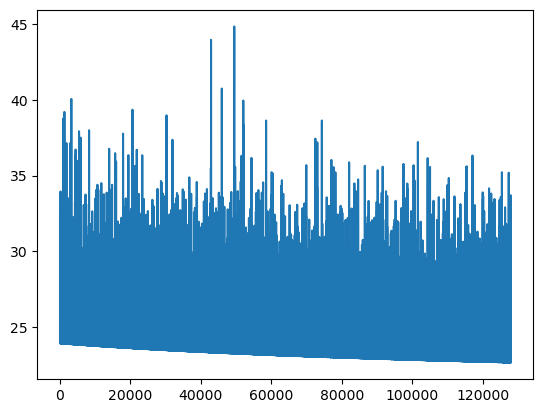

In [3378]:
plt.plot(list(range(len(fs))), fs)

In [3331]:
#save = ths[-2]
save

array([[  12.58749048],
       [ -43.46119584],
       [  40.79064875],
       [  40.89842778],
       [  38.07755285],
       [ -39.23816914],
       [  49.00587872],
       [ -32.21904408],
       [ 432.73382325],
       [  84.4092432 ],
       [-352.24119572],
       [ -32.37910096],
       [  92.47538948],
       [  76.98679219],
       [  96.44514021],
       [-469.32053661],
       [  68.14094622],
       [ -21.20018136],
       [  96.49384943],
       [ 105.22602885],
       [  45.7946126 ],
       [ -40.40084048],
       [-147.1823909 ],
       [-155.43258938],
       [ 177.68775623],
       [ 280.31840504],
       [ -70.71787818],
       [-548.50870881],
       [ 169.86192253],
       [  20.45358269],
       [ 261.61467786],
       [ 265.66487526],
       [   4.5645194 ],
       [ 147.90784333],
       [ 273.11127509],
       [-100.35891629],
       [  74.84188455],
       [ 231.50749176],
       [ 269.2795833 ],
       [   4.86196997],
       [ -33.81168419],
       [ 160.365

In [3275]:
reg = LinearRegression()

In [3276]:
reg.fit(X.T, y.T)

LinearRegression()

In [3277]:
reg.score(X.T, y.T)

0.8938249947063044

In [3278]:
ths_reg = reg.coef_.T

In [3332]:
y_pred = ths[-2].T.dot(X)

In [3333]:
y_pred

array([[ 1.22226758, -9.14116367,  2.09857056, ..., -1.12505212,
         3.84125289, -5.14212588]])

In [3334]:
y

array([[ -1.54586367, -10.9729762 ,  -1.34200948, ...,   3.10780755,
         15.23816055,   0.42231537]])

In [3335]:
y_pred_reg = ths_reg.T.dot(X)

In [3336]:
1 - ((y_pred - y) ** 2).sum() / ((y - y.mean()) ** 2).sum()

0.44514613647497037

In [3337]:
loss(X, y, ths_reg)

5.786002005161269

In [3344]:
loss(X, y, ths[-2])

24.262714289701492